<a href="https://colab.research.google.com/github/ConorD28/Airport-Analysis/blob/main/Orlando_Airport_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Load In**

In [1]:
def Modify_df(df):
  columns_to_select = ['Month', 'FlightDate', 'Operating_Airline ', 'OriginAirportID',
                    'OriginCityName', 'DestAirportID', 'DestCityName',
                    'DepartureDelayGroups', 'CarrierDelay', 'WeatherDelay', 'NASDelay',
                     'SecurityDelay', 'LateAircraftDelay', 'CRSDepTime', 'DepTime',
                     'DepDelay', 'DepDelayMinutes', 'DepDel15', 'DepartureDelayGroups',
                    'DepTimeBlk', 'CRSArrTime', 'ArrTime', 'ArrDelay', 'ArrDelayMinutes',
                     'ArrDel15', 'ArrivalDelayGroups', 'ArrTimeBlk', 'Cancelled', 'CancellationCode']
  df = df.loc[:, columns_to_select] # Select columns using the list
  df = df[(df.OriginAirportID.isin([10257, 13204])) | (df.DestAirportID.isin([10257, 13204]))] #10257 is Albany International and 13204 is Orlando International
  df.reset_index(drop=True, inplace=True)
  return df

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import calendar
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/content/drive/MyDrive/ALB ORL Airports.csv')
data = data.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis = 1)
#data = Modify_df(data)
data.loc[data['Month'].isin([1,2,3]), 'Quarter'] = 'Q1'
data.loc[data['Month'].isin([4,5,6]), 'Quarter'] = 'Q2'
data.loc[data['Month'].isin([7,8,9]), 'Quarter'] = 'Q3'
data.loc[data['Month'].isin([10,11,12]), 'Quarter'] = 'Q4'
data.Month = data.Month.apply(lambda x: calendar.month_name[x])
data.DepDel15 = np.where(data.DepDel15 == 0, 'Not Delayed at least 15 Minutes',
                            np.where(data.DepDel15== 1, 'Delayed at least 15 Minutes', data.DepDel15))
data.DepDel15 = np.where(data.DepDel15 == 'nan', 'Cancelled', data.DepDel15)
data.ArrDel15 = np.where(data.ArrDel15 == 0, 'Not Delayed at least 15 Minutes',
                            np.where(data.ArrDel15== 1, 'Delayed at least 15 Minutes', data.ArrDel15))
data.ArrDel15 = np.where(data.ArrDel15 == 'nan', 'Cancelled', data.ArrDel15)

#rename abbreviations to Airline Name:
data['Operating_Airline '] = data['Operating_Airline '].str.replace('WN', 'Southwest')
data['Operating_Airline '] = data['Operating_Airline '].str.replace('PT', 'Piedmont')
data['Operating_Airline '] = data['Operating_Airline '].str.replace('AA', 'American')
data['Operating_Airline '] = data['Operating_Airline '].str.replace('DL', 'Delta')
data['Operating_Airline '] = data['Operating_Airline '].str.replace('C5', 'CommuteAir')
data['Operating_Airline '] = data['Operating_Airline '].str.replace('OH', 'PSA Airlines')
data['Operating_Airline '] = data['Operating_Airline '].str.replace('9E', 'Endeavor Air')
data['Operating_Airline '] = data['Operating_Airline '].str.replace('OO', 'SkyWest')
data['Operating_Airline '] = data['Operating_Airline '].str.replace('UA', 'United')
data['Operating_Airline '] = data['Operating_Airline '].str.replace('B6', 'JetBlue')
data['Operating_Airline '] = data['Operating_Airline '].str.replace('G4', 'Allegiant')
data['Operating_Airline '] = data['Operating_Airline '].str.replace('G7', 'GoJet')
data['Operating_Airline '] = data['Operating_Airline '].str.replace('YX', 'Republic Airline')
data['Operating_Airline '] = data['Operating_Airline '].str.replace('ZW', 'Air Wisconsin')
data['Operating_Airline '] = data['Operating_Airline '].str.replace('NK', 'Spirit')
data['Operating_Airline '] = data['Operating_Airline '].str.replace('F9', 'Frontier')
data['Operating_Airline '] = data['Operating_Airline '].str.replace('AS', 'Alaska Airlines')
data['Operating_Airline '] = data['Operating_Airline '].str.replace('MQ', 'Envoy')

# **Functions**

In [4]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None #turn off setting with copy warning

In [5]:
def perc_Outliers(data_frame, col):
  q1 = np.nanpercentile(data_frame[col], 25)  # First quartile (Q1)
  q3 = np.nanpercentile(data_frame[col], 75)
  iqr = q3 - q1
  iqr_modified_value = iqr * 1.5
  lower_bound = q1 - iqr_modified_value
  upper_bound = q3 + iqr_modified_value

  outliers = 0
  for value in data_frame[col]:
    if value < lower_bound or value > upper_bound:
      outliers = outliers + 1
  percent_outliers = round(outliers/len(data_frame) * 100)
  return percent_outliers

In [6]:
def horizontal_bar_plot(df, col, title):
  df = df.sort_values(by = col, ascending = False)
  fig, ax = plt.subplots()
  ax.set_title(title)
  bars = ax.barh(df.index.values, df[col].values)
  ax.bar_label(bars, padding=3)
  bars[len(bars) - 1].set_color('gold')
  print()
  plt.show()

In [7]:
def plot_boxplot_with_mean(data, grouper, minutes, title_box, marker_size, ordering, fig_height):
    fig,ax = plt.subplots(figsize=(10,fig_height))
    if ordering != []:
      sns.boxplot(x=minutes, y=grouper, data=data, showfliers = False, width = .6, palette='coolwarm',
        medianprops={'color': 'black', 'linewidth': 2}, vert = False, order = ordering, ax = ax)
    else:
      sns.boxplot(x=minutes, y=grouper, data=data, showfliers = False, width = .6, palette='coolwarm',
        medianprops={'color': 'black', 'linewidth': 2}, vert = False, ax = ax)

    # Compute mean values
    means = data.groupby(grouper)[minutes].mean()
    data_groups = data[grouper].unique()

    if ordering != []:
      means = means.reindex(ordering)
      data_groups = sorted(data_groups, key = lambda x: ordering.index(x))
    # Overlay mean points:
    for i, group in enumerate(data_groups):
        mean_value = means[group]
        ax.scatter(mean_value, i, color='black', marker='o', s=marker_size, label='Mean' if i == 0 else "",
                   zorder=2)
    plt.title(title_box)
    plt.legend(loc="upper right")
    plt.show()

In [8]:
def remove_outliers(group):
  Q1 = group.quantile(0.25)
  Q3 = group.quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  return group[(group >= lower_bound) & (group <= upper_bound)]

In [9]:
def box_plots(df, col, title, groupby_col, order_by, max_allowed):
  num_boxes = df[groupby_col].nunique()
  scaled_marker_size = 300/num_boxes
  means = df.groupby(groupby_col)[col].mean()

  # Remove outliers per category
  df_no_outliers = df.groupby(groupby_col)[col].apply(remove_outliers).reset_index(level=0, drop=True)
  # Compute maximum value per category after outlier removal
  max_values = df_no_outliers.groupby(df[groupby_col]).max()

  # Identify categories where the max value (after outlier removal) is ≥ 150
  outlier_categories = max_values[max_values >= max_allowed].index.tolist()

  # Separate data into two groups
  df_filtered = df[~df[groupby_col].isin(outlier_categories)]
  df_outliers = df[df[groupby_col].isin(outlier_categories)]

  # Plot box plot without the outlier category
  if not df_outliers.empty:
    order_by = [x for x in order_by if x not in outlier_categories]

  df_order_by_values = df_filtered.iloc[:,0].unique()
  order_by = [x for x in order_by if x in df_order_by_values] #only get valeus in df
  plot_boxplot_with_mean(df_filtered, groupby_col, col, title, scaled_marker_size, order_by, 6)

  # Plot the outlier category separately if it exists
  if not df_outliers.empty:
    title = "Box Plot for other " + groupby_col + "(s)"
    order_by = []
    plot_boxplot_with_mean(df_outliers, groupby_col, col, title, scaled_marker_size, order_by, 3)

In [10]:
def tables_graphs_by_split(data_frame, Group, delayMins, delayed15, cityName, Choice, order_box_plot, max_box):
  data_frame2 = data_frame.groupby(Group).agg(Arrivals=(delayMins, 'count'), Flights=(delayMins, 'size'),
       Median_Minutes_Delayed=(delayMins, lambda x: round(x.median())), Mean_Minutes_Delayed=(delayMins, lambda x: round(x.mean())),
       Delayed_15=(delayed15, lambda x: x[x=='Delayed at least 15 Minutes'].count()),
      Cancelled=(delayed15, lambda x: x[x.isin(['Cancelled'])].count())) #Arrivals may really be departures, change name later down if it is departures
  data_frame2['% Cancelled'] = round(data_frame2.Cancelled/data_frame2.Flights*100)
  data_frame2['% of Arrivals that Arrived 15 Minutes Late'] = round(data_frame2.Delayed_15/data_frame2.Arrivals*100) #arrived or departed 15 minutes late, change name later down if it is departed

  title = 'Delay Minutes by ' + Group
  c = 0

  if Group == cityName:
    data_frame2 = data_frame2.sort_values(by = 'Flights', ascending = False)
    data_frame2 = data_frame2.head(10)
    top_10_cities = data_frame2.index.values

  df2 = data_frame2[['Arrivals', 'Mean_Minutes_Delayed', 'Median_Minutes_Delayed']]
  if Choice == 'Departures':
    df3 = data_frame[[Group, 'DepDelayMinutes']]
    df2 = df2.rename(columns = {'Arrivals': 'Departures'})
    df3 = df3.rename(columns = {'Arrivals': 'Departures'})
    if Group == cityName:
      df3 = df3[df3[Group].isin(top_10_cities)]
    box_plots(df3, 'DepDelayMinutes', title, Group, order_box_plot, max_box)
  else:
    df3 = data_frame[[Group, 'ArrDelayMinutes']]
    title = 'How Late Flights Arrived by ' + Group
    if Group == cityName:
      df3 = df3[df3[Group].isin(top_10_cities)]
    box_plots(df3, 'ArrDelayMinutes', title, Group, order_box_plot, max_box)
  df2 = df2.sort_values(by = 'Mean_Minutes_Delayed')

  if data_frame2['% of Arrivals that Arrived 15 Minutes Late'].nunique() != 1:
    c = 1
    if Choice == 'Departures':
      data_frame2 = data_frame2.rename(columns = {'% of Arrivals that Arrived 15 Minutes Late': '% of Departed Flights Delayed 15 Minutes'})
      title = '% of Departed Flights Delayed 15 Minutes'
    else:
      data_frame2 = data_frame2.sort_values(by = '% of Arrivals that Arrived 15 Minutes Late', ascending = False)
      title = '% of Arrivals that Arrived 15 Minutes Late'
    horizontal_bar_plot(data_frame2, title, title)
    data_frame2 = data_frame2.sort_values(by = title)

  if Choice == 'Departures':
    if Group == cityName:
      df2 = df2.rename(columns = {'Median_Minutes_Delayed': 'Median_Mins_Delayed', 'Mean_Minutes_Delayed': 'Mean_Mins_Delayed'})
    print('\n             Departed Flights By' + ' ' + Group + ':\n')
    print(df2)
  else:
    print('\n             Arrival Flights By' + ' ' + Group + ':\n')
    df2 = df2.rename(columns = {'Median_Minutes_Delayed': 'Median Mins. Late', 'Mean_Minutes_Delayed': 'Mean Mins. Late'})
    print(df2)
  print()
  if c==1:
    data_frame2['% Delayed 15 Minutes'] = round(data_frame2.Delayed_15/data_frame2.Flights*100)
    if Choice == 'Departures':
      print(data_frame2[['Flights', '% Delayed 15 Minutes', '% Cancelled']])
    else:
      data_frame2 = data_frame2.rename(columns = {'% Delayed 15 Minutes': '% 15 Minutes Late'})
      print(data_frame2[['Flights', '% 15 Minutes Late', '% Cancelled']])
  print()

In [11]:
def Airport_delay_data(df, delay_mins, delayed_15, time_block, city_name, choice, max_plot):
  mean_mins_delayed = round(np.nanmean(df[delay_mins]))
  median_mins_delayed = round(np.nanmedian(df[delay_mins]))
  DelayMinutes_Outliers = perc_Outliers(df, delay_mins)
  print('% of Outliers for Delay Minutes is ', DelayMinutes_Outliers)
  if choice == 'Departures':
    print('The median is', median_mins_delayed, 'minutes departed after scheduled time.')
    print('On average, flights depart', mean_mins_delayed, 'minutes delayed.\n')
  else:
    print('The median is', median_mins_delayed, 'minutes arrived after scheduled time.')
    print('On average, flights arrive', mean_mins_delayed, 'minutes late.\n')

#Delayed at Least 15 Minutes:
  Delayed_15_indices = df[delayed_15].value_counts().index
  Delayed_15_values = df[delayed_15].value_counts().values
  perc_Delayed_15 = round(df[delayed_15].value_counts()/len(df) * 100, 1).values
  Delayed_15_data = {'Flights': Delayed_15_values, '%': perc_Delayed_15}
  if choice == 'Departures':
    Delayed_15_df = pd.DataFrame(Delayed_15_data, index = Delayed_15_indices)
  else:
    Delayed_15_indices = ['Arrived Less than 15 Minutes Late', 'Arrived at Least 15 Minutes Late', 'Cancelled']
    Delayed_15_df = pd.DataFrame(Delayed_15_data, index = Delayed_15_indices)
  if Delayed_15_df['%'].nunique() != 1:
    fig, ax = plt.subplots()
    ax.pie(Delayed_15_df['%'], labels = Delayed_15_df.index.values, autopct='%1.0f%%')
    if choice == 'Departures':
      ax.set_title('Flights Cancelled/Delayed')
    else:
      ax.set_title('Flights Cancelled/Arrived Late')
    plt.tight_layout()
    plt.show()
    print()
    print(Delayed_15_df)
    print()

#Quarter:
  order_of_boxes = ['Q1', 'Q2', 'Q3', 'Q4']
  tables_graphs_by_split(df, 'Quarter', delay_mins, delayed_15, city_name, choice, order_of_boxes, max_plot)

#Month:
  order_of_boxes = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
                    'August', 'September', 'October', 'November', 'December']
  tables_graphs_by_split(df, 'Month', delay_mins, delayed_15, city_name, choice, order_of_boxes, max_plot)

#Part of Day:
  df['Part_Of_Day'] = df[time_block].apply(lambda x: 'Morning' if x in ['0001-0559',
    '0600-0659', '0700-0759', '0800-0859', '0900-0959', '1000-1059', '1100-1159'] else ('Afternoon' if x in ['1200-1259',
                                                                                '1300-1359', '1400-1459', '1500-1559',
                                                                                  '1600-1659'] else 'Evening'))
  order_of_boxes = ['Morning', 'Afternoon', 'Evening']
  tables_graphs_by_split(df, 'Part_Of_Day', delay_mins, delayed_15, city_name, choice, order_of_boxes, max_plot)

#Time Block:
  order_of_boxes = ['0001-0559', '0600-0659', '0700-0759', '0800-0859', '0900-0959', '1000-1059',
                    '1100-1159', '1200-1259', '1300-1359', '1400-1459', '1500-1559', '1600-1659', '1700-1759',
                    '1800-1859', '1900-1959', '2000-2059', '2100-2159', '2200-2259', '2300-2359']
  tables_graphs_by_split(df, time_block, delay_mins, delayed_15, city_name, choice, order_of_boxes, max_plot)

#Destination City Delay Time:
  order_of_boxes = []
  tables_graphs_by_split(df, city_name, delay_mins, delayed_15, city_name, choice, order_of_boxes, max_plot)
  #print('\n Note: Diverted means flight did not land at destination city. \n')

In [12]:
def Airport_delays_by_Airline(df, DelayMins, Delayed15, Time_Block, City_Name, type_of_flight):
#Flights:
    grouped_df = df.groupby('Operating_Airline ').agg(Flights=(DelayMins, 'size'),
                                                      Arrivals_or_Departures=(DelayMins, 'count'),
                                                                Delayed_15=(Delayed15, lambda x: x[x =='Delayed at least 15 Minutes'].count()),
                                                                Cancelled=(Delayed15, lambda x: x[x =='Cancelled'].count()),
                                                                Mean_Minutes_Delayed=(DelayMins, lambda x: round(x.mean())),
                                                                Median_Minutes_Delayed=(DelayMins, lambda x: round(x.median())))
    grouped_df['% of Total Flights'] = round(grouped_df.Flights/sum(grouped_df.Flights) * 100, 1)
    fig, ax = plt.subplots()
    ax.pie(grouped_df['% of Total Flights'], labels = grouped_df.index.values, autopct='%1.1f%%')
    ax.set_title('% of Scheduled Flights')
    plt.tight_layout()
    plt.show()
    print()

#Cancelled/Delayed 15:
    grouped_df['Delayed 15 Mins %'] = round(grouped_df['Delayed_15']/grouped_df['Arrivals_or_Departures'] * 100)
    grouped_df['Cancelled %'] = round(grouped_df['Cancelled']/grouped_df['Flights'] * 100, 2)
    title = '% of Scheduled Flights Cancelled'
    horizontal_bar_plot(grouped_df, 'Cancelled %', title)
    if type_of_flight == 'Departures':
      title = '% of Departed Flights Delayed at least 15 Minutes'
      grouped_df = grouped_df.rename(columns = {'Arrivals_or_Departures': 'Departures'})
    else:
      title = '% of Arrival Flights Delayed at least 15 Minutes'
      grouped_df = grouped_df.rename(columns = {'Arrivals_or_Departures': 'Arrivals'})
    horizontal_bar_plot(grouped_df, 'Delayed 15 Mins %', title)

    if type_of_flight == 'Departures':
      print('\n         % of Departed Flights Delayed at least 15 Minutes: \n')
      delay15 = grouped_df[['Departures', 'Delayed 15 Mins %']]
    else:
      print('\n         % of Arrival Flights Delayed at least 15 Minutes: \n')
      delay15 = grouped_df[['Arrivals', 'Delayed 15 Mins %']]
    delay15 = delay15.sort_values(by = 'Delayed 15 Mins %')
    print(delay15)
    print('\n           % of Scheduled Flights Cancelled: \n')
    cancelled = grouped_df[['Flights', 'Cancelled %']]
    cancelled = cancelled.sort_values(by = 'Cancelled %')
    print(cancelled)

#Delay Length:
    if type_of_flight == 'Departures':
        Delays = grouped_df[['Departures', 'Mean_Minutes_Delayed', 'Median_Minutes_Delayed']]
    else:
        Delays = grouped_df[['Arrivals', 'Mean_Minutes_Delayed', 'Median_Minutes_Delayed']]

    title = 'Mean Delay Length (minutes):'
    horizontal_bar_plot(grouped_df, 'Mean_Minutes_Delayed', title)
    Delays = Delays.sort_values(by = 'Mean_Minutes_Delayed')

    Delays = Delays.rename(columns = {'Median_Minutes_Delayed': 'Median_Mins_Delayed', 'Mean_Minutes_Delayed': 'Mean_Mins_Delayed'})
    print('\n                          Delay Length: \n')
    print(Delays)

#Most Popular Airline:
    Most_popular = grouped_df.sort_values(by = 'Flights', ascending = False)
    Most_popular_airline = Most_popular.head(1)
    Most_popular_airline_name = str(Most_popular_airline.index.values)
    Most_popular_airline_name = Most_popular_airline_name[2:-2]
    df_most_popular = df[df['Operating_Airline '] == Most_popular_airline_name]
    print("\n                          " + Most_popular_airline_name + ":" + '\n')
    Airport_delay_data(df_most_popular, DelayMins, Delayed15, Time_Block, City_Name, type_of_flight, 300)
    if type_of_flight == 'Departures':
      print('\n         ' + Most_popular_airline_name + ' Flights Delayed at Least 15 Minutes: \n')
      df_most_popular_15 = df_most_popular[df_most_popular.DepDelayMinutes >= 15]
    else:
      print('\n         ' + Most_popular_airline_name + ' Flights that Arrived at Least 15 Minutes Late: \n')
      df_most_popular_15 = df_most_popular[df_most_popular.ArrDelayMinutes >= 15]
    Airport_delay_data(df_most_popular_15, DelayMins, Delayed15, Time_Block, City_Name, type_of_flight, 300)

#2nd Most Popular Airline:
    Second_most_popular_airline = Most_popular.iloc[1]
    Second_most_popular_airline = pd.DataFrame(Second_most_popular_airline).T
    Second_most_popular_airline_name = str(Second_most_popular_airline.index.values)
    Second_most_popular_airline_name = Second_most_popular_airline_name[2:-2]
    df_second_most_popular = df[df['Operating_Airline '] == Second_most_popular_airline_name]
    print("\n                          " + Second_most_popular_airline_name + ":" + '\n')
    Airport_delay_data(df_second_most_popular, DelayMins, Delayed15, Time_Block, City_Name, type_of_flight, 300)

#3rd Most Popular Airline:
    Third_most_popular_airline = Most_popular.iloc[2]
    Third_most_popular_airline = pd.DataFrame(Third_most_popular_airline).T
    Third_most_popular_airline_name = str(Third_most_popular_airline.index.values)
    Third_most_popular_airline_name = Third_most_popular_airline_name[2:-2]
    df_third_most_popular = df[df['Operating_Airline '] == Third_most_popular_airline_name]
    print("\n                          " + Third_most_popular_airline_name + ":" + '\n')
    Airport_delay_data(df_third_most_popular, DelayMins, Delayed15, Time_Block, City_Name, type_of_flight, 300)

# **Departures**

In [16]:
ORL_Dep = data[data.OriginAirportID==13204]
ORL_Dep.reset_index(drop=True, inplace=True)

Orlando International Airport had 156710 flights that departed in 2024.

% of Outliers for Delay Minutes is  14
The median is 0 minutes departed after scheduled time.
On average, flights depart 19 minutes delayed.



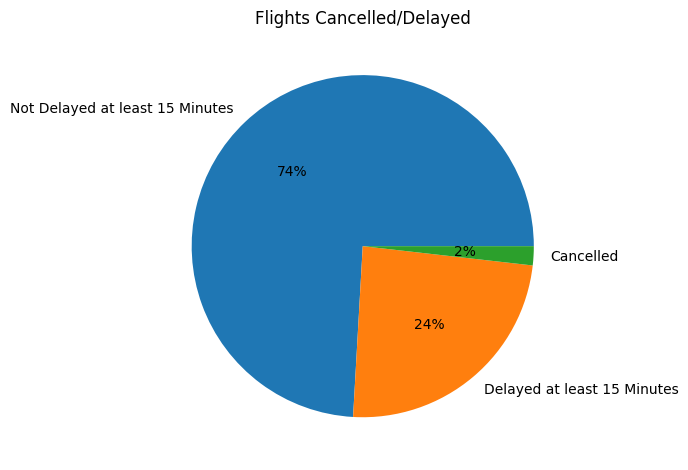


                                 Flights     %
DepDel15                                      
Not Delayed at least 15 Minutes   118210  74.1
Delayed at least 15 Minutes        38500  24.1
Cancelled                           2843   1.8



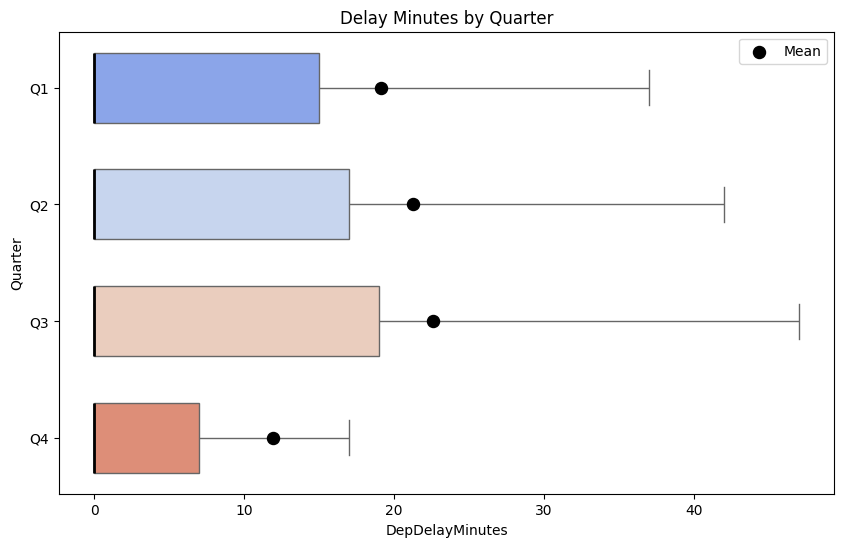

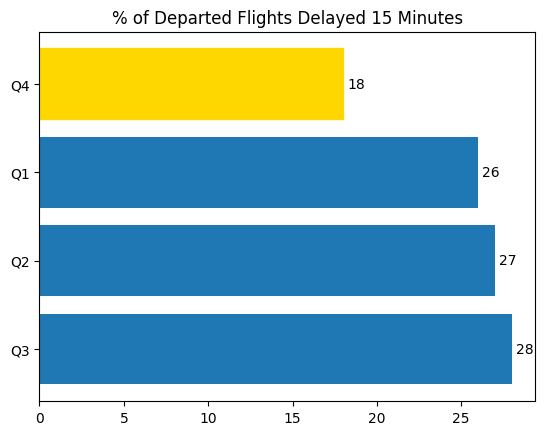


             Departed Flights By Quarter:

         Departures  Mean_Minutes_Delayed  Median_Minutes_Delayed
Quarter                                                          
Q4            37564                    12                       0
Q1            42839                    19                       0
Q2            40778                    21                       0
Q3            35529                    23                       0

         Flights  % Delayed 15 Minutes  % Cancelled
Quarter                                            
Q4         38566                  17.0          3.0
Q1         43523                  25.0          2.0
Q2         41190                  26.0          1.0
Q3         36274                  28.0          2.0



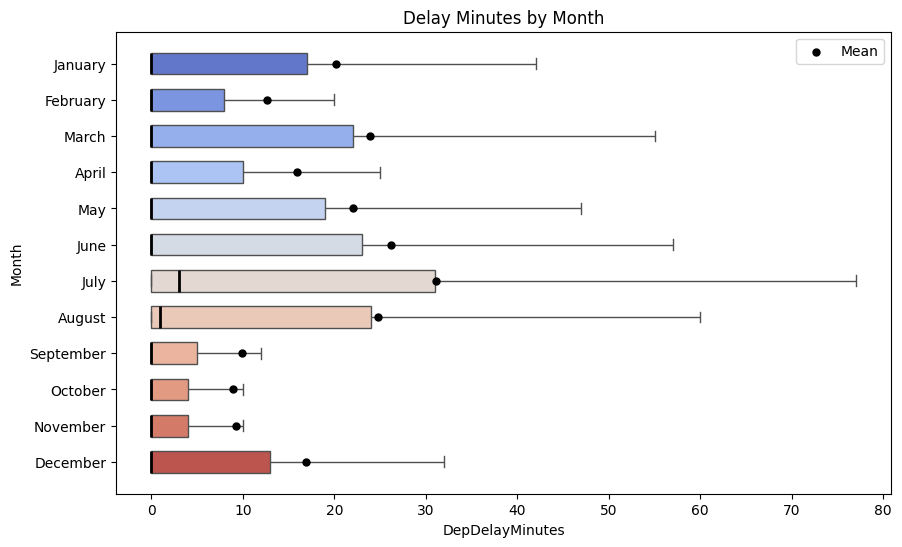

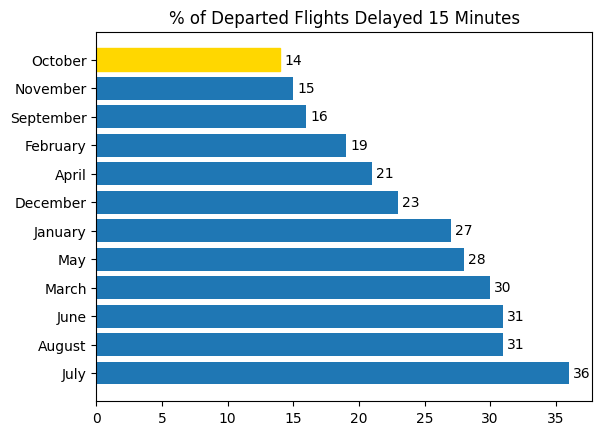


             Departed Flights By Month:

           Departures  Mean_Minutes_Delayed  Median_Minutes_Delayed
Month                                                              
October         11361                     9                       0
November        12629                     9                       0
September       10716                    10                       0
February        13536                    13                       0
April           14021                    16                       0
December        13574                    17                       0
January         13884                    20                       0
May             13721                    22                       0
March           15419                    24                       0
August          11808                    25                       1
June            13036                    26                       0
July            13005                    31                       3

     

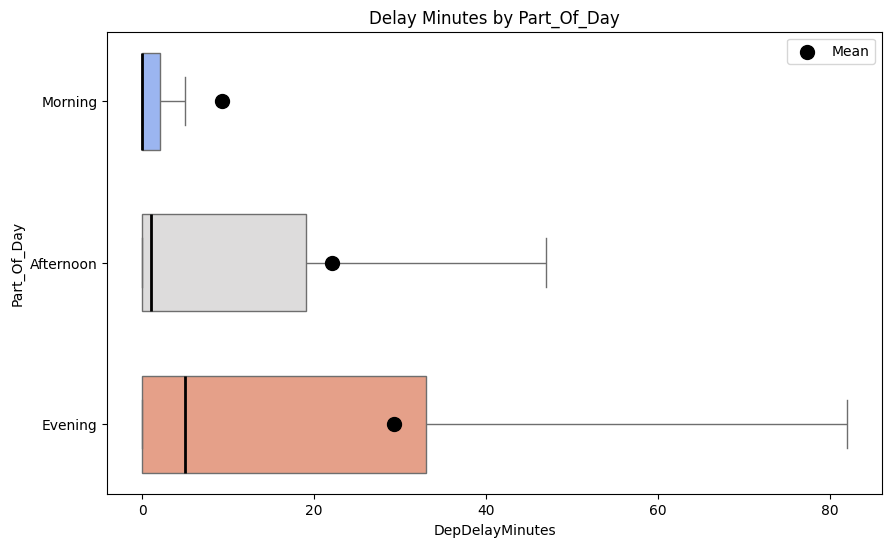

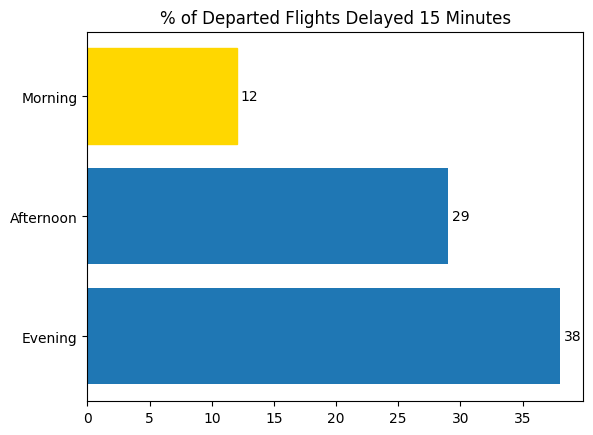


             Departed Flights By Part_Of_Day:

             Departures  Mean_Minutes_Delayed  Median_Minutes_Delayed
Part_Of_Day                                                          
Morning           67360                     9                       0
Afternoon         41590                    22                       1
Evening           47760                    29                       5

             Flights  % Delayed 15 Minutes  % Cancelled
Part_Of_Day                                            
Morning        68430                  12.0          2.0
Afternoon      42384                  28.0          2.0
Evening        48739                  37.0          2.0



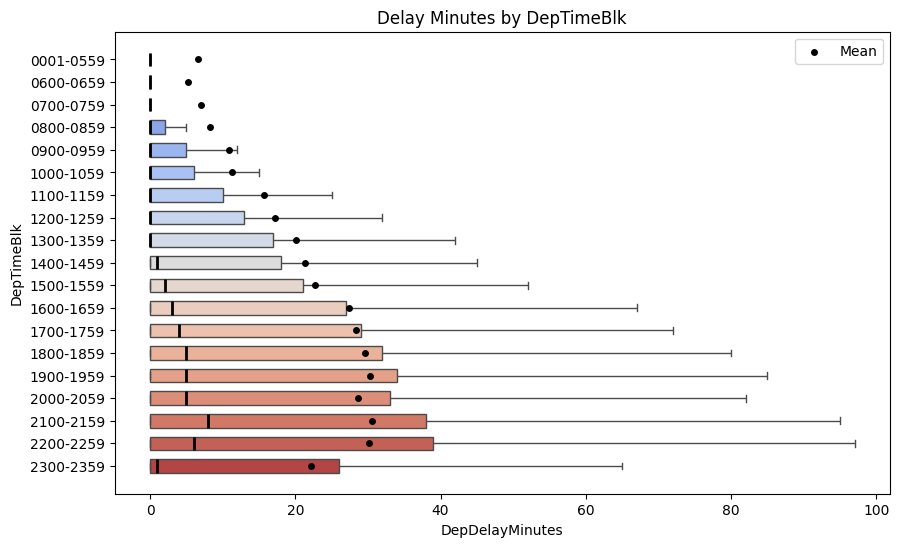

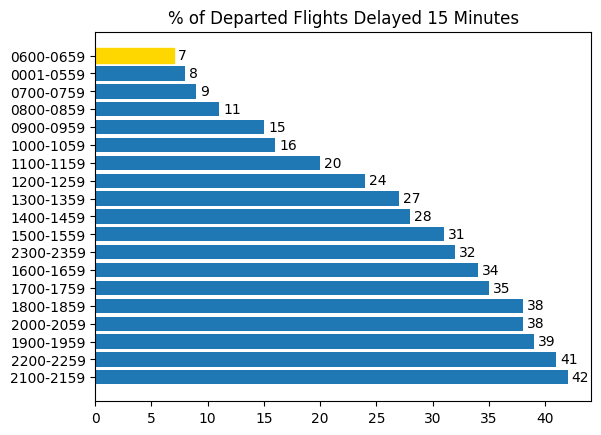


             Departed Flights By DepTimeBlk:

            Departures  Mean_Minutes_Delayed  Median_Minutes_Delayed
DepTimeBlk                                                          
0600-0659        11216                     5                       0
0001-0559         4326                     7                       0
0700-0759        12385                     7                       0
0800-0859         9811                     8                       0
0900-0959        10616                    11                       0
1000-1059         9443                    11                       0
1100-1159         9563                    16                       0
1200-1259         7350                    17                       0
1300-1359         7881                    20                       0
1400-1459         8432                    21                       1
2300-2359         1402                    22                       1
1500-1559         8842                    23            

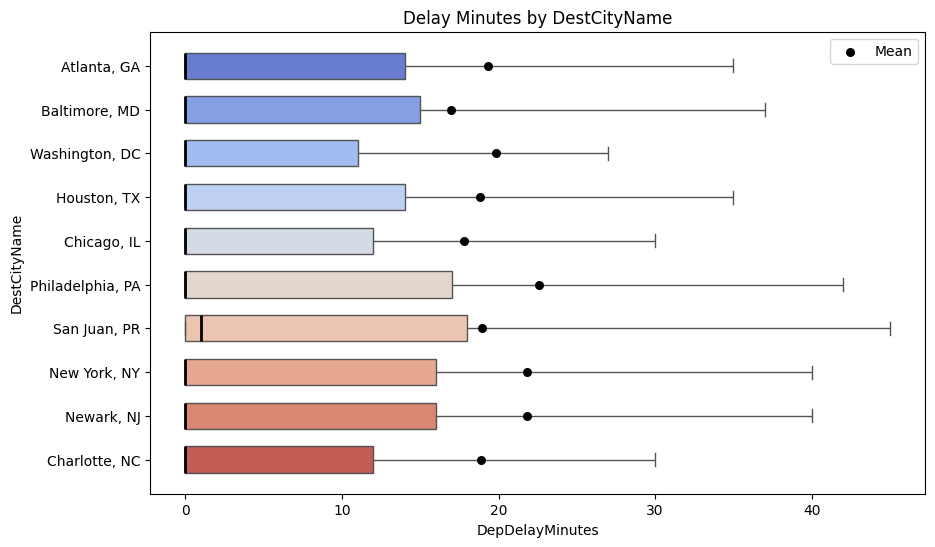

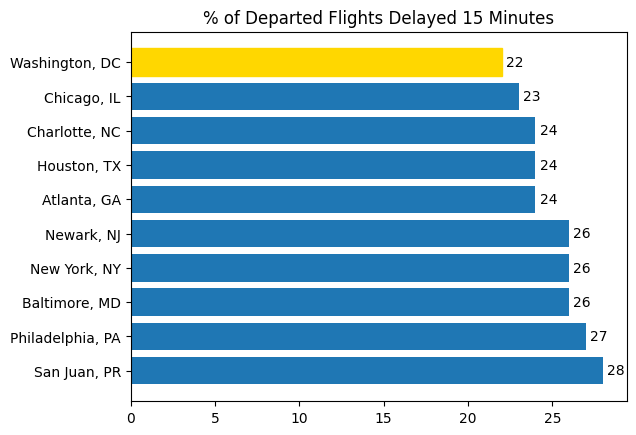


             Departed Flights By DestCityName:

                  Departures  Mean_Mins_Delayed  Median_Mins_Delayed
DestCityName                                                        
Baltimore, MD           5270                 17                    0
Chicago, IL             7758                 18                    0
Houston, TX             5695                 19                    0
Atlanta, GA             8833                 19                    0
Charlotte, NC           5310                 19                    0
San Juan, PR            6240                 19                    1
Washington, DC          6594                 20                    0
New York, NY            9293                 22                    0
Newark, NJ              6382                 22                    0
Philadelphia, PA        5457                 23                    0

                  Flights  % Delayed 15 Minutes  % Cancelled
DestCityName                                                


In [17]:
print('Orlando International Airport had', ORL_Dep.DepDelayMinutes.agg('count'), 'flights that departed in 2024.\n')
Airport_delay_data(ORL_Dep, 'DepDelayMinutes', 'DepDel15', 'DepTimeBlk', 'DestCityName', 'Departures', 300) #Orlando Airport Delay Info

Orlando International Airport had 38500 departed flights delayed at least 15 Minutes in 2024.

% of Outliers for Delay Minutes is  8
The median is 43 minutes departed after scheduled time.
On average, flights depart 71 minutes delayed.



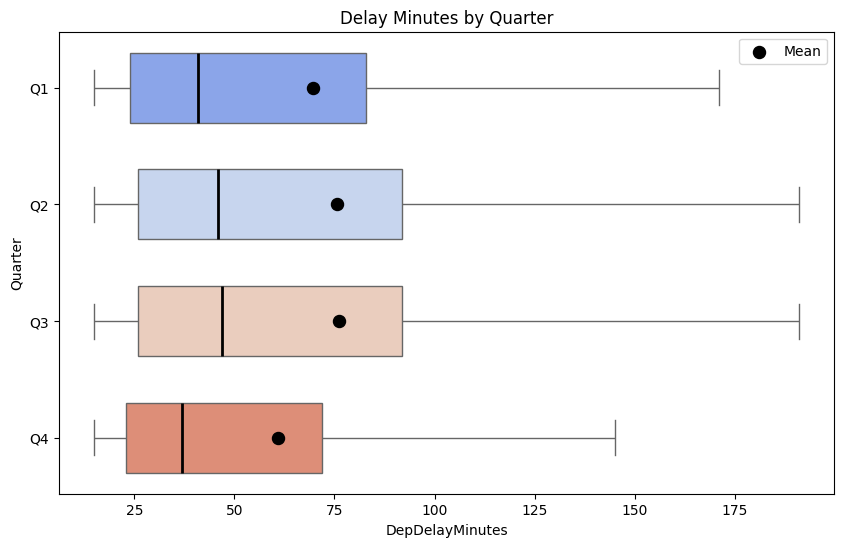


             Departed Flights By Quarter:

         Departures  Mean_Minutes_Delayed  Median_Minutes_Delayed
Quarter                                                          
Q4             6673                    61                      37
Q1            10987                    70                      41
Q2            10817                    76                      46
Q3            10023                    76                      47




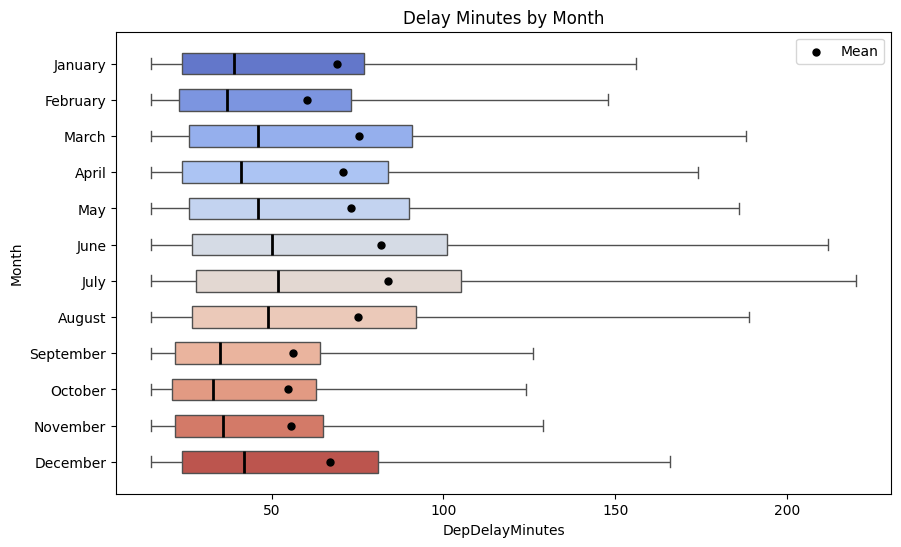


             Departed Flights By Month:

           Departures  Mean_Minutes_Delayed  Median_Minutes_Delayed
Month                                                              
October          1637                    55                      33
November         1867                    56                      36
September        1691                    56                      35
February         2578                    60                      37
December         3169                    67                      42
January          3784                    69                      39
April            2933                    71                      41
May              3903                    73                      46
August           3715                    75                      49
March            4625                    76                      46
June             3981                    82                      50
July             4617                    84                      52




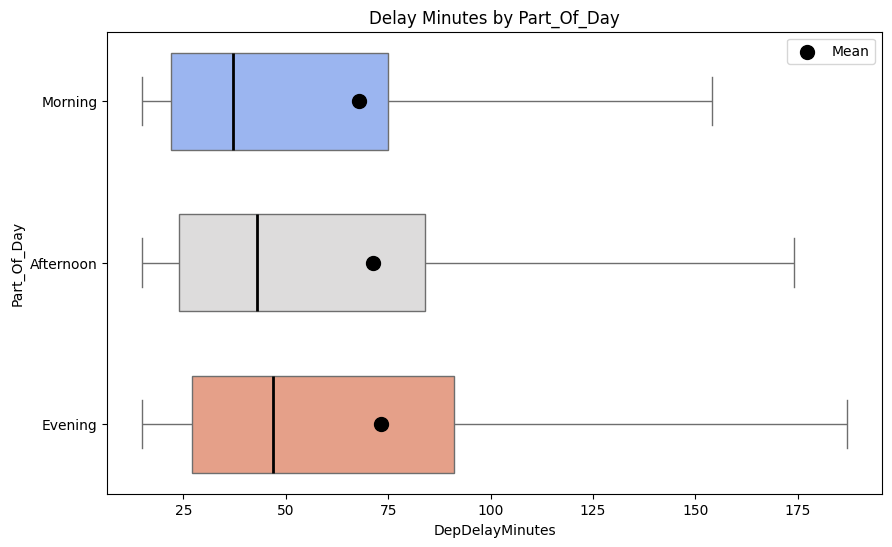


             Departed Flights By Part_Of_Day:

             Departures  Mean_Minutes_Delayed  Median_Minutes_Delayed
Part_Of_Day                                                          
Morning            8284                    68                      37
Afternoon         12027                    71                      43
Evening           18189                    73                      47




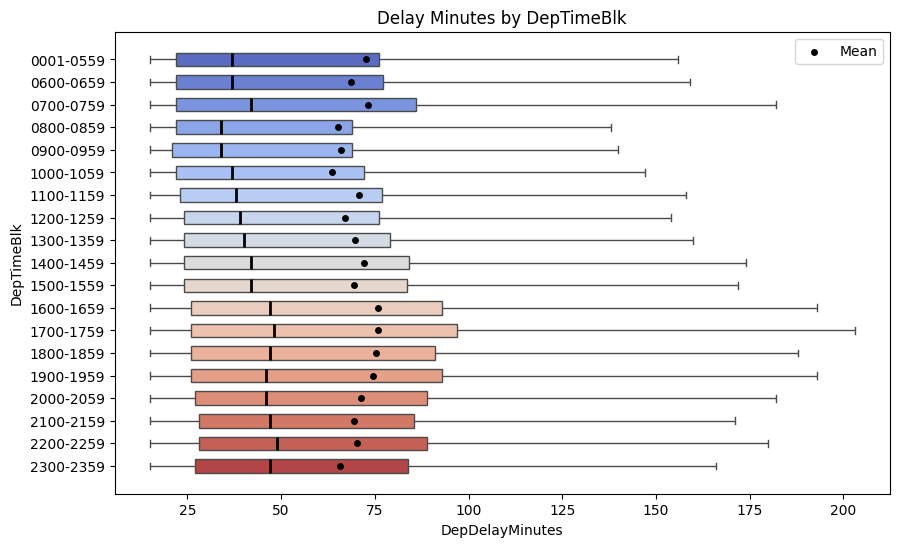


             Departed Flights By DepTimeBlk:

            Departures  Mean_Minutes_Delayed  Median_Minutes_Delayed
DepTimeBlk                                                          
1000-1059         1493                    63                      37
0800-0859         1097                    65                      34
0900-0959         1558                    66                      34
2300-2359          446                    66                      47
1200-1259         1753                    67                      39
0600-0659          748                    69                      37
2100-2159         2087                    69                      47
1500-1559         2711                    69                      42
1300-1359         2120                    70                      40
2200-2259         1207                    70                      49
2000-2059         3403                    71                      46
1100-1159         1952                    71            

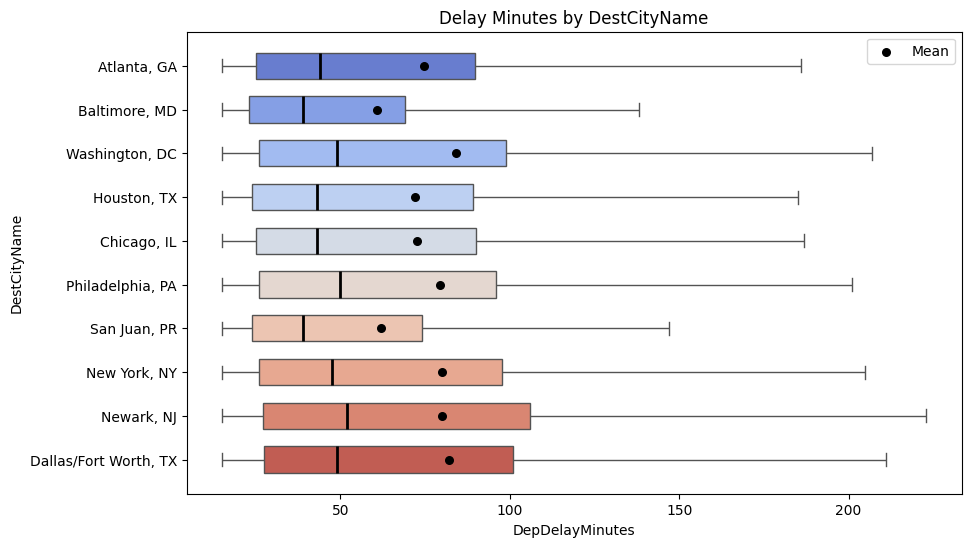


             Departed Flights By DestCityName:

                       Departures  Mean_Mins_Delayed  Median_Mins_Delayed
DestCityName                                                             
Baltimore, MD                1350                 61                   39
San Juan, PR                 1754                 62                   39
Houston, TX                  1389                 72                   43
Chicago, IL                  1771                 72                   43
Atlanta, GA                  2142                 75                   44
Philadelphia, PA             1478                 79                   50
Newark, NJ                   1659                 80                   52
New York, NY                 2398                 80                   48
Dallas/Fort Worth, TX        1299                 82                   49
Washington, DC               1480                 84                   49




In [18]:
ORL_Delayed_15 = ORL_Dep[ORL_Dep.DepDel15 == 'Delayed at least 15 Minutes']
ORL_Delayed_15.reset_index(drop=True, inplace = True)
print('Orlando International Airport had', len(ORL_Delayed_15), 'departed flights delayed at least 15 Minutes in 2024.\n')
Airport_delay_data(ORL_Delayed_15, 'DepDelayMinutes', 'DepDel15', 'DepTimeBlk', 'DestCityName', 'Departures', 300) #Orlando Airport Delayed 15 Minutes Delay Info (And Not Cancelled)

Orlando International Airport had 9293 flights to New York, NY that departed in 2024.

% of Outliers for Delay Minutes is  14
The median is 0 minutes departed after scheduled time.
On average, flights depart 22 minutes delayed.



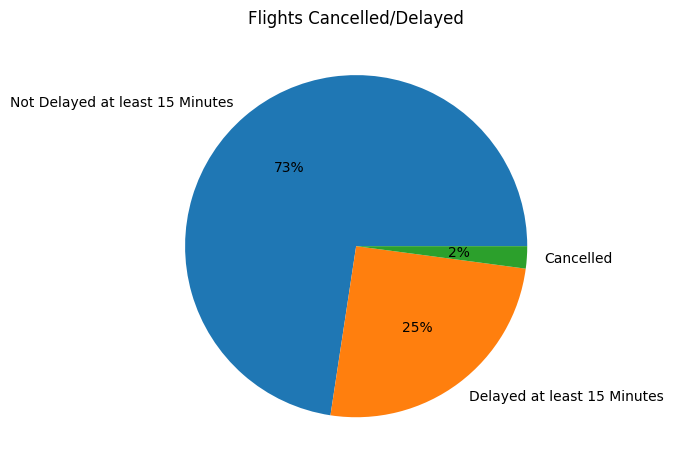


                                 Flights     %
DepDel15                                      
Not Delayed at least 15 Minutes     6895  72.6
Delayed at least 15 Minutes         2398  25.3
Cancelled                            200   2.1



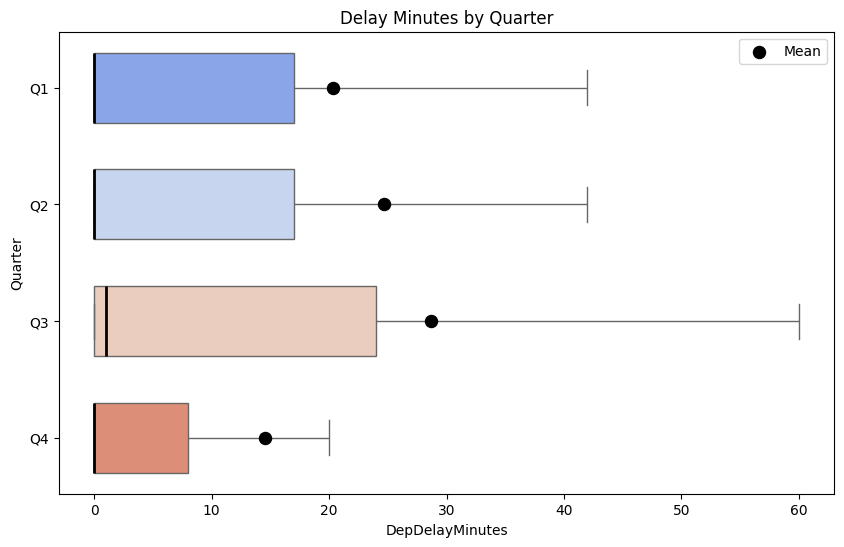

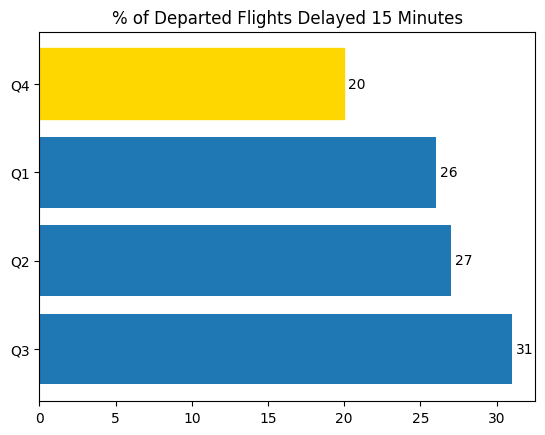


             Departed Flights By Quarter:

         Departures  Mean_Minutes_Delayed  Median_Minutes_Delayed
Quarter                                                          
Q4             2426                    15                       0
Q1             2464                    20                       0
Q2             2287                    25                       0
Q3             2116                    29                       1

         Flights  % Delayed 15 Minutes  % Cancelled
Quarter                                            
Q4          2478                  19.0          2.0
Q1          2490                  26.0          1.0
Q2          2327                  26.0          2.0
Q3          2198                  30.0          4.0



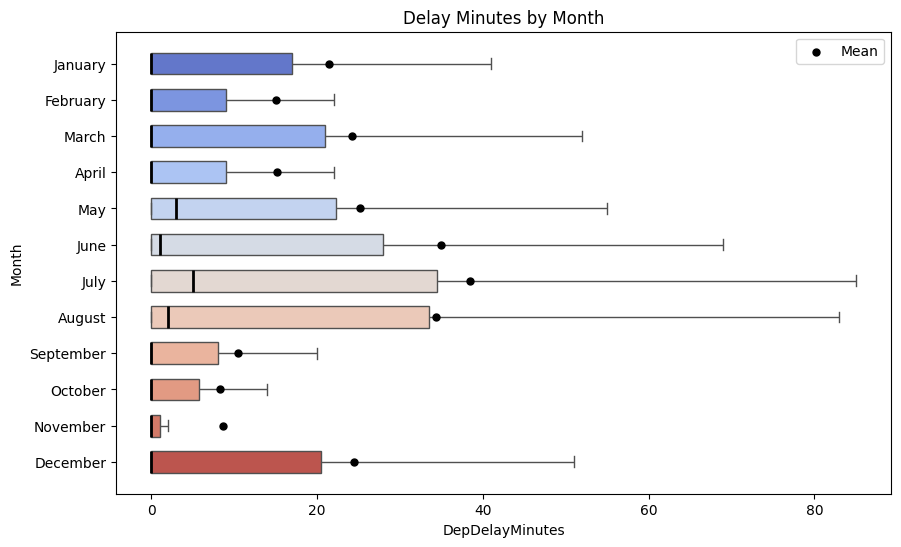

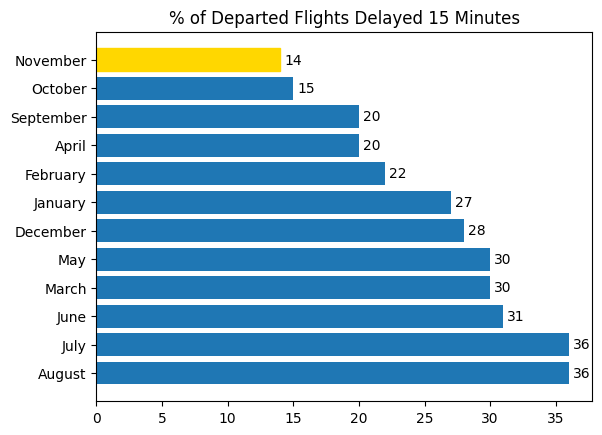


             Departed Flights By Month:

           Departures  Mean_Minutes_Delayed  Median_Minutes_Delayed
Month                                                              
October           638                     8                       0
November          857                     9                       0
September         626                    10                       0
April             804                    15                       0
February          799                    15                       0
January           827                    21                       0
March             838                    24                       0
December          931                    24                       0
May               776                    25                       3
August            755                    34                       2
June              707                    35                       1
July              735                    38                       5

     

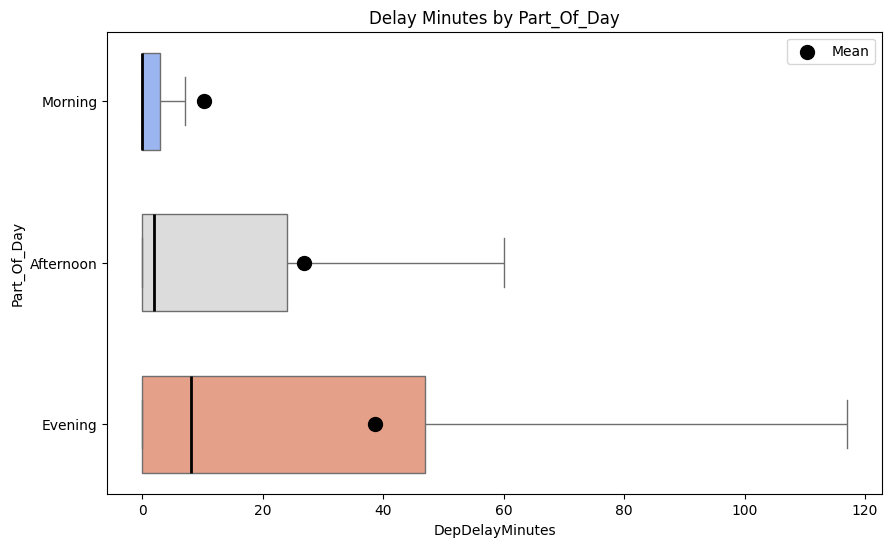

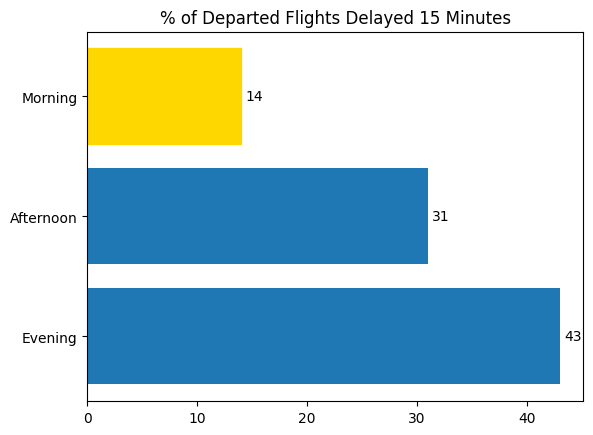


             Departed Flights By Part_Of_Day:

             Departures  Mean_Minutes_Delayed  Median_Minutes_Delayed
Part_Of_Day                                                          
Morning            4497                    10                       0
Afternoon          2438                    27                       2
Evening            2358                    39                       8

             Flights  % Delayed 15 Minutes  % Cancelled
Part_Of_Day                                            
Morning         4567                  13.0          2.0
Afternoon       2497                  31.0          2.0
Evening         2429                  42.0          3.0



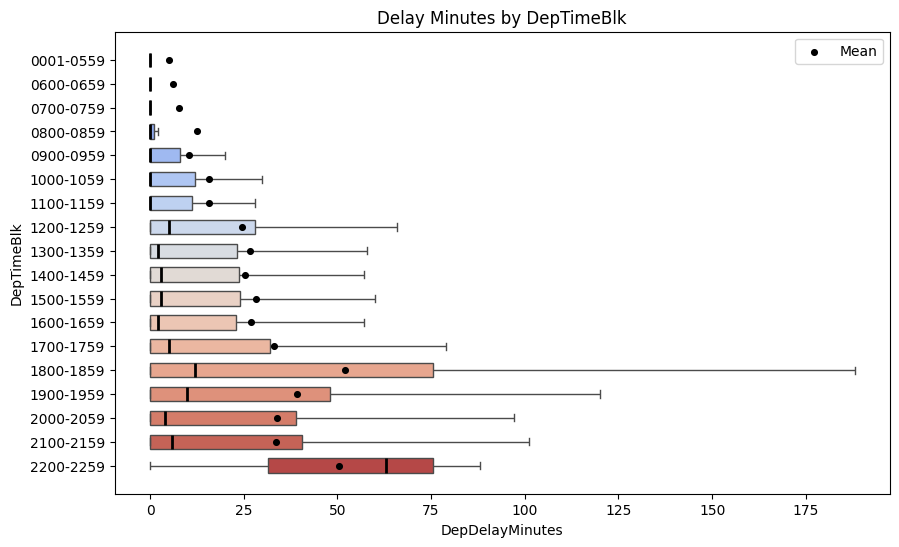

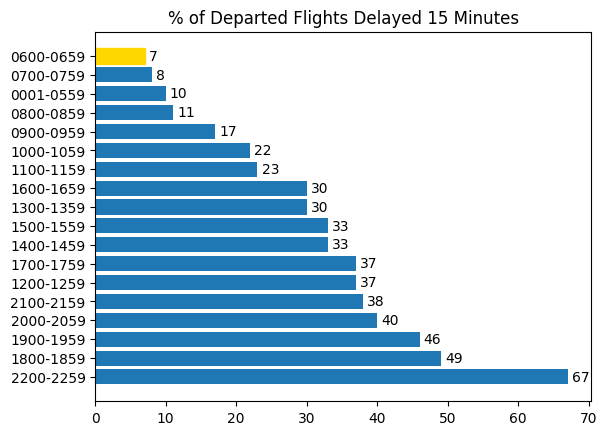


             Departed Flights By DepTimeBlk:

            Departures  Mean_Minutes_Delayed  Median_Minutes_Delayed
DepTimeBlk                                                          
0001-0559          348                     5                       0
0600-0659         1055                     6                       0
0700-0759          889                     8                       0
0900-0959          589                    10                       0
0800-0859          260                    12                       0
1000-1059          404                    16                       0
1100-1159          952                    16                       0
1200-1259           93                    25                       5
1400-1459          398                    25                       3
1300-1359          844                    27                       2
1600-1659          457                    27                       2
1500-1559          646                    28            

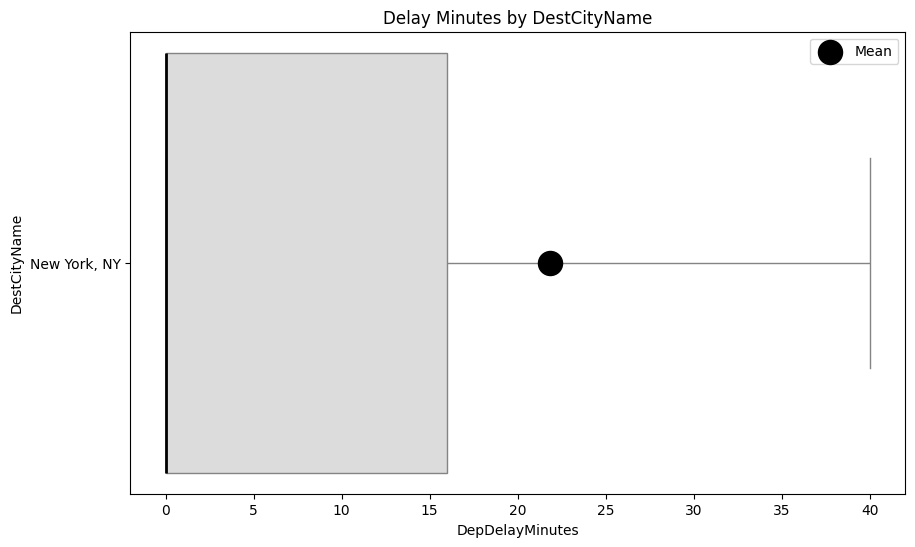


             Departed Flights By DestCityName:

              Departures  Mean_Mins_Delayed  Median_Mins_Delayed
DestCityName                                                    
New York, NY        9293                 22                    0




In [ ]:
ORL_Dep_most_popular_dest = ORL_Dep.groupby('DestCityName').agg(Flights=('DepDelayMinutes', 'size'))
ORL_Dep_most_popular_dests = ORL_Dep_most_popular_dest.sort_values(by = 'Flights', ascending = False)
ORL_Dep_most_popular_dest = ORL_Dep_most_popular_dests.head(1)
ORL_Dep_most_popular_dest_name = str(ORL_Dep_most_popular_dest.index.values)
ORL_Dep_most_popular_dest_name = ORL_Dep_most_popular_dest_name[2:-2]
ORL_Dest = ORL_Dep[ORL_Dep.DestCityName == ORL_Dep_most_popular_dest_name]
ORL_Dest.reset_index(drop=True, inplace = True)
most_pop_dest = str(ORL_Dest.DestCityName.iloc[0])
print('Orlando International Airport had', ORL_Dest.DepDelayMinutes.agg('count'),
      'flights to ' + most_pop_dest + ' that departed in 2024.\n')
Airport_delay_data(ORL_Dest, 'DepDelayMinutes', 'DepDel15', 'DepTimeBlk', 'DestCityName', 'Departures', 300)

# **Arrivals**

In [19]:
ORL_Arr = data[data.DestAirportID==13204]
ORL_Arr.reset_index(drop=True, inplace=True)

Orlando International Airport had 156036 flights that arrived in 2024.

% of Outliers for Delay Minutes is  15
The median is 0 minutes arrived after scheduled time.
On average, flights arrive 19 minutes late.



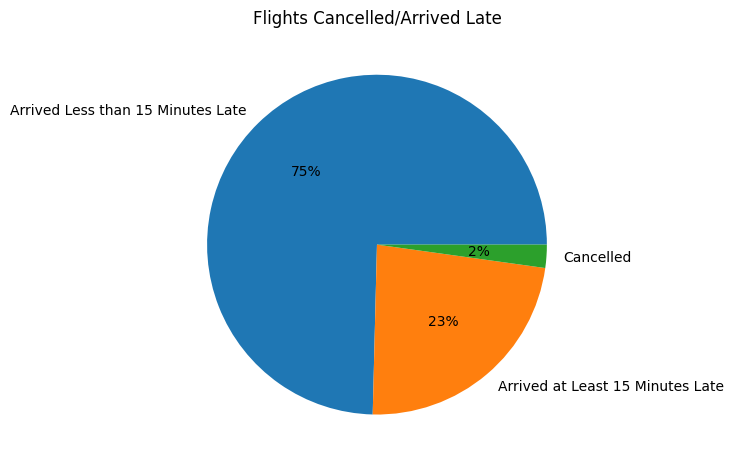


                                   Flights     %
Arrived Less than 15 Minutes Late   118976  74.6
Arrived at Least 15 Minutes Late     37060  23.2
Cancelled                             3542   2.2



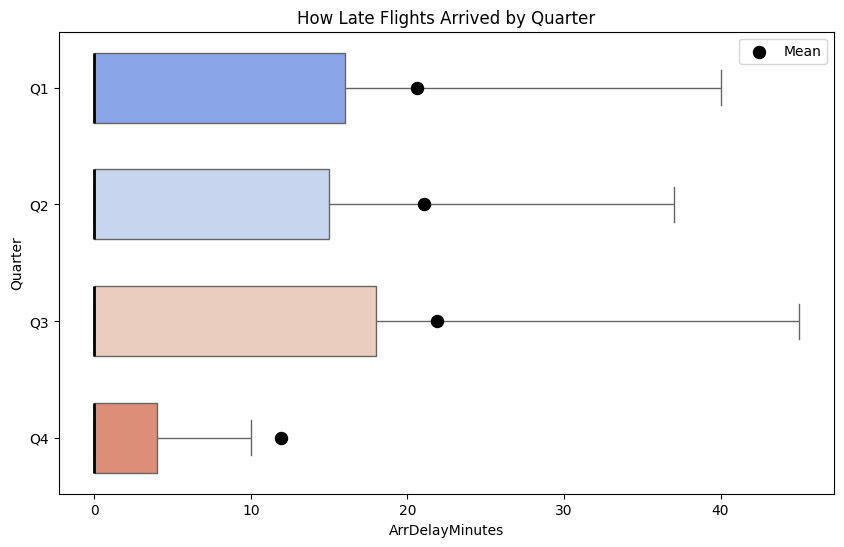

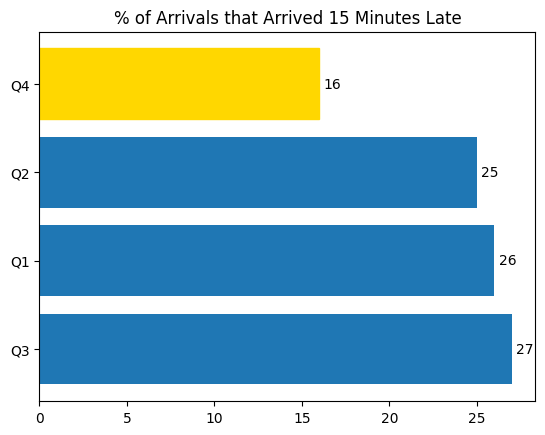


             Arrival Flights By Quarter:

         Arrivals  Mean Mins. Late  Median Mins. Late
Quarter                                              
Q4          37552               12                  0
Q1          42721               21                  0
Q2          40503               21                  0
Q3          35260               22                  0

         Flights  % 15 Minutes Late  % Cancelled
Quarter                                         
Q4         38589               16.0          3.0
Q2         41187               25.0          2.0
Q1         43531               26.0          2.0
Q3         36271               26.0          3.0



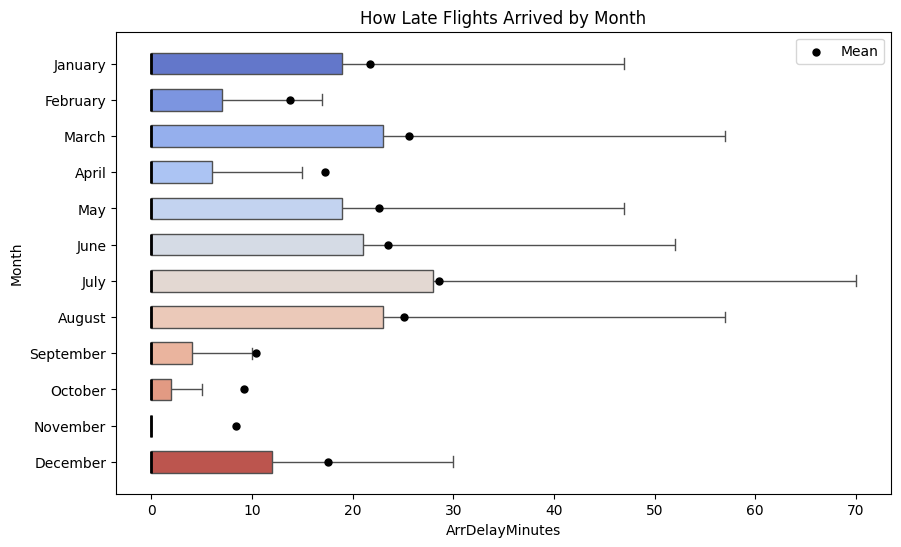

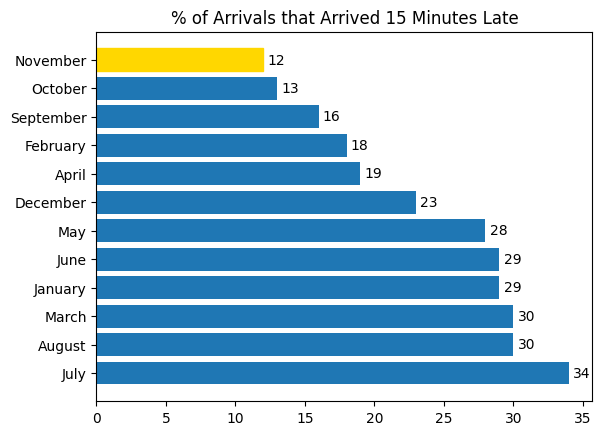


             Arrival Flights By Month:

           Arrivals  Mean Mins. Late  Median Mins. Late
Month                                                  
November      12625                8                  0
October       11365                9                  0
September     10677               10                  0
February      13515               14                  0
April         13978               17                  0
December      13562               18                  0
January       13832               22                  0
May           13626               23                  0
June          12899               24                  0
August        11723               25                  0
March         15374               26                  0
July          12860               29                  0

           Flights  % 15 Minutes Late  % Cancelled
Month                                             
November     12659               12.0          0.0
October      12290   

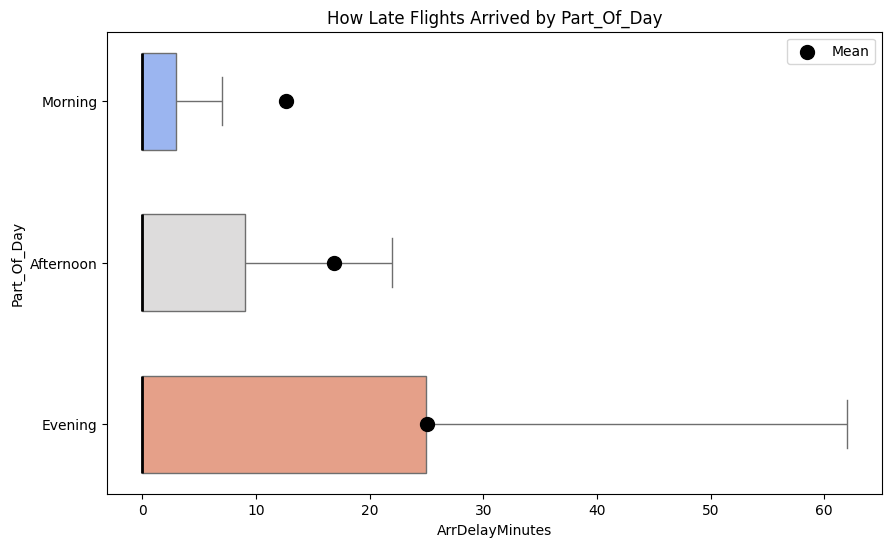

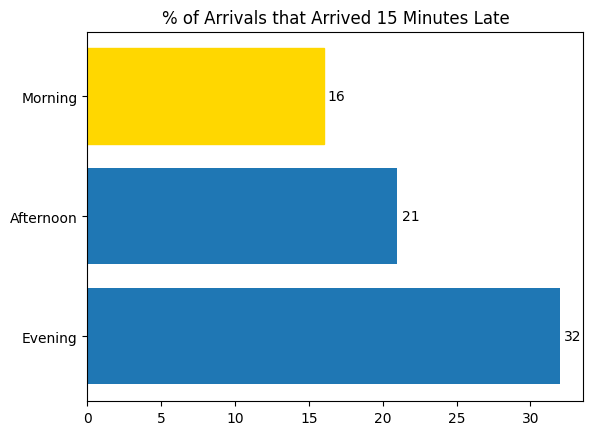


             Arrival Flights By Part_Of_Day:

             Arrivals  Mean Mins. Late  Median Mins. Late
Part_Of_Day                                              
Morning         48896               13                  0
Afternoon       42506               17                  0
Evening         64634               25                  0

             Flights  % 15 Minutes Late  % Cancelled
Part_Of_Day                                         
Morning        49811               16.0          2.0
Afternoon      43514               21.0          2.0
Evening        66253               31.0          2.0



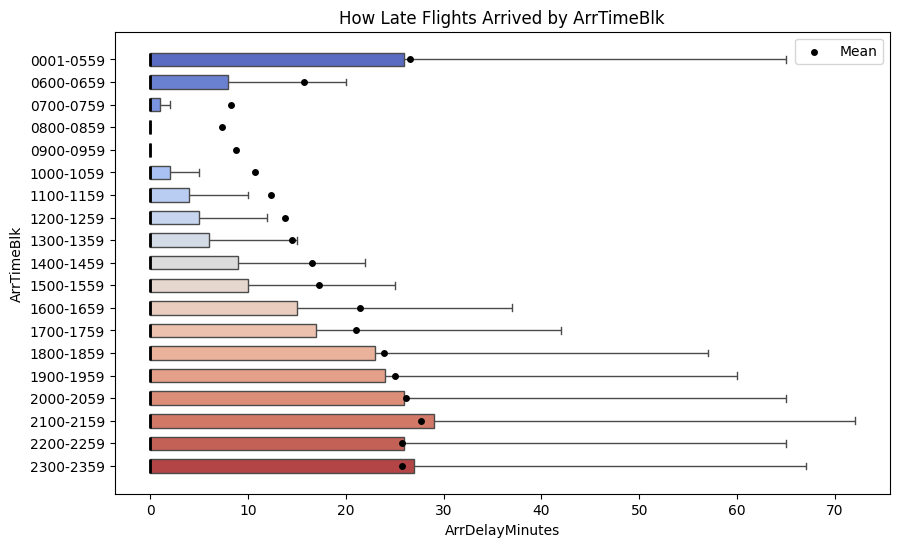

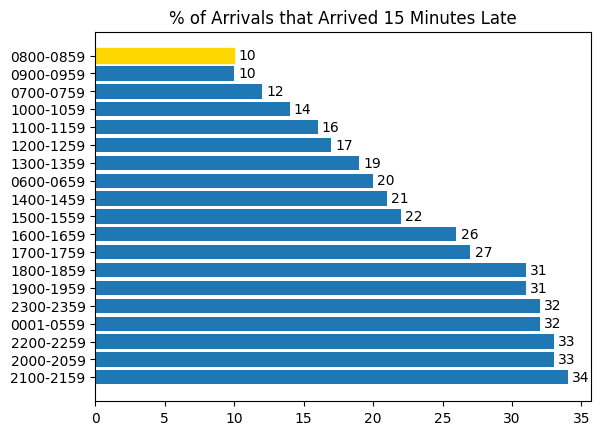


             Arrival Flights By ArrTimeBlk:

            Arrivals  Mean Mins. Late  Median Mins. Late
ArrTimeBlk                                              
0800-0859       7657                7                  0
0700-0759       3900                8                  0
0900-0959      10493                9                  0
1000-1059       8981               11                  0
1100-1159       7965               12                  0
1200-1259       7316               14                  0
1300-1359       8156               14                  0
0600-0659       2033               16                  0
1500-1559       8722               17                  0
1400-1459       9220               17                  0
1700-1759       8889               21                  0
1600-1659       9092               21                  0
1800-1859      10302               24                  0
1900-1959       8700               25                  0
2000-2059       9083               26     

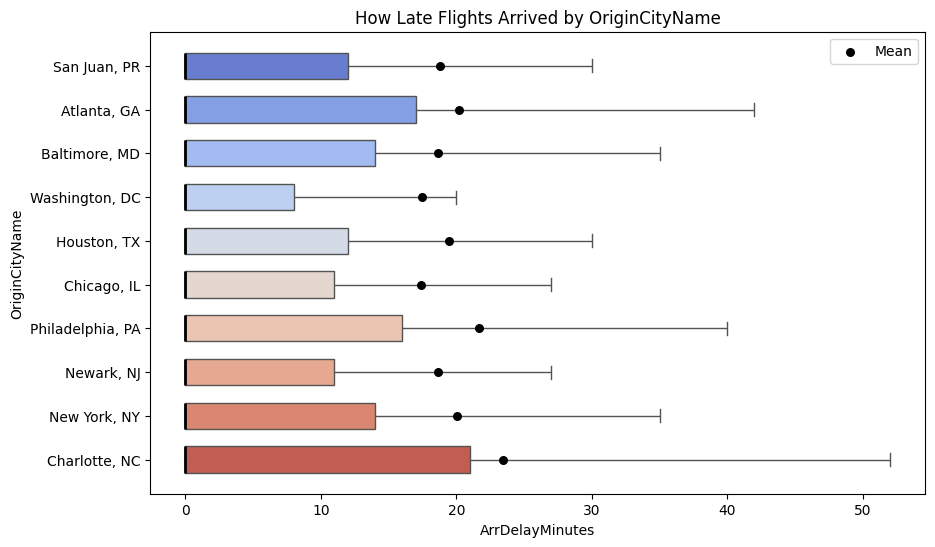

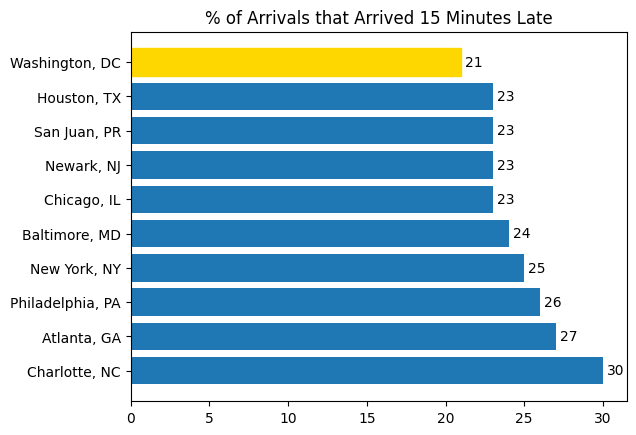


             Arrival Flights By OriginCityName:

                  Arrivals  Mean Mins. Late  Median Mins. Late
OriginCityName                                                
Washington, DC        6565               17                  0
Chicago, IL           7723               17                  0
San Juan, PR          6213               19                  0
Newark, NJ            6354               19                  0
Houston, TX           5655               19                  0
Baltimore, MD         5259               19                  0
New York, NY          9283               20                  0
Atlanta, GA           8771               20                  0
Philadelphia, PA      5449               22                  0
Charlotte, NC         5304               23                  0

                  Flights  % 15 Minutes Late  % Cancelled
OriginCityName                                           
Washington, DC       6711               20.0          2.0
Newark, NJ         

In [ ]:
print('Orlando International Airport had', ORL_Arr.ArrDelayMinutes.agg('count'), 'flights that arrived in 2024.\n')
Airport_delay_data(ORL_Arr, 'ArrDelayMinutes', 'ArrDel15', 'ArrTimeBlk', 'OriginCityName', 'Arrivals', 300) #Orlando Airport Delay Info

Orlando International Airport had 37060 arrival flights delayed at least 15 Minutes in 2024.

% of Outliers for Delay Minutes is  7
The median is 46 minutes arrived after scheduled time.
On average, flights arrive 76 minutes late.



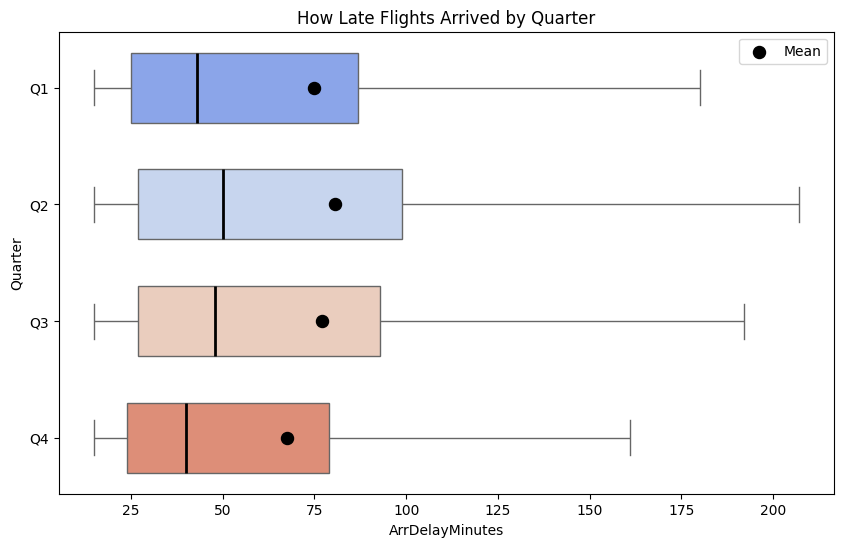


             Arrival Flights By Quarter:

         Arrivals  Mean Mins. Late  Median Mins. Late
Quarter                                              
Q4           6189               67                 40
Q1          11136               75                 43
Q3           9591               77                 48
Q2          10144               81                 50




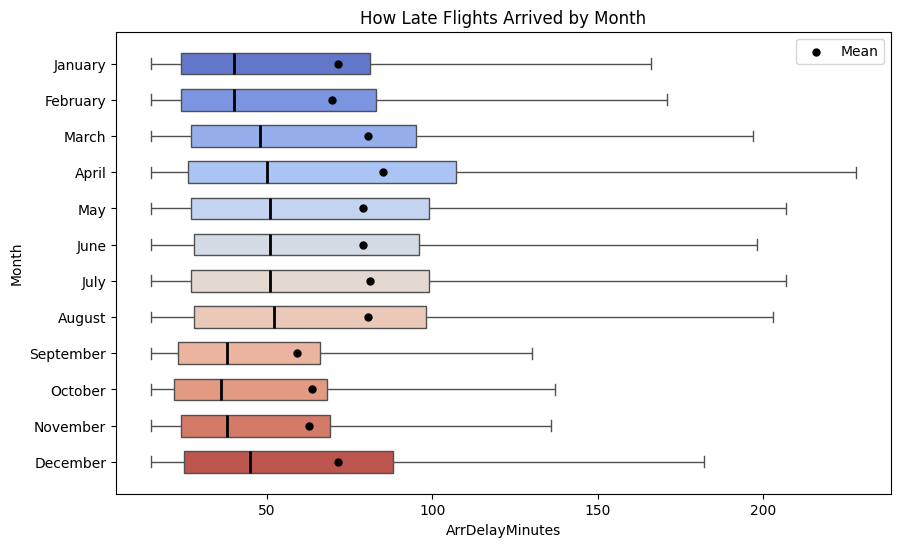


             Arrival Flights By Month:

           Arrivals  Mean Mins. Late  Median Mins. Late
Month                                                  
September      1718               59                 38
November       1545               63                 38
October        1491               64                 36
February       2479               70                 40
January        3984               71                 40
December       3153               71                 45
May            3762               79                 51
June           3679               79                 51
August         3520               80                 52
July           4353               81                 51
March          4673               81                 48
April          2703               85                 50




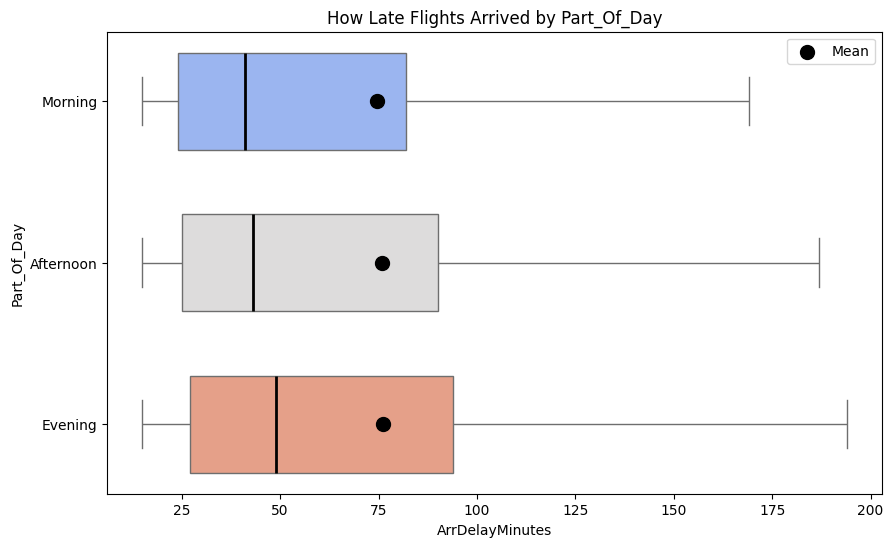


             Arrival Flights By Part_Of_Day:

             Arrivals  Mean Mins. Late  Median Mins. Late
Part_Of_Day                                              
Morning          7734               75                 41
Afternoon        8948               76                 43
Evening         20378               76                 49




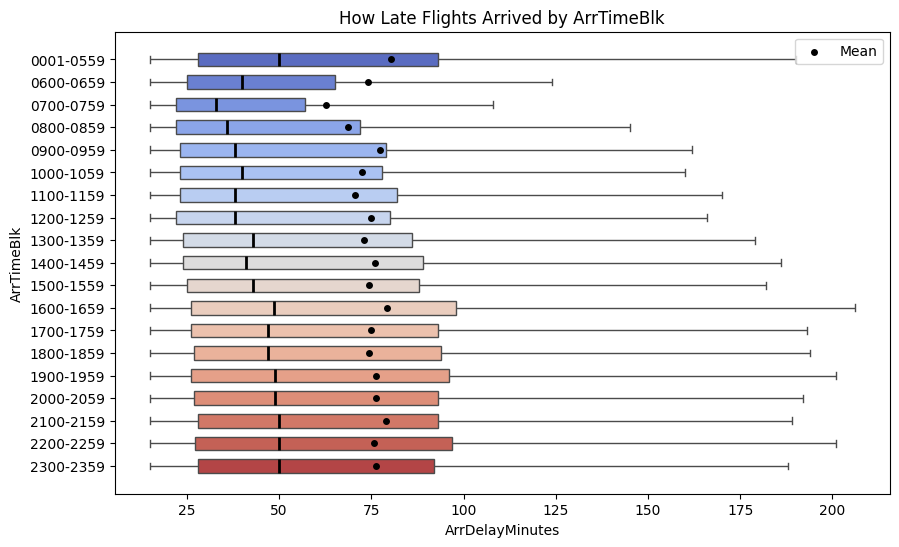


             Arrival Flights By ArrTimeBlk:

            Arrivals  Mean Mins. Late  Median Mins. Late
ArrTimeBlk                                              
0700-0759        460               63                 33
0800-0859        731               69                 36
1100-1159       1300               71                 38
1000-1059       1228               72                 40
1300-1359       1521               73                 43
0600-0659        408               74                 40
1500-1559       1909               74                 43
1800-1859       3161               74                 47
1200-1259       1266               75                 38
1700-1759       2368               75                 47
1900-1959       2738               76                 49
1400-1459       1906               76                 41
2000-2059       2991               76                 49
2200-2259       2610               76                 50
2300-2359       3139               76     

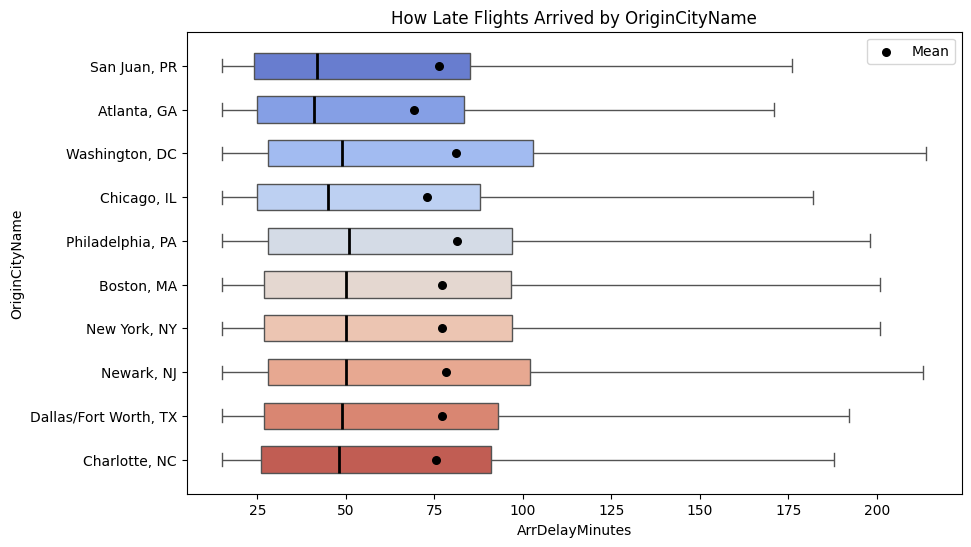


             Arrival Flights By OriginCityName:

                       Arrivals  Mean Mins. Late  Median Mins. Late
OriginCityName                                                     
Atlanta, GA                2399               69                 41
Chicago, IL                1745               73                 45
San Juan, PR               1448               76                 42
Charlotte, NC              1566               76                 48
Dallas/Fort Worth, TX      1613               77                 49
New York, NY               2319               77                 50
Boston, MA                 1326               77                 50
Newark, NJ                 1460               78                 50
Philadelphia, PA           1399               81                 51
Washington, DC             1350               81                 49




In [ ]:
ORL_Arr_15 = ORL_Arr[ORL_Arr.ArrDel15 == 'Delayed at least 15 Minutes']
ORL_Arr_15.reset_index(drop=True, inplace = True)
print('Orlando International Airport had', len(ORL_Arr_15), 'arrival flights delayed at least 15 Minutes in 2024.\n')
Airport_delay_data(ORL_Arr_15, 'ArrDelayMinutes', 'ArrDel15', 'ArrTimeBlk', 'OriginCityName', 'Arrivals', 300) #Orlando Airport Arrived 15 Minutes Late Info

Orlando International Airport had 9283 flights from New York, NY that arrived in 2024.

% of Outliers for Delay Minutes is  16
The median is 0 minutes arrived after scheduled time.
On average, flights arrive 20 minutes late.



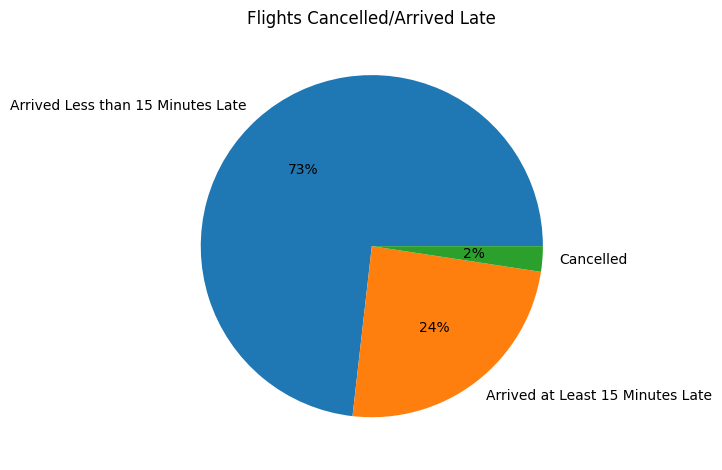


                                   Flights     %
Arrived Less than 15 Minutes Late     6964  73.2
Arrived at Least 15 Minutes Late      2319  24.4
Cancelled                              225   2.4



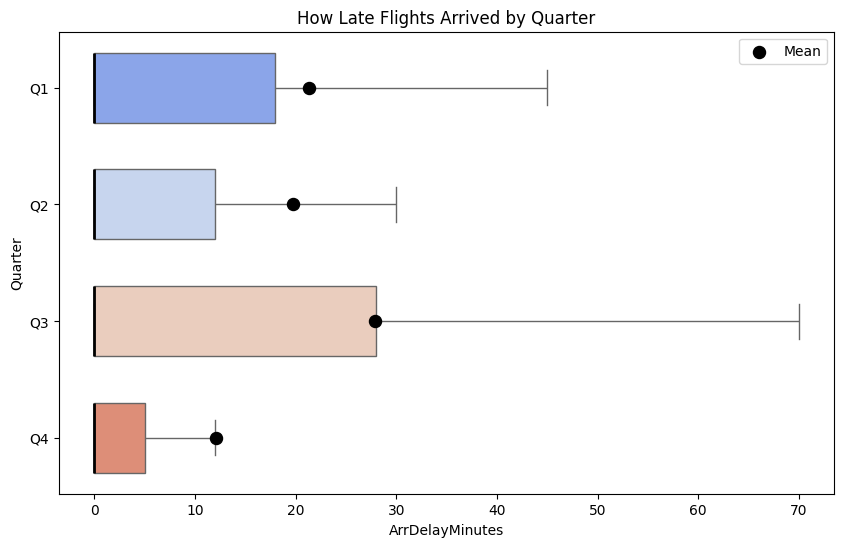

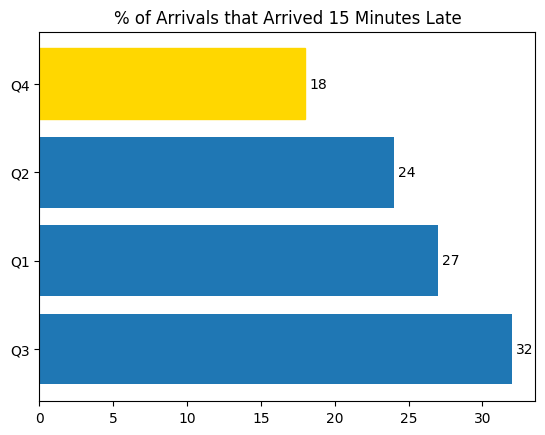


             Arrival Flights By Quarter:

         Arrivals  Mean Mins. Late  Median Mins. Late
Quarter                                              
Q4           2427               12                  0
Q2           2288               20                  0
Q1           2455               21                  0
Q3           2113               28                  0

         Flights  % 15 Minutes Late  % Cancelled
Quarter                                         
Q4          2481               18.0          2.0
Q2          2333               23.0          2.0
Q1          2493               27.0          2.0
Q3          2201               31.0          4.0



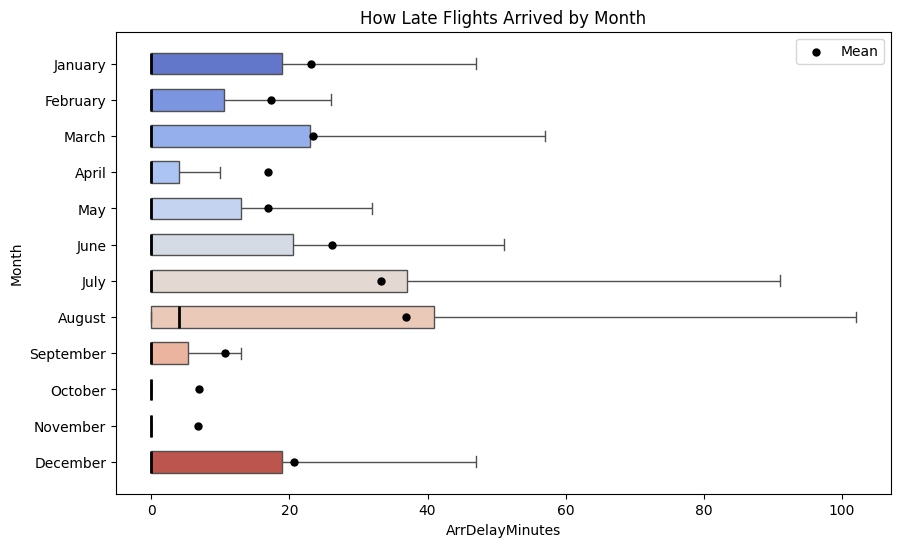

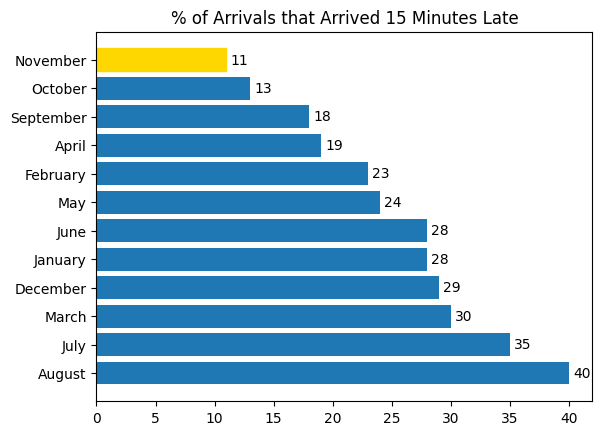


             Arrival Flights By Month:

           Arrivals  Mean Mins. Late  Median Mins. Late
Month                                                  
October         639                7                  0
November        857                7                  0
September       624               11                  0
April           807               17                  0
May             778               17                  0
February        791               17                  0
December        931               21                  0
January         821               23                  0
March           843               23                  0
June            703               26                  0
July            735               33                  0
August          754               37                  4

           Flights  % 15 Minutes Late  % Cancelled
Month                                             
November       857               11.0          0.0
October        691   

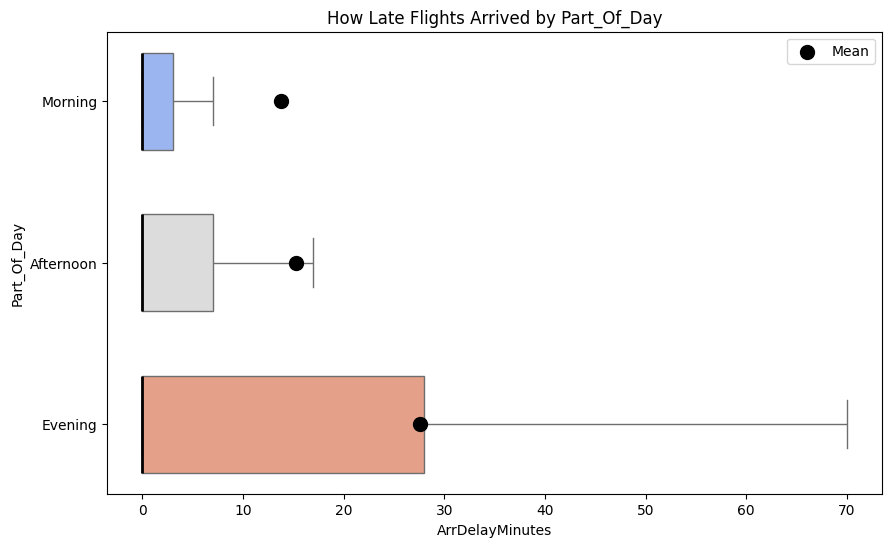

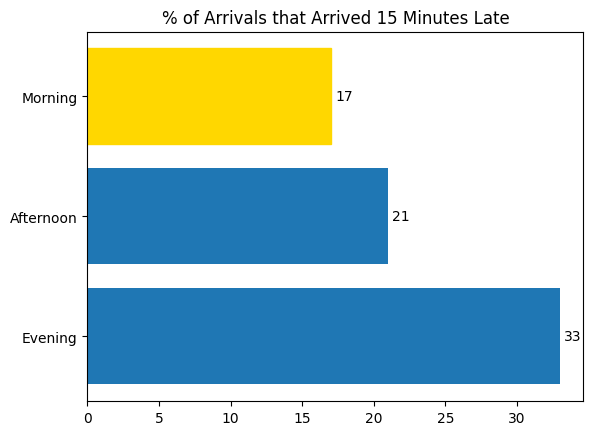


             Arrival Flights By Part_Of_Day:

             Arrivals  Mean Mins. Late  Median Mins. Late
Part_Of_Day                                              
Morning          2605               14                  0
Afternoon        2752               15                  0
Evening          3926               28                  0

             Flights  % 15 Minutes Late  % Cancelled
Part_Of_Day                                         
Morning         2675               17.0          3.0
Afternoon       2805               20.0          2.0
Evening         4028               32.0          3.0



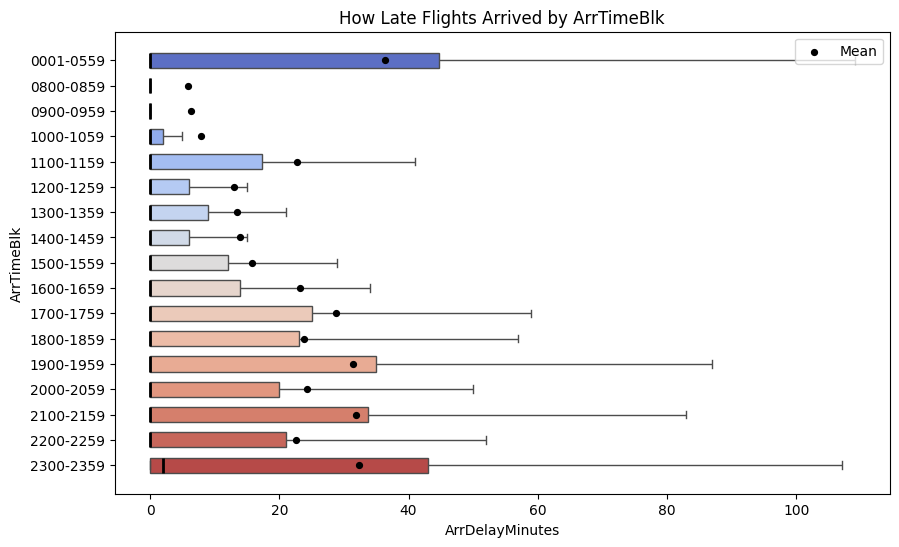

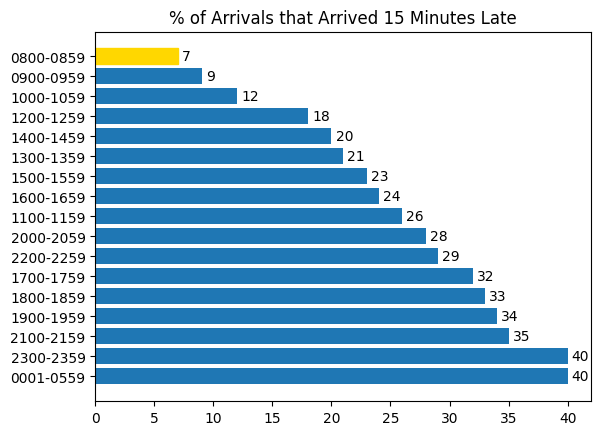


             Arrival Flights By ArrTimeBlk:

            Arrivals  Mean Mins. Late  Median Mins. Late
ArrTimeBlk                                              
0800-0859        344                6                  0
0900-0959        801                6                  0
1000-1059        732                8                  0
1200-1259        706               13                  0
1300-1359        425               13                  0
1400-1459        927               14                  0
1500-1559        243               16                  0
1100-1159        262               23                  0
2200-2259        624               23                  0
1600-1659        451               23                  0
2000-2059        466               24                  0
1800-1859        821               24                  0
1700-1759        378               29                  0
1900-1959        325               31                  0
2100-2159        522               32     

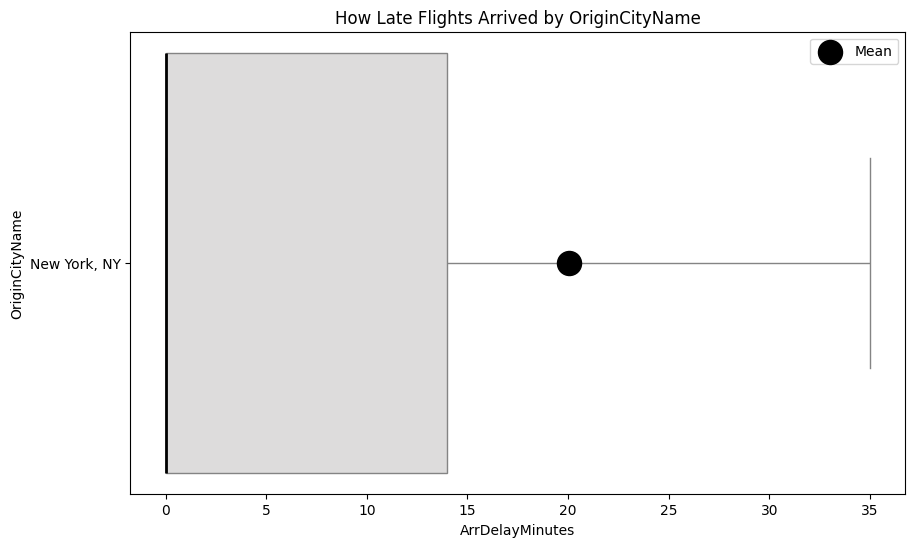


             Arrival Flights By OriginCityName:

                Arrivals  Mean Mins. Late  Median Mins. Late
OriginCityName                                              
New York, NY        9283               20                  0




In [ ]:
ORL_Arr_most_popular_origin = ORL_Arr.groupby('OriginCityName').agg(Flights=('ArrDelayMinutes', 'size'))
ORL_Arr_most_popular_origins = ORL_Arr_most_popular_origin.sort_values(by = 'Flights', ascending = False)
ORL_Arr_most_popular_origin = ORL_Arr_most_popular_origins.head(1)
ORL_Arr_most_popular_origin_name = str(ORL_Arr_most_popular_origin.index.values)
ORL_Arr_most_popular_origin_name = ORL_Arr_most_popular_origin_name[2:-2]
ORL_Origin = ORL_Arr[ORL_Arr.OriginCityName == ORL_Arr_most_popular_origin_name]
ORL_Origin.reset_index(drop=True, inplace = True)
most_pop_dest = str(ORL_Origin.OriginCityName.iloc[0])
print('Orlando International Airport had', ORL_Origin.ArrDelayMinutes.agg('count'),
      'flights from ' + most_pop_dest + ' that arrived in 2024.\n')
Airport_delay_data(ORL_Origin, 'ArrDelayMinutes', 'ArrDel15', 'ArrTimeBlk', 'OriginCityName', 'Arrivals', 300)

# **Arrivals and Departures By Airline:**

**Departures**

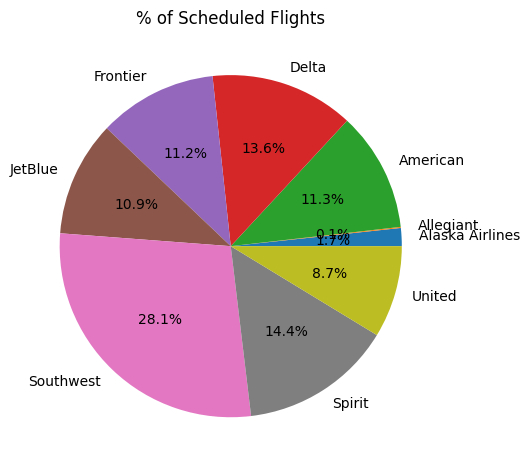

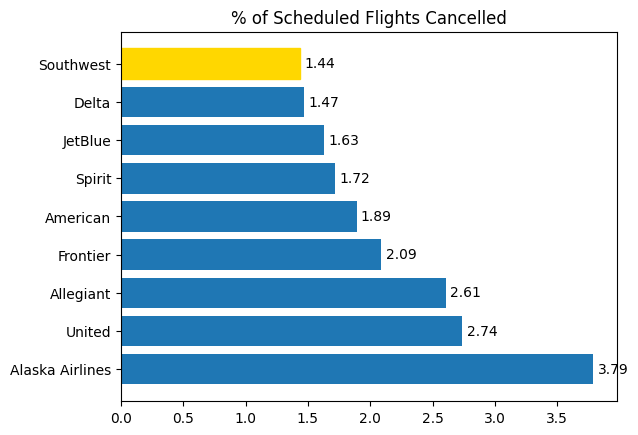

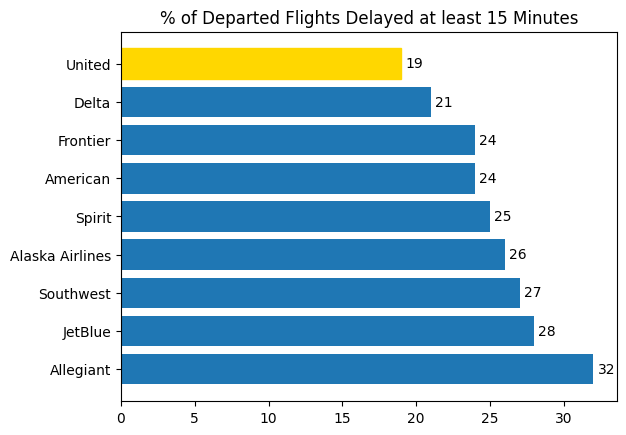


         % of Departed Flights Delayed at least 15 Minutes: 

                    Departures  Delayed 15 Mins %
Operating_Airline                                
United                   13461               19.0
Delta                    21447               21.0
Frontier                 17542               24.0
American                 17693               24.0
Spirit                   22528               25.0
Alaska Airlines           2541               26.0
Southwest                44221               27.0
JetBlue                  17053               28.0
Allegiant                  224               32.0

           % of Scheduled Flights Cancelled: 

                    Flights  Cancelled %
Operating_Airline                       
Southwest             44868         1.44
Delta                 21767         1.47
JetBlue               17335         1.63
Spirit                22923         1.72
American              18033         1.89
Frontier              17916         2.09
Allegiant  

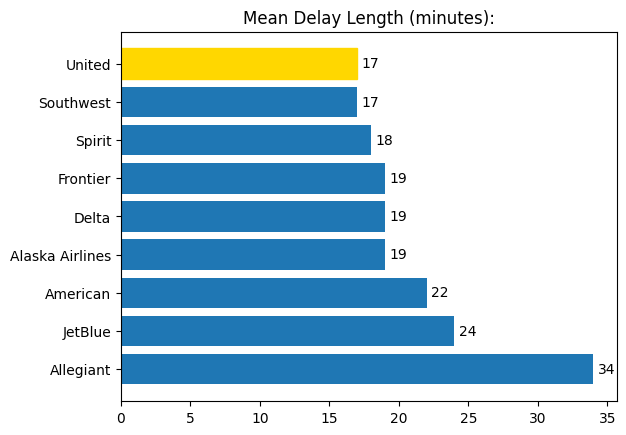


                          Delay Length: 

                    Departures  Mean_Mins_Delayed  Median_Mins_Delayed
Operating_Airline                                                     
Southwest                44221                 17                    2
United                   13461                 17                    0
Spirit                   22528                 18                    0
Alaska Airlines           2541                 19                    0
Frontier                 17542                 19                    0
Delta                    21447                 19                    0
American                 17693                 22                    0
JetBlue                  17053                 24                    0
Allegiant                  224                 34                    3

                          Southwest:

% of Outliers for Delay Minutes is  12
The median is 2 minutes departed after scheduled time.
On average, flights depart 17 minutes delay

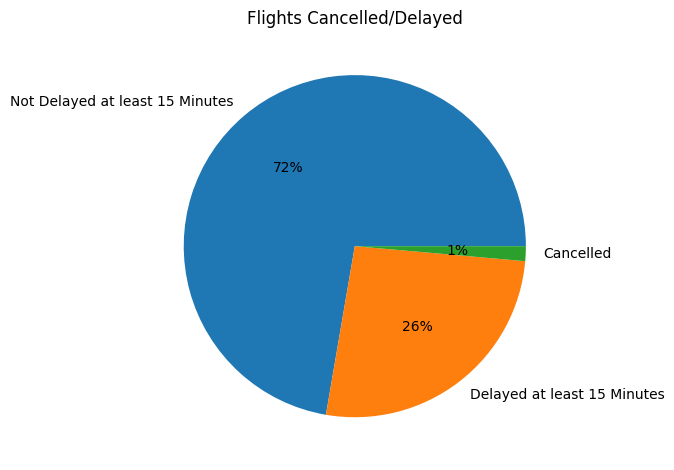


                                 Flights     %
DepDel15                                      
Not Delayed at least 15 Minutes    32430  72.3
Delayed at least 15 Minutes        11791  26.3
Cancelled                            647   1.4



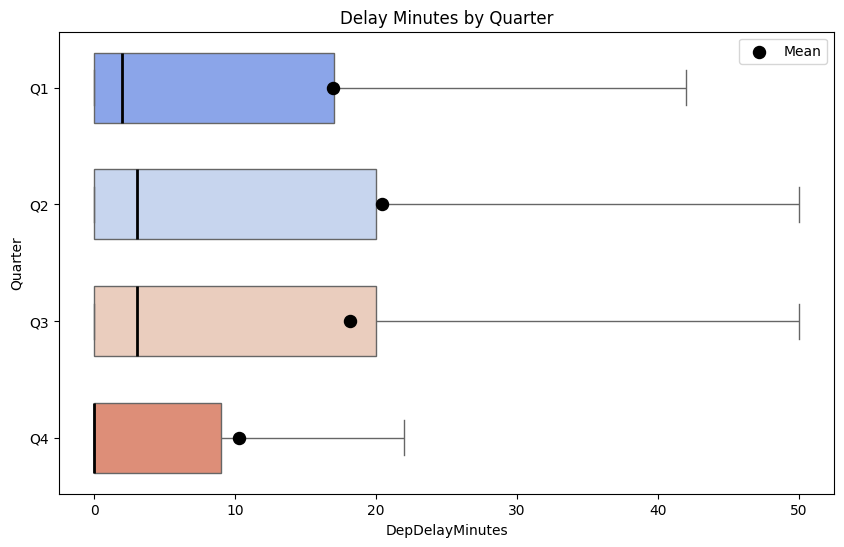

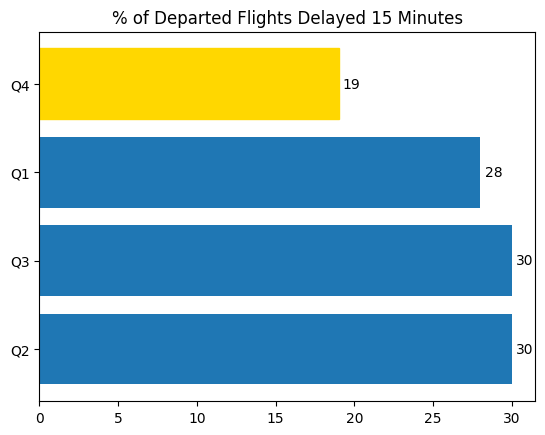


             Departed Flights By Quarter:

         Departures  Mean_Minutes_Delayed  Median_Minutes_Delayed
Quarter                                                          
Q4            10636                    10                       0
Q1            11608                    17                       2
Q3            10143                    18                       3
Q2            11834                    20                       3

         Flights  % Delayed 15 Minutes  % Cancelled
Quarter                                            
Q4         10915                  18.0          3.0
Q1         11797                  27.0          2.0
Q2         11902                  30.0          1.0
Q3         10254                  29.0          1.0



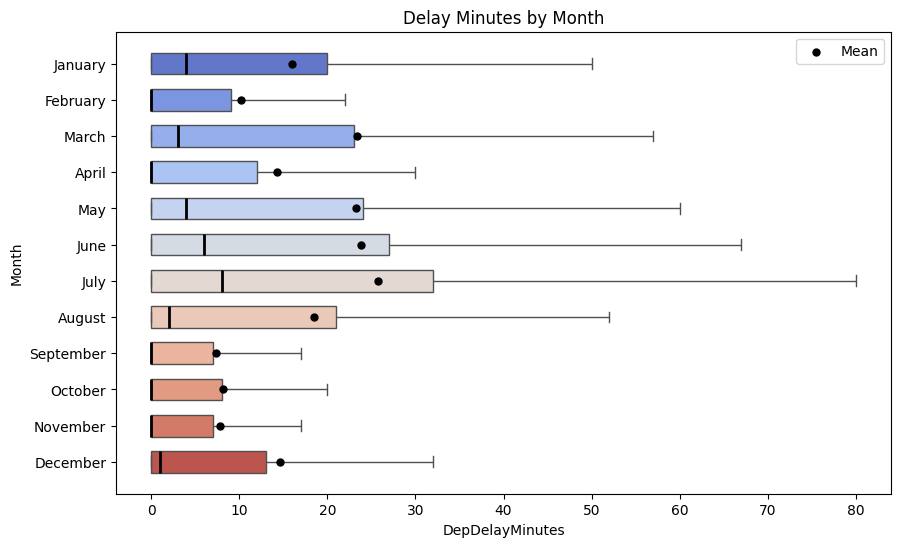

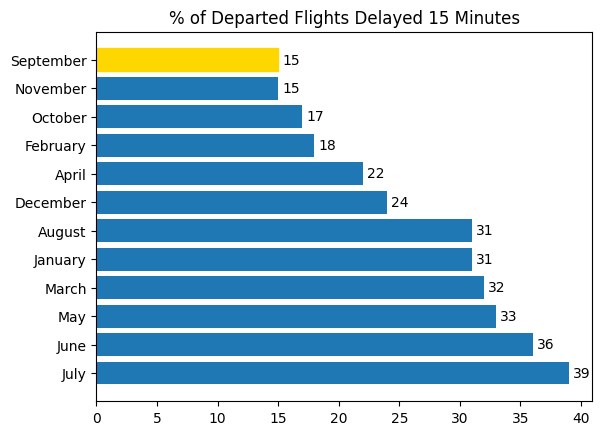


             Departed Flights By Month:

           Departures  Mean_Minutes_Delayed  Median_Minutes_Delayed
Month                                                              
September        2934                     7                       0
November         3575                     8                       0
October          3362                     8                       0
February         3561                    10                       0
April            3939                    14                       0
December         3699                    15                       1
January          3704                    16                       4
August           3163                    19                       2
March            4343                    23                       3
May              3907                    23                       4
June             3988                    24                       6
July             4046                    26                       8

     

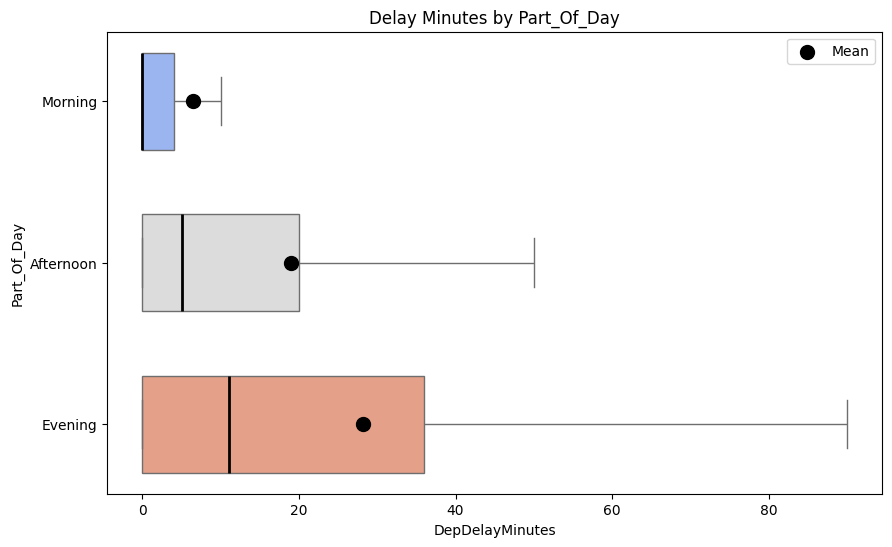

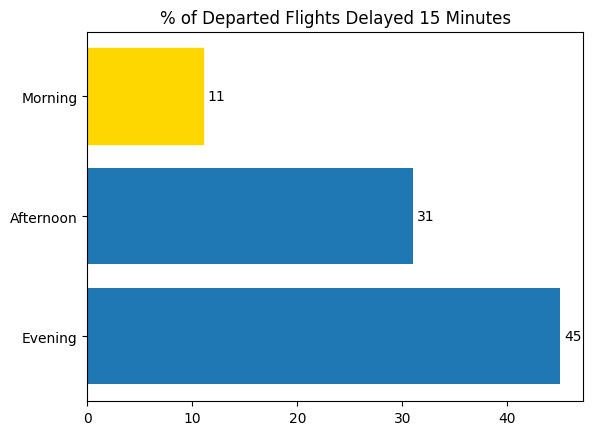


             Departed Flights By Part_Of_Day:

             Departures  Mean_Minutes_Delayed  Median_Minutes_Delayed
Part_Of_Day                                                          
Morning           18777                     6                       0
Afternoon         11590                    19                       5
Evening           13854                    28                      11

             Flights  % Delayed 15 Minutes  % Cancelled
Part_Of_Day                                            
Morning        19013                  11.0          1.0
Afternoon      11778                  30.0          2.0
Evening        14077                  44.0          2.0



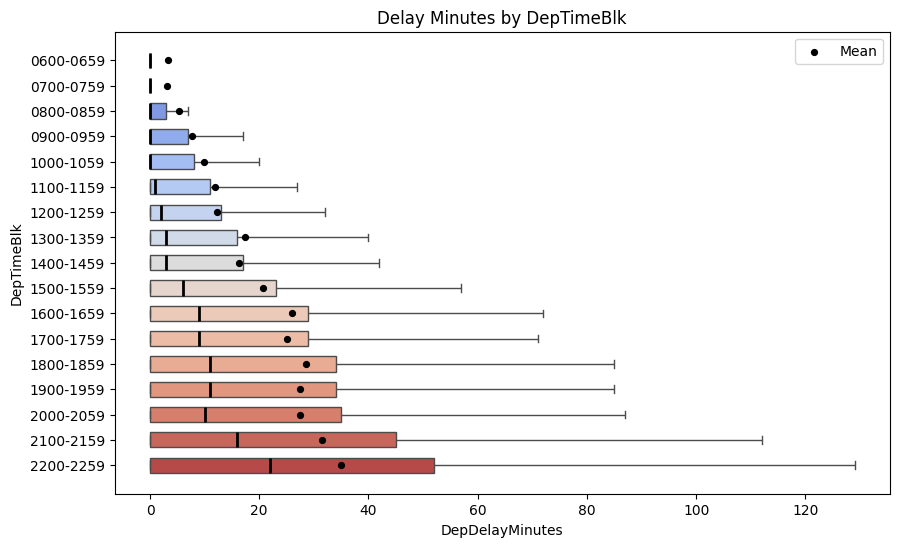

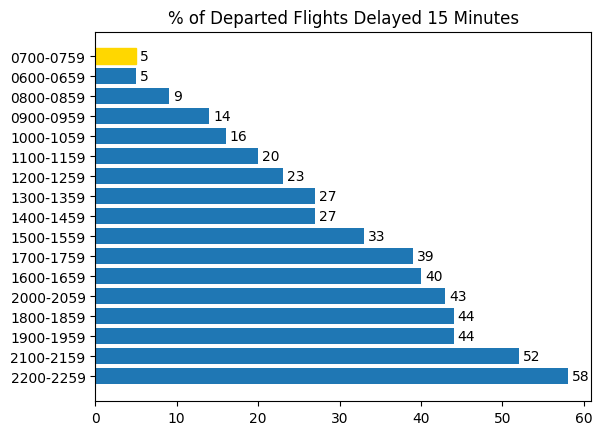


             Departed Flights By DepTimeBlk:

            Departures  Mean_Minutes_Delayed  Median_Minutes_Delayed
DepTimeBlk                                                          
0600-0659         3060                     3                       0
0700-0759         3962                     3                       0
0800-0859         3212                     5                       0
0900-0959         3155                     8                       0
1000-1059         2991                    10                       0
1100-1159         2397                    12                       1
1200-1259         1919                    12                       2
1400-1459         2347                    16                       3
1300-1359         2209                    17                       3
1500-1559         2387                    21                       6
1700-1759         2460                    25                       9
1600-1659         2728                    26            

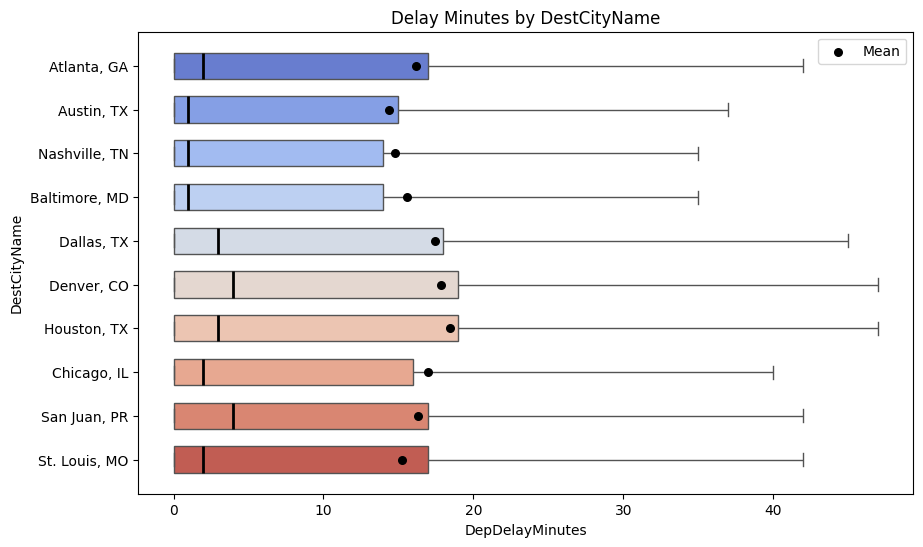

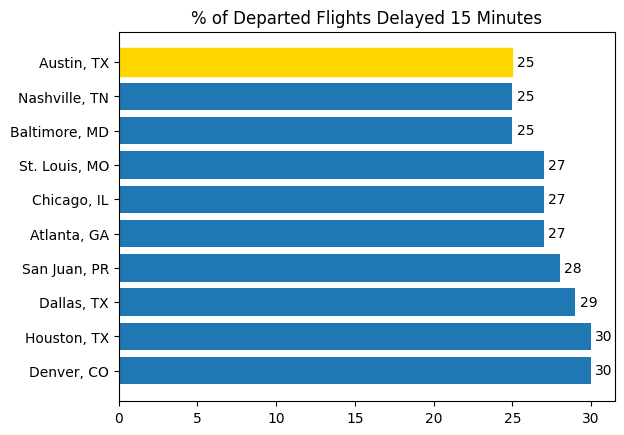


             Departed Flights By DestCityName:

               Departures  Mean_Mins_Delayed  Median_Mins_Delayed
DestCityName                                                     
Austin, TX           1821                 14                    1
St. Louis, MO        1856                 15                    2
Nashville, TN        2053                 15                    1
Baltimore, MD        3652                 16                    1
Atlanta, GA          1674                 16                    2
San Juan, PR         1966                 16                    4
Chicago, IL          3009                 17                    2
Dallas, TX           2636                 17                    3
Denver, CO           1892                 18                    4
Houston, TX          2189                 18                    3

               Flights  % Delayed 15 Minutes  % Cancelled
DestCityName                                             
Baltimore, MD     3728                  24

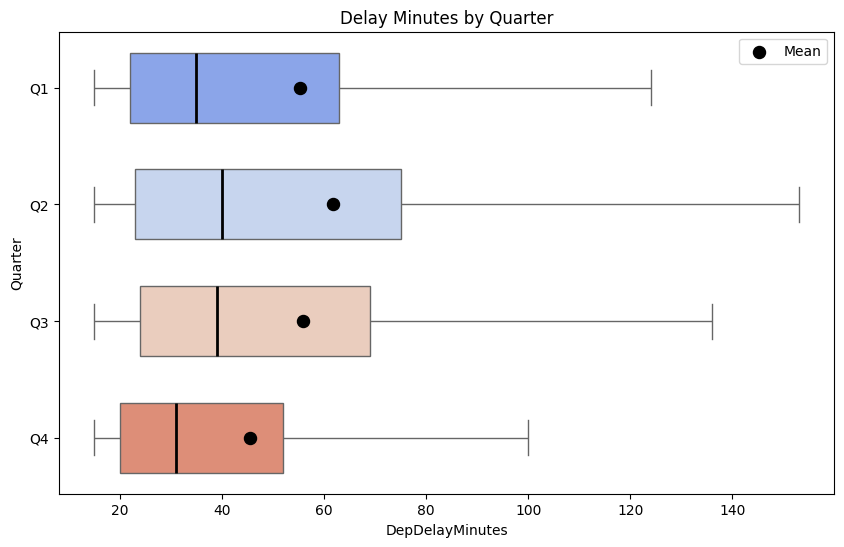


             Departed Flights By Quarter:

         Departures  Mean_Minutes_Delayed  Median_Minutes_Delayed
Quarter                                                          
Q4             2003                    46                      31
Q1             3196                    55                      35
Q3             2996                    56                      39
Q2             3596                    62                      40




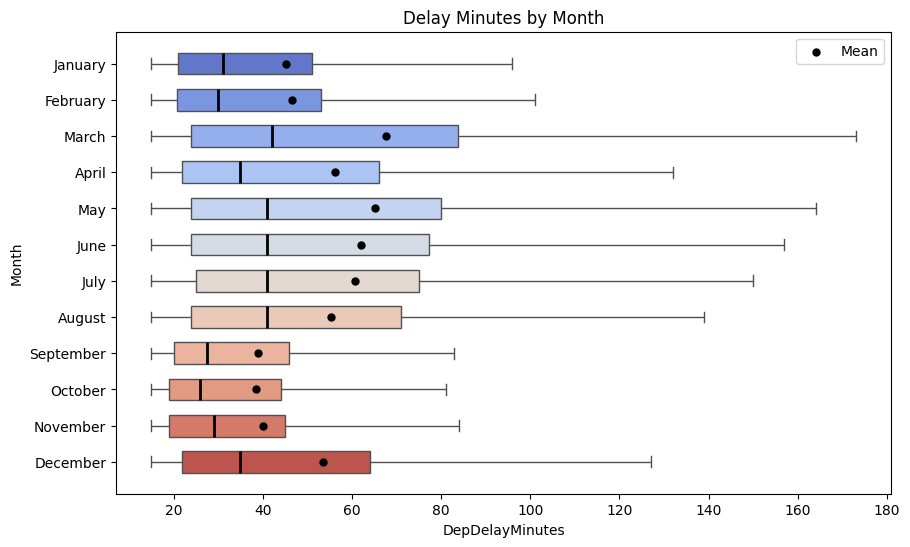


             Departed Flights By Month:

           Departures  Mean_Minutes_Delayed  Median_Minutes_Delayed
Month                                                              
October           565                    38                      26
September         432                    39                      28
November          549                    40                      29
January          1150                    45                      31
February          648                    47                      30
December          889                    53                      35
August            968                    55                      41
April             885                    56                      35
July             1596                    61                      41
June             1416                    62                      41
May              1295                    65                      41
March            1398                    68                      42




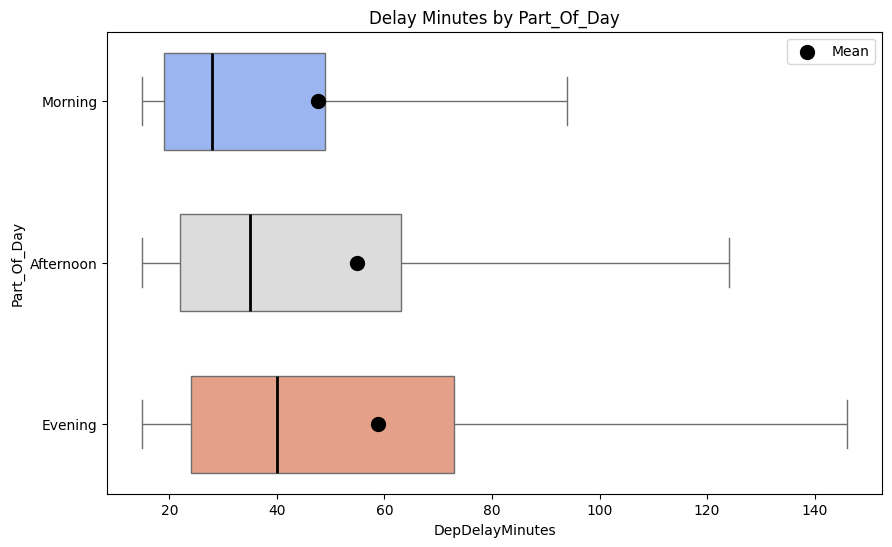


             Departed Flights By Part_Of_Day:

             Departures  Mean_Minutes_Delayed  Median_Minutes_Delayed
Part_Of_Day                                                          
Morning            2010                    48                      28
Afternoon          3577                    55                      35
Evening            6204                    59                      40




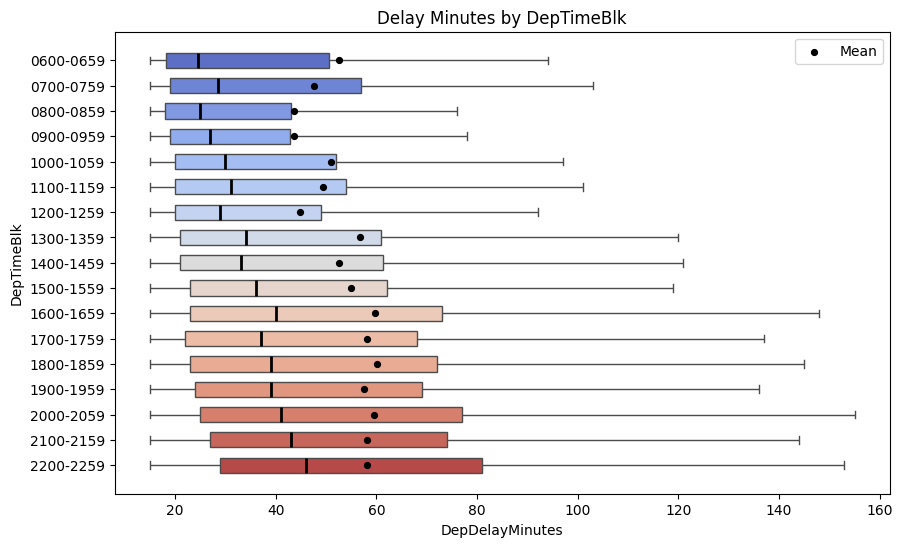


             Departed Flights By DepTimeBlk:

            Departures  Mean_Minutes_Delayed  Median_Minutes_Delayed
DepTimeBlk                                                          
0900-0959          426                    44                      27
0800-0859          291                    44                      25
1200-1259          449                    45                      29
0700-0759          196                    48                      28
1100-1159          483                    49                      31
1000-1059          464                    51                      30
0600-0659          150                    53                      24
1400-1459          640                    53                      33
1500-1559          799                    55                      36
1300-1359          599                    57                      34
1700-1759          970                    58                      37
1900-1959         1176                    58            

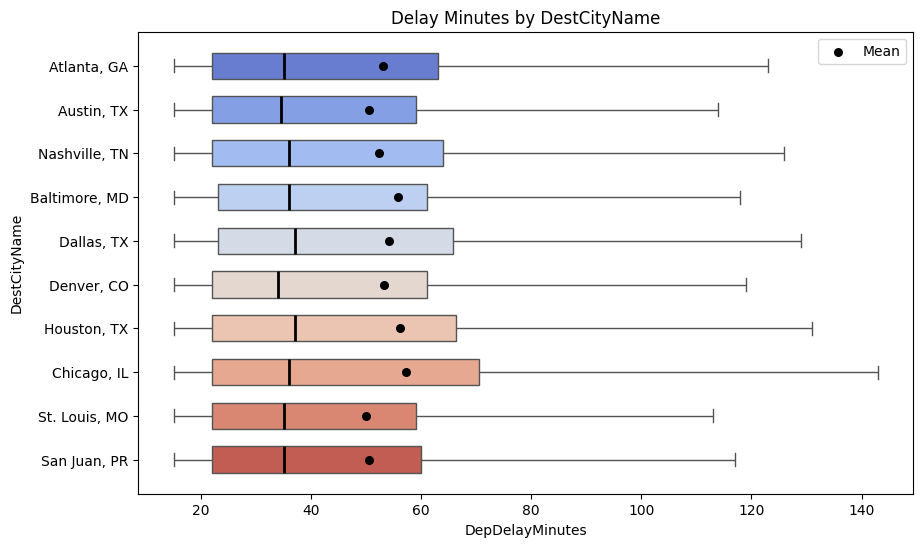


             Departed Flights By DestCityName:

               Departures  Mean_Mins_Delayed  Median_Mins_Delayed
DestCityName                                                     
St. Louis, MO         502                 50                   35
San Juan, PR          548                 51                   35
Austin, TX            458                 51                   34
Nashville, TN         513                 52                   36
Atlanta, GA           454                 53                   35
Denver, CO            566                 53                   34
Dallas, TX            758                 54                   37
Baltimore, MD         909                 56                   36
Houston, TX           648                 56                   37
Chicago, IL           803                 57                   36



                          Spirit:

% of Outliers for Delay Minutes is  14
The median is 0 minutes departed after scheduled time.
On average, flights depart 

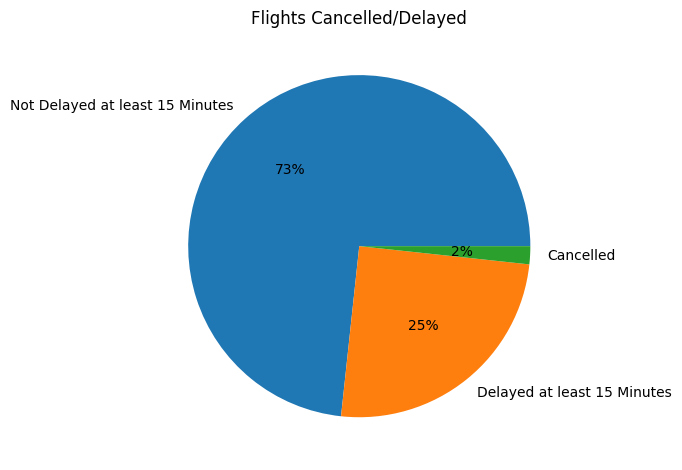


                                 Flights     %
DepDel15                                      
Not Delayed at least 15 Minutes    16805  73.3
Delayed at least 15 Minutes         5723  25.0
Cancelled                            395   1.7



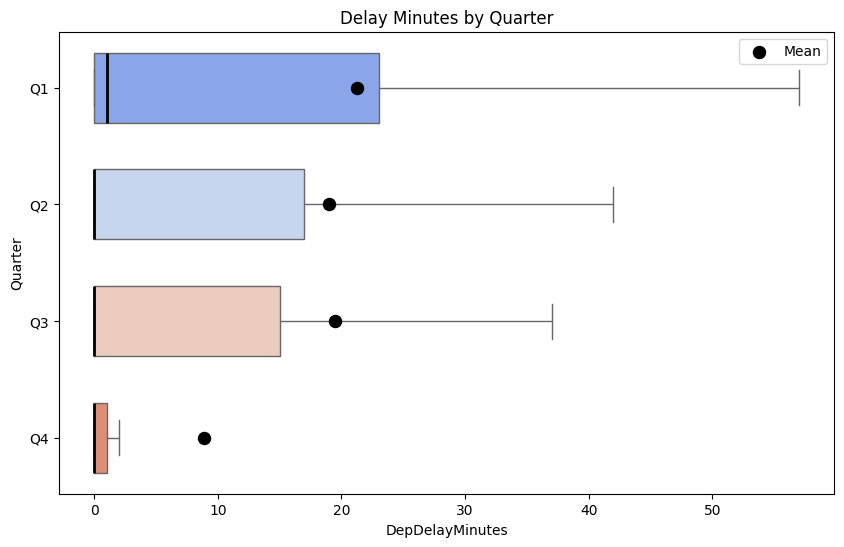

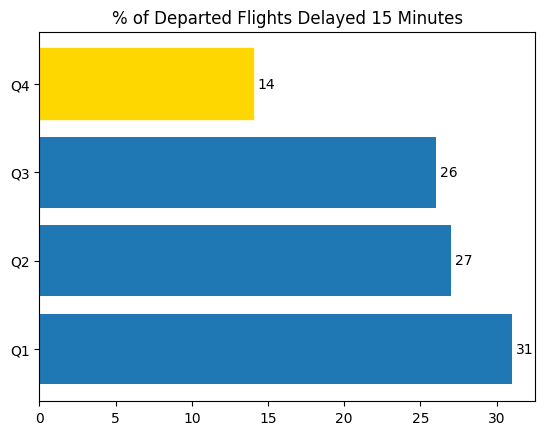


             Departed Flights By Quarter:

         Departures  Mean_Minutes_Delayed  Median_Minutes_Delayed
Quarter                                                          
Q4             4498                     9                       0
Q2             6319                    19                       0
Q3             4976                    20                       0
Q1             6735                    21                       1

         Flights  % Delayed 15 Minutes  % Cancelled
Quarter                                            
Q4          4629                  14.0          3.0
Q3          5086                  25.0          2.0
Q2          6401                  26.0          1.0
Q1          6807                  31.0          1.0



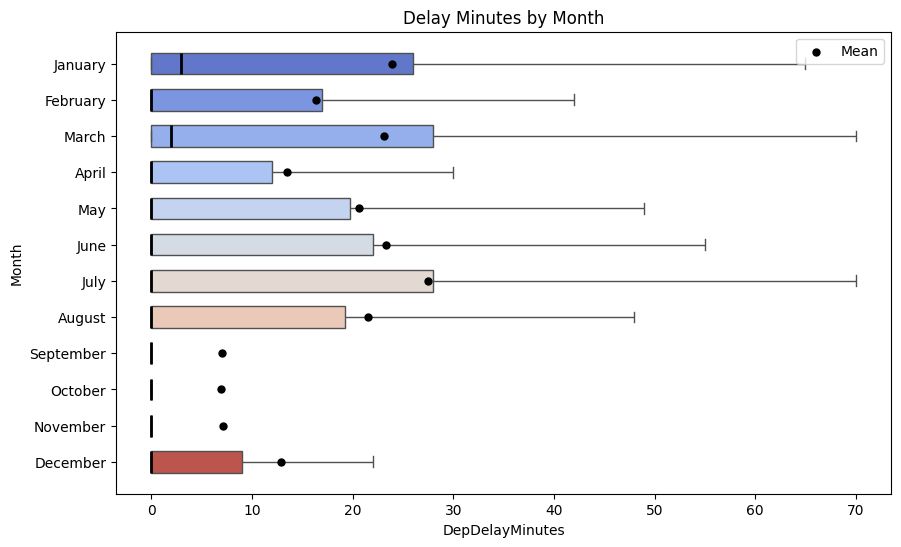

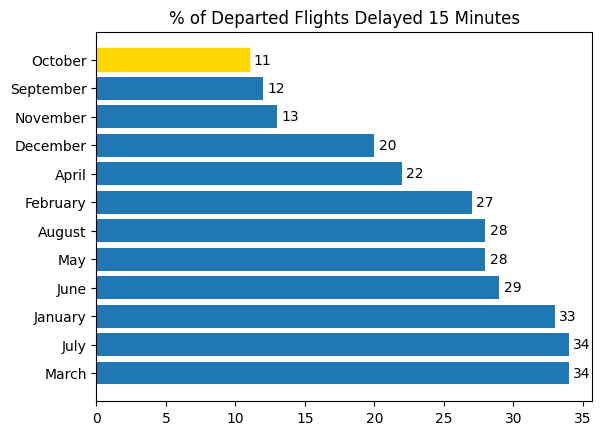


             Departed Flights By Month:

           Departures  Mean_Minutes_Delayed  Median_Minutes_Delayed
Month                                                              
October          1490                     7                       0
September        1428                     7                       0
November         1603                     7                       0
April            2207                    13                       0
December         1405                    13                       0
February         2131                    16                       0
May              2166                    21                       0
August           1764                    22                       0
June             1946                    23                       0
March            2453                    23                       2
January          2151                    24                       3
July             1784                    27                       0

     

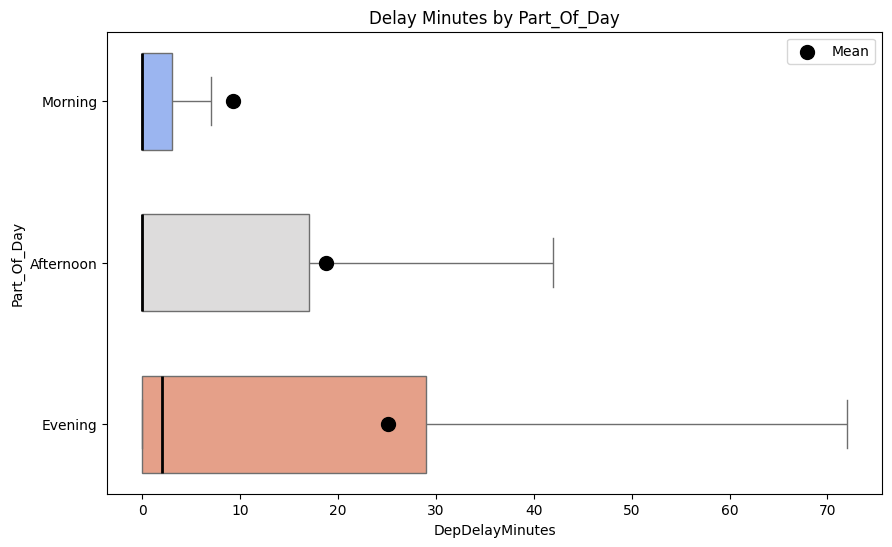

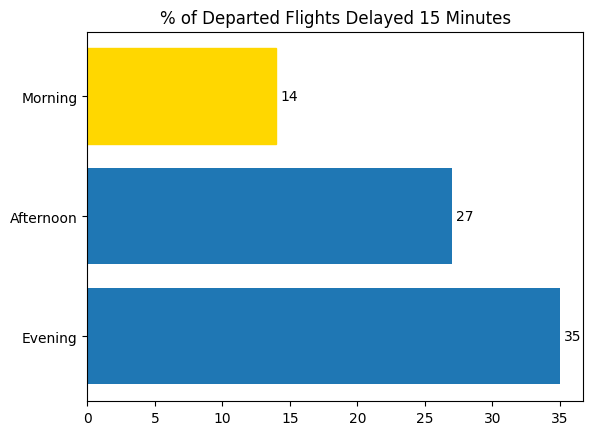


             Departed Flights By Part_Of_Day:

             Departures  Mean_Minutes_Delayed  Median_Minutes_Delayed
Part_Of_Day                                                          
Morning            8409                     9                       0
Afternoon          5015                    19                       0
Evening            9104                    25                       2

             Flights  % Delayed 15 Minutes  % Cancelled
Part_Of_Day                                            
Morning         8522                  14.0          1.0
Afternoon       5125                  27.0          2.0
Evening         9276                  34.0          2.0



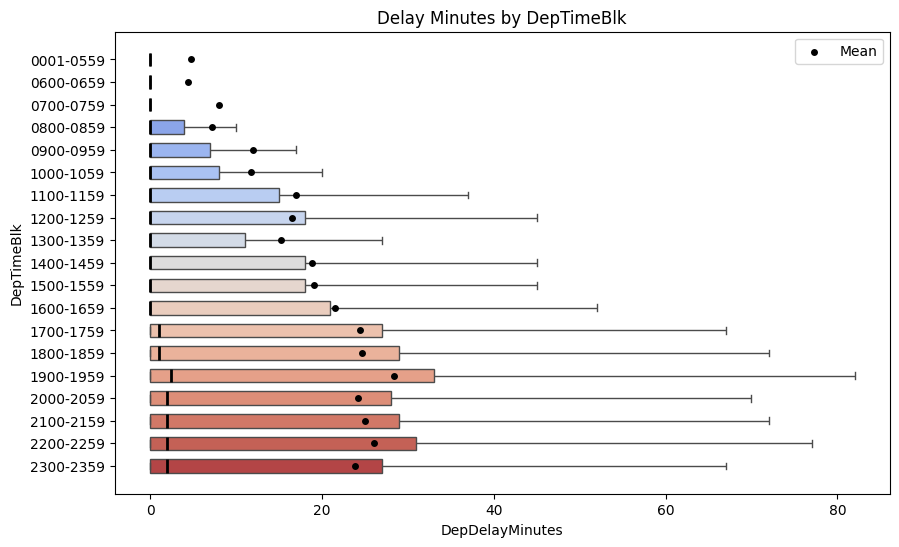

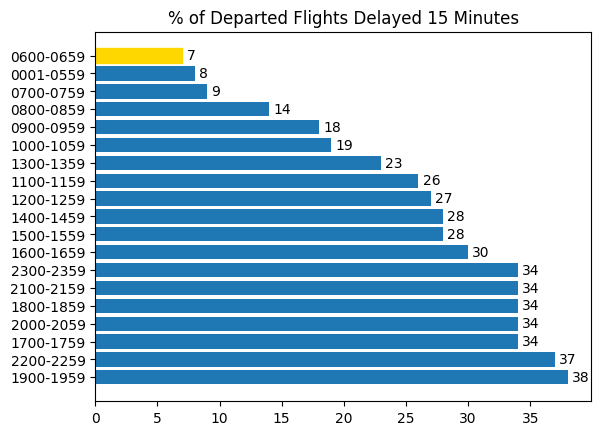


             Departed Flights By DepTimeBlk:

            Departures  Mean_Minutes_Delayed  Median_Minutes_Delayed
DepTimeBlk                                                          
0600-0659         1351                     4                       0
0001-0559         1169                     5                       0
0800-0859         1174                     7                       0
0700-0759          856                     8                       0
0900-0959         1727                    12                       0
1000-1059         1223                    12                       0
1300-1359          867                    15                       0
1100-1159          909                    17                       0
1200-1259          429                    17                       0
1400-1459         1271                    19                       0
1500-1559         1291                    19                       0
1600-1659         1157                    22            

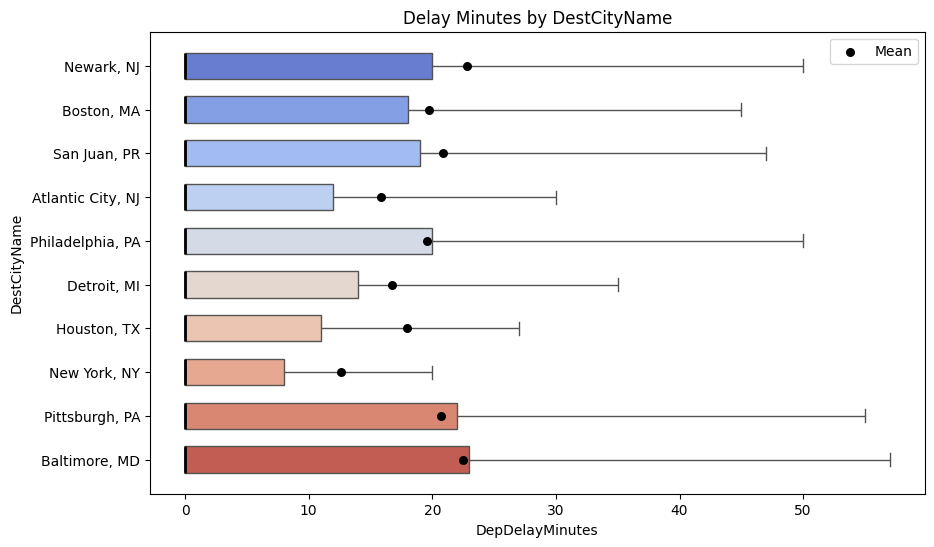

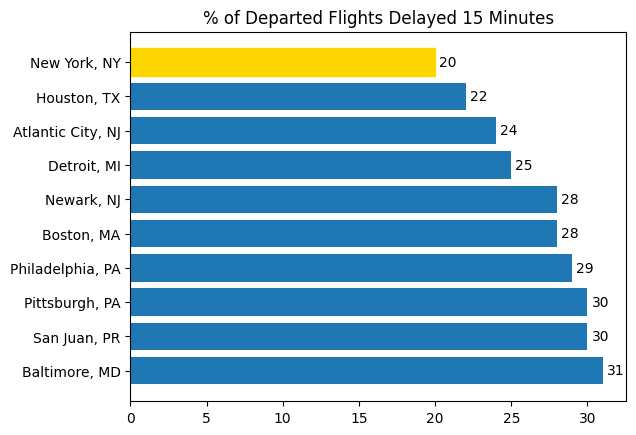


             Departed Flights By DestCityName:

                   Departures  Mean_Mins_Delayed  Median_Mins_Delayed
DestCityName                                                         
New York, NY              872                 13                    0
Atlantic City, NJ         922                 16                    0
Detroit, MI              1264                 17                    0
Houston, TX               850                 18                    0
Philadelphia, PA          865                 20                    0
Boston, MA               1041                 20                    0
Pittsburgh, PA            874                 21                    0
San Juan, PR             1072                 21                    0
Baltimore, MD            1039                 23                    0
Newark, NJ               1379                 23                    0

                   Flights  % Delayed 15 Minutes  % Cancelled
DestCityName                                    

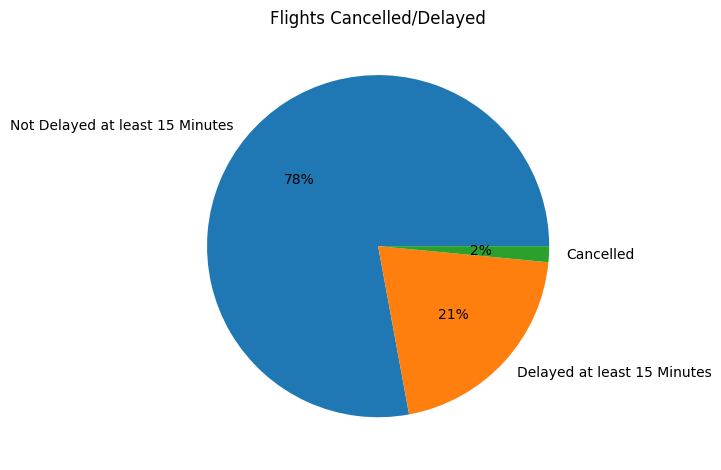


                                 Flights     %
DepDel15                                      
Not Delayed at least 15 Minutes    16963  77.9
Delayed at least 15 Minutes         4484  20.6
Cancelled                            320   1.5



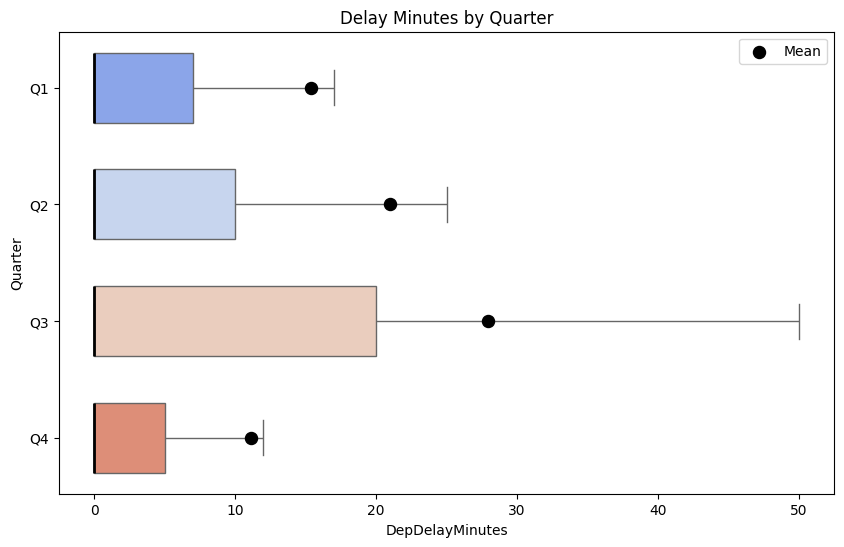

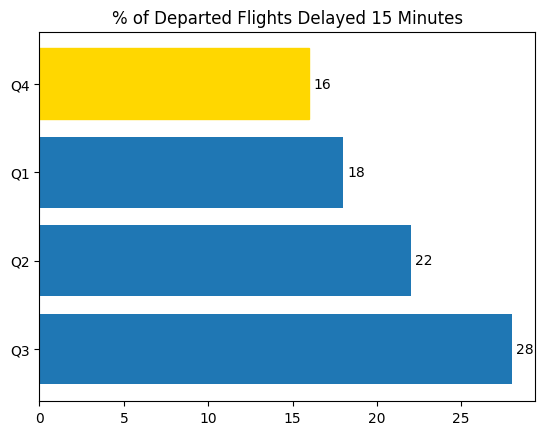


             Departed Flights By Quarter:

         Departures  Mean_Minutes_Delayed  Median_Minutes_Delayed
Quarter                                                          
Q4             5322                    11                       0
Q1             5574                    15                       0
Q2             5580                    21                       0
Q3             4971                    28                       0

         Flights  % Delayed 15 Minutes  % Cancelled
Quarter                                            
Q4          5442                  15.0          2.0
Q1          5588                  18.0          0.0
Q2          5594                  22.0          0.0
Q3          5143                  27.0          3.0



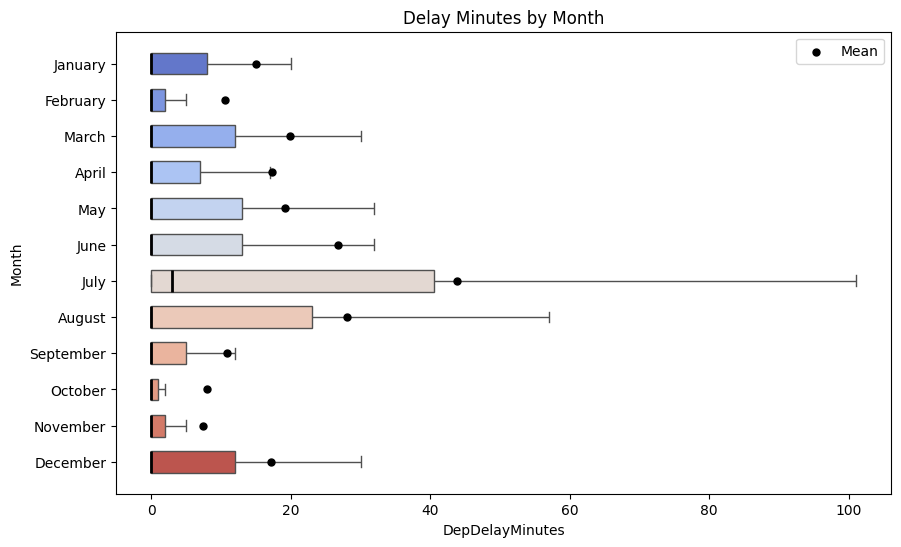

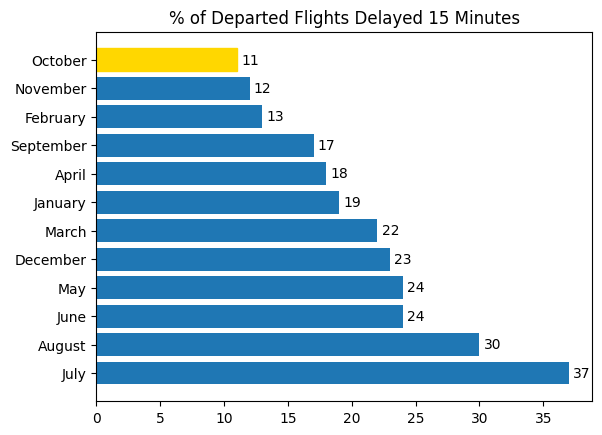


             Departed Flights By Month:

           Departures  Mean_Minutes_Delayed  Median_Minutes_Delayed
Month                                                              
November         1741                     7                       0
October          1645                     8                       0
February         1733                    11                       0
September        1597                    11                       0
January          1865                    15                       0
December         1936                    17                       0
April            1921                    17                       0
May              1865                    19                       0
March            1976                    20                       0
June             1794                    27                       0
August           1663                    28                       0
July             1711                    44                       3

     

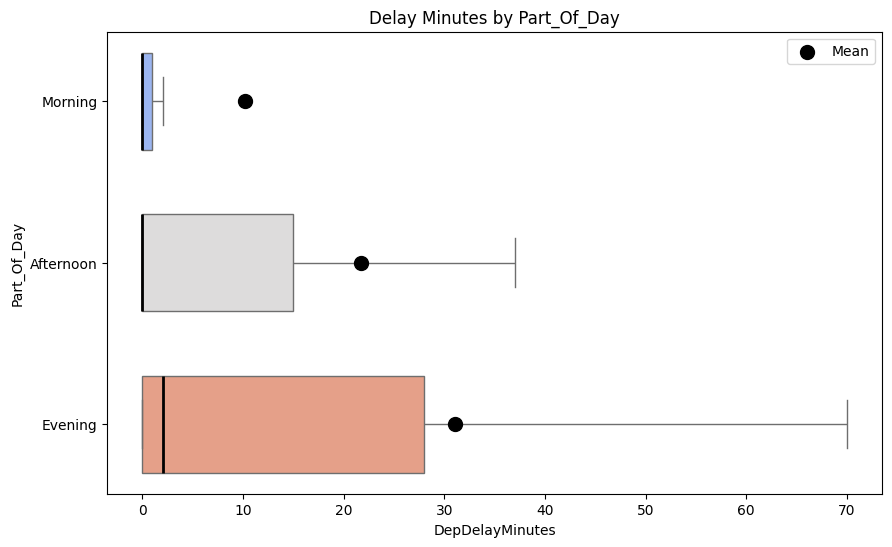

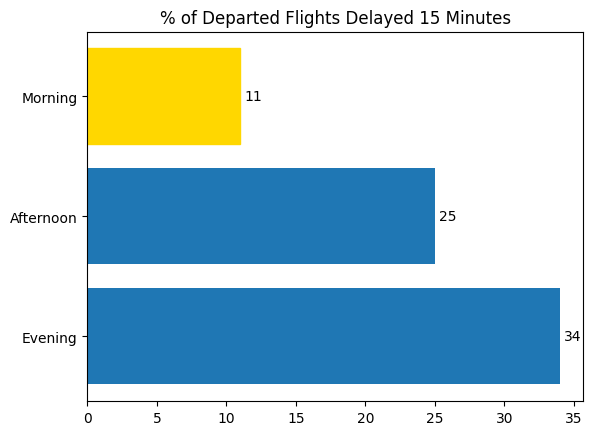


             Departed Flights By Part_Of_Day:

             Departures  Mean_Minutes_Delayed  Median_Minutes_Delayed
Part_Of_Day                                                          
Morning            9992                    10                       0
Afternoon          6123                    22                       0
Evening            5332                    31                       2

             Flights  % Delayed 15 Minutes  % Cancelled
Part_Of_Day                                            
Morning        10122                  11.0          1.0
Afternoon       6204                  25.0          1.0
Evening         5441                  34.0          2.0



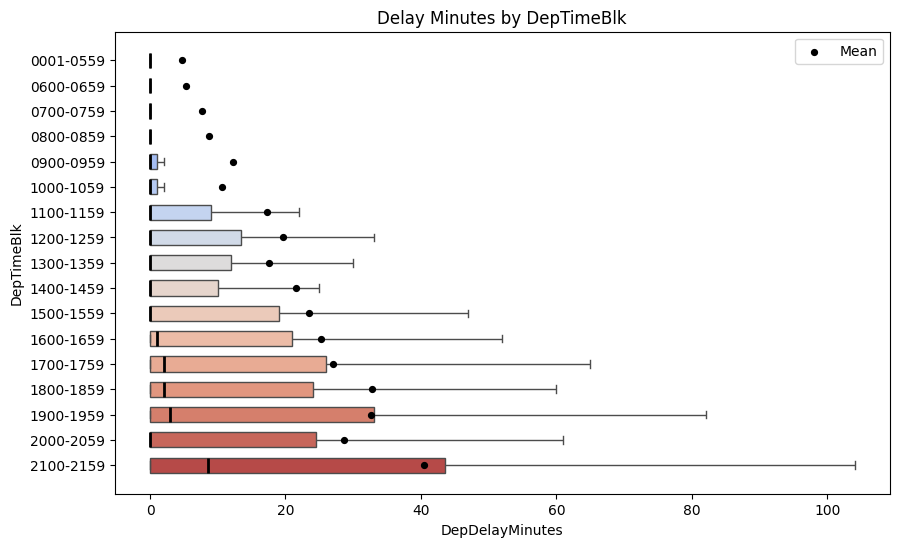

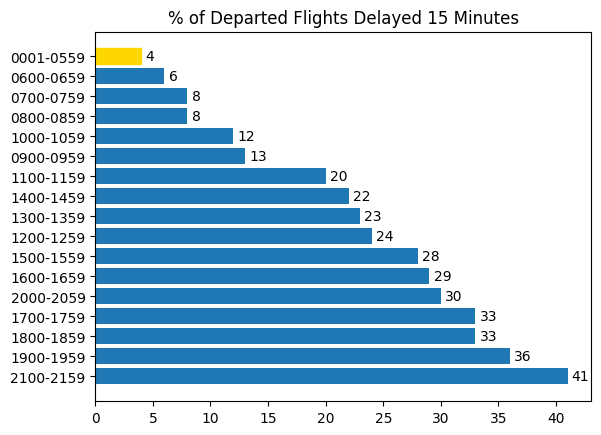


             Departed Flights By DepTimeBlk:

            Departures  Mean_Minutes_Delayed  Median_Minutes_Delayed
DepTimeBlk                                                          
0001-0559          432                     5                       0
0600-0659         1847                     5                       0
0700-0759         1956                     8                       0
0800-0859         1007                     9                       0
1000-1059         1227                    11                       0
0900-0959         1355                    12                       0
1100-1159         2168                    17                       0
1300-1359         1196                    18                       0
1200-1259         1027                    20                       0
1400-1459         1118                    22                       0
1500-1559         1352                    23                       0
1600-1659         1430                    25            

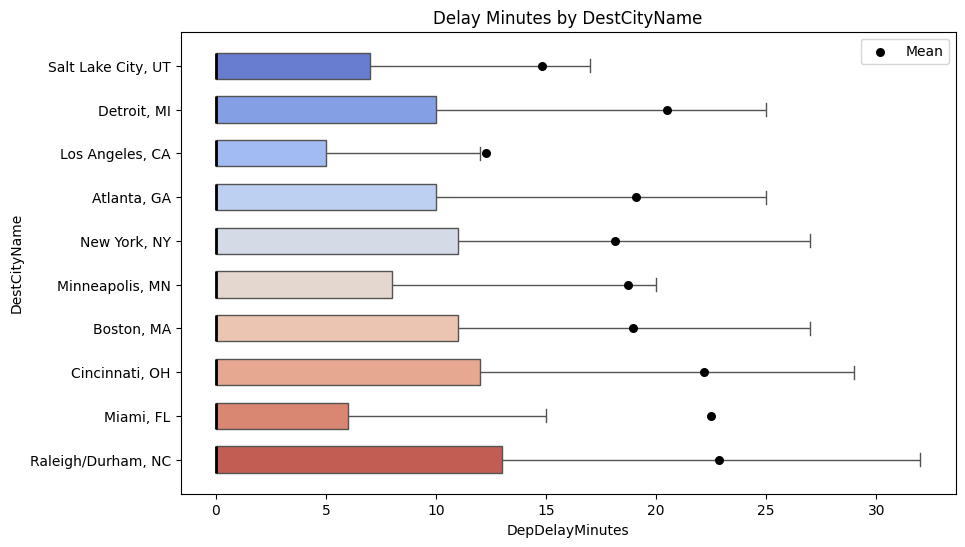

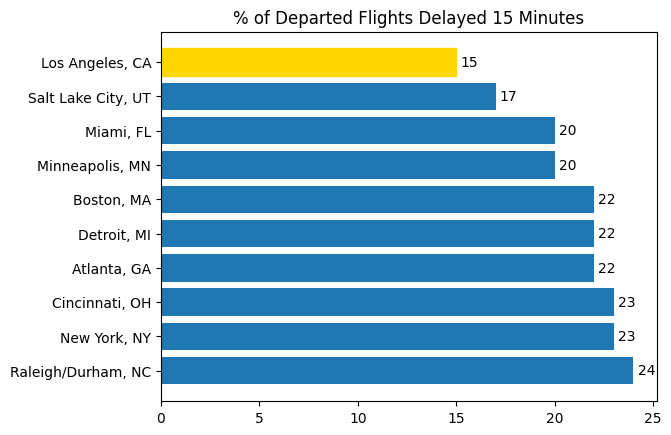


             Departed Flights By DestCityName:

                    Departures  Mean_Mins_Delayed  Median_Mins_Delayed
DestCityName                                                          
Los Angeles, CA           1283                 12                    0
Salt Lake City, UT        1408                 15                    0
New York, NY              3920                 18                    0
Atlanta, GA               5398                 19                    0
Boston, MA                1187                 19                    0
Minneapolis, MN           1838                 19                    0
Detroit, MI               2026                 21                    0
Cincinnati, OH             705                 22                    0
Raleigh/Durham, NC         942                 23                    0
Miami, FL                  934                 23                    0

                    Flights  % Delayed 15 Minutes  % Cancelled
DestCityName                       

In [20]:
Airport_delays_by_Airline(ORL_Dep, 'DepDelayMinutes', 'DepDel15', 'DepTimeBlk', 'DestCityName', 'Departures')

**Arrivals**

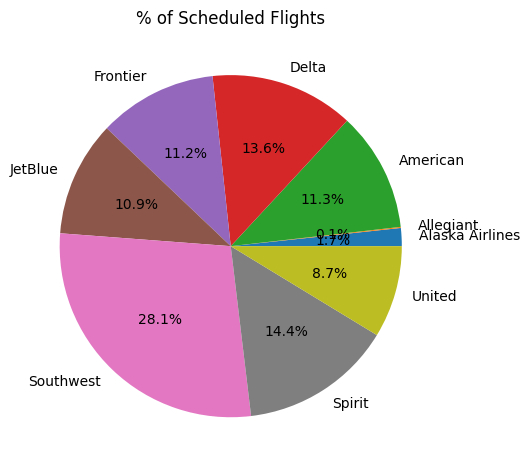

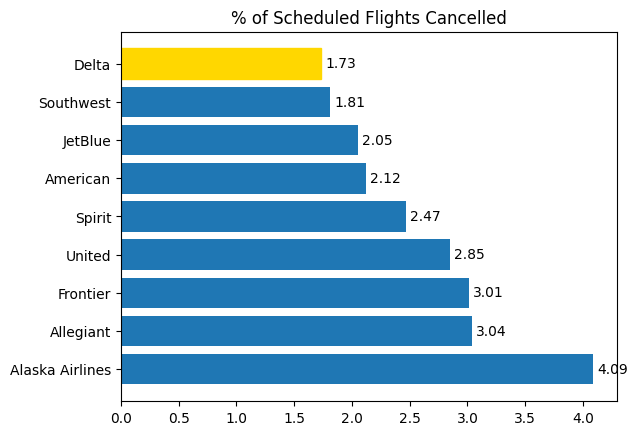

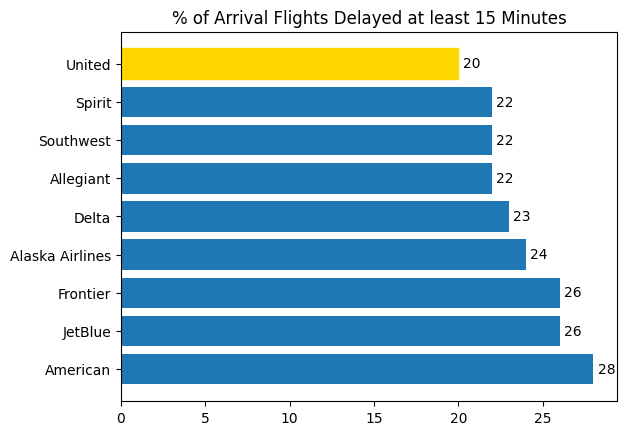


         % of Arrival Flights Delayed at least 15 Minutes: 

                    Arrivals  Delayed 15 Mins %
Operating_Airline                              
United                 13445               20.0
Allegiant                223               22.0
Southwest              44056               22.0
Spirit                 22368               22.0
Delta                  21390               23.0
Alaska Airlines         2533               24.0
Frontier               17370               26.0
JetBlue                16989               26.0
American               17662               28.0

           % of Scheduled Flights Cancelled: 

                    Flights  Cancelled %
Operating_Airline                       
Delta                 21767         1.73
Southwest             44870         1.81
JetBlue               17344         2.05
American              18044         2.12
Spirit                22934         2.47
United                13839         2.85
Frontier              17909       

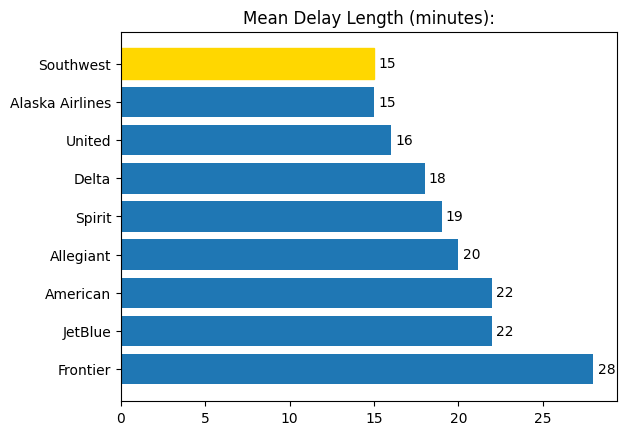


                          Delay Length: 

                    Arrivals  Mean_Mins_Delayed  Median_Mins_Delayed
Operating_Airline                                                   
Alaska Airlines         2533                 15                    0
Southwest              44056                 15                    0
United                 13445                 16                    0
Delta                  21390                 18                    0
Spirit                 22368                 19                    0
Allegiant                223                 20                    0
JetBlue                16989                 22                    0
American               17662                 22                    0
Frontier               17370                 28                    0

                          Southwest:

% of Outliers for Delay Minutes is  15
The median is 0 minutes arrived after scheduled time.
On average, flights arrive 15 minutes late.



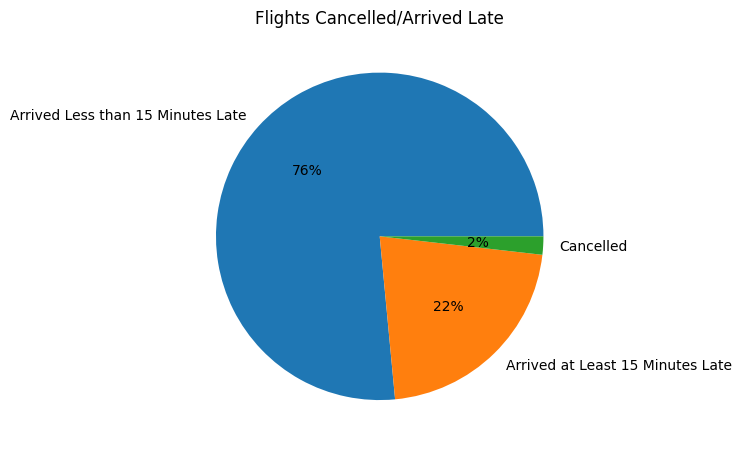


                                   Flights     %
Arrived Less than 15 Minutes Late    34304  76.5
Arrived at Least 15 Minutes Late      9752  21.7
Cancelled                              814   1.8



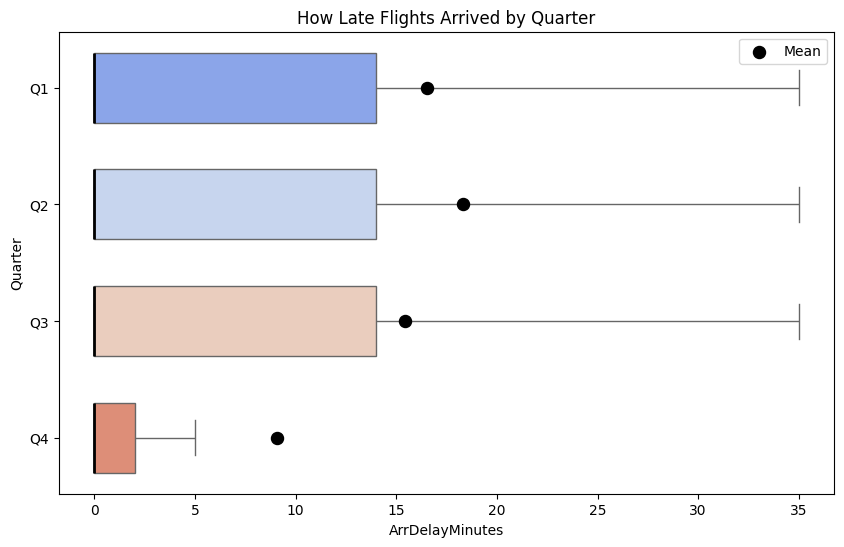

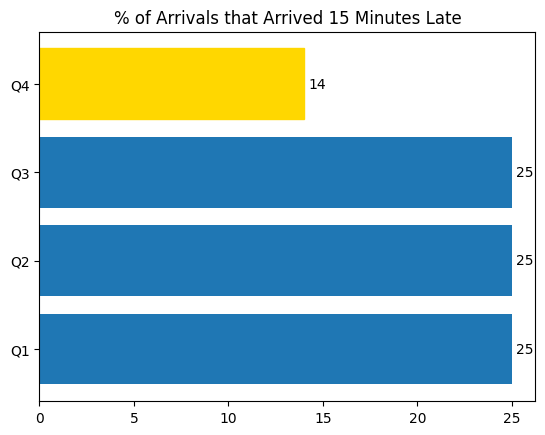


             Arrival Flights By Quarter:

         Arrivals  Mean Mins. Late  Median Mins. Late
Quarter                                              
Q4          10625                9                  0
Q3          10095               15                  0
Q1          11579               17                  0
Q2          11757               18                  0

         Flights  % 15 Minutes Late  % Cancelled
Quarter                                         
Q4         10914               13.0          3.0
Q1         11798               24.0          2.0
Q2         11903               25.0          1.0
Q3         10255               24.0          2.0



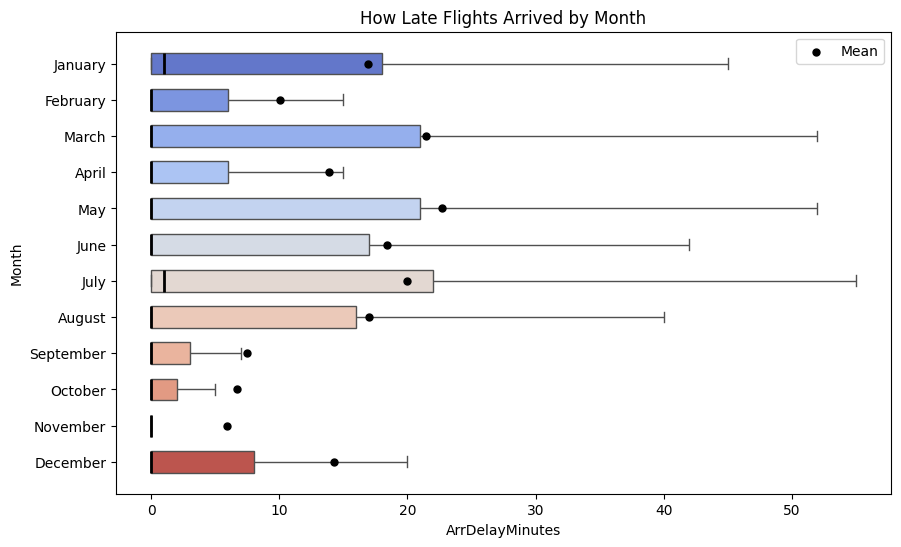

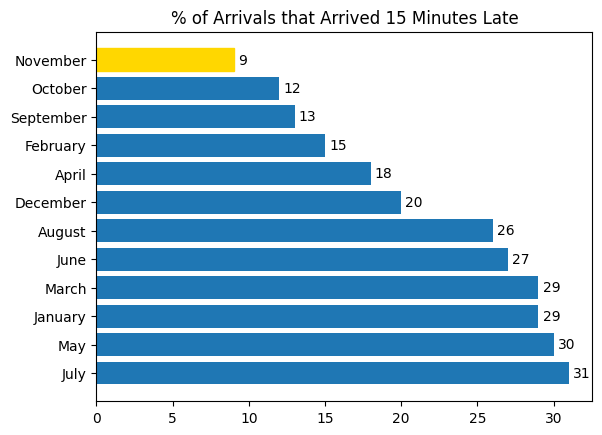


             Arrival Flights By Month:

           Arrivals  Mean Mins. Late  Median Mins. Late
Month                                                  
November       3576                6                  0
October        3358                7                  0
September      2926                7                  0
February       3560               10                  0
December       3691               14                  0
April          3931               14                  0
January        3687               17                  1
August         3149               17                  0
June           3950               18                  0
July           4020               20                  1
March          4332               21                  0
May            3876               23                  0

           Flights  % 15 Minutes Late  % Cancelled
Month                                             
November      3581                9.0          0.0
October       3626   

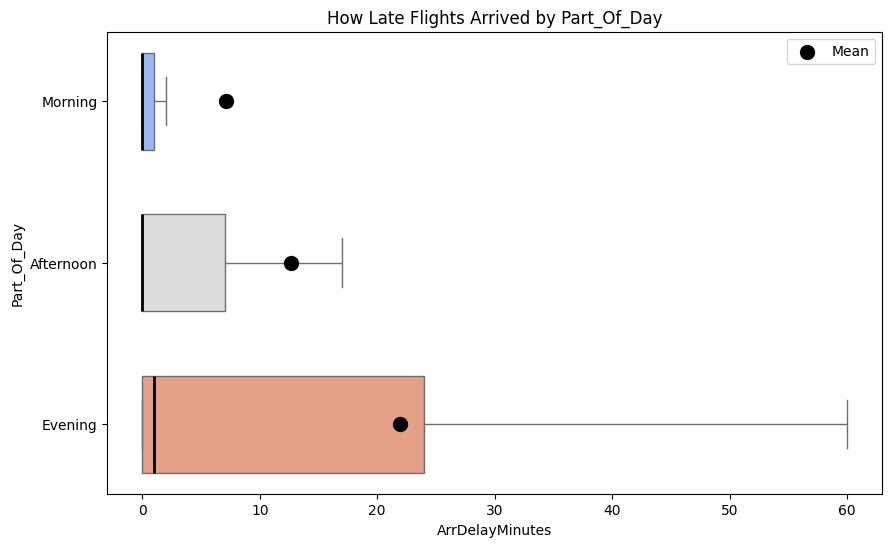

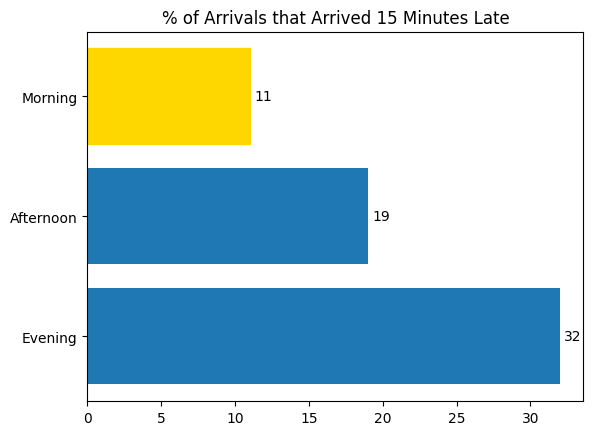


             Arrival Flights By Part_Of_Day:

             Arrivals  Mean Mins. Late  Median Mins. Late
Part_Of_Day                                              
Morning         13543                7                  0
Afternoon       11588               13                  0
Evening         18925               22                  1

             Flights  % 15 Minutes Late  % Cancelled
Part_Of_Day                                         
Morning        13724               11.0          1.0
Afternoon      11864               18.0          2.0
Evening        19282               32.0          2.0



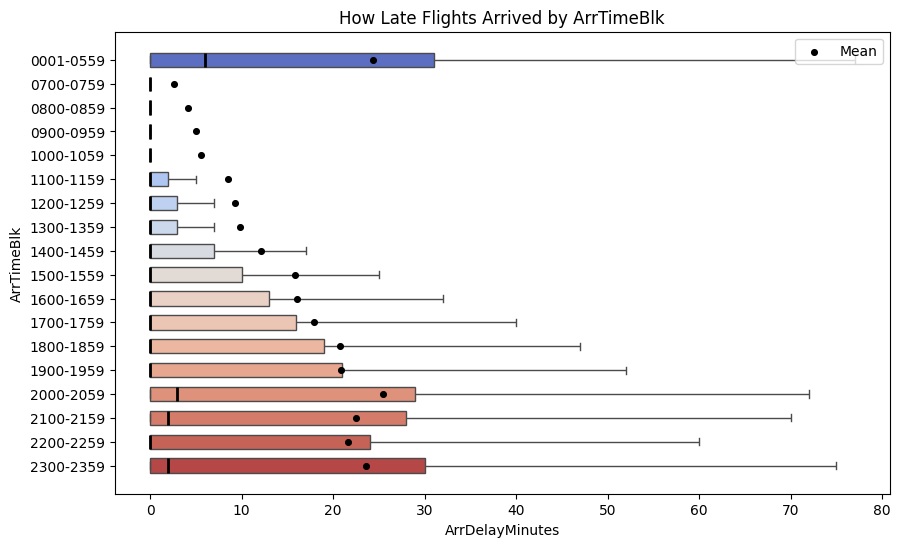

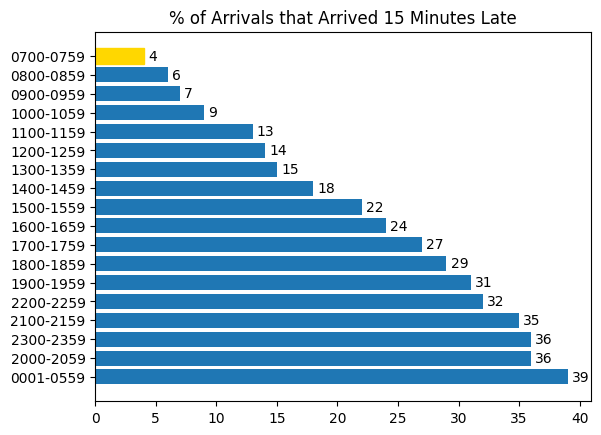


             Arrival Flights By ArrTimeBlk:

            Arrivals  Mean Mins. Late  Median Mins. Late
ArrTimeBlk                                              
0700-0759       1140                3                  0
0800-0859       2989                4                  0
0900-0959       3499                5                  0
1000-1059       2392                6                  0
1200-1259       2139                9                  0
1100-1159       2236                9                  0
1300-1359       2370               10                  0
1400-1459       2395               12                  0
1600-1659       2135               16                  0
1500-1559       2549               16                  0
1700-1759       2639               18                  0
1800-1859       2468               21                  0
1900-1959       3086               21                  0
2200-2259       2409               22                  0
2100-2159       2634               23     

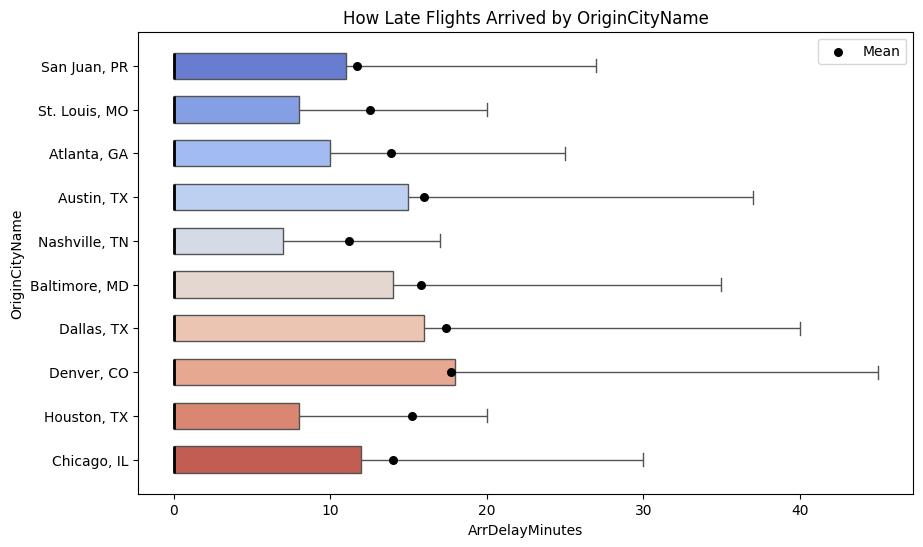

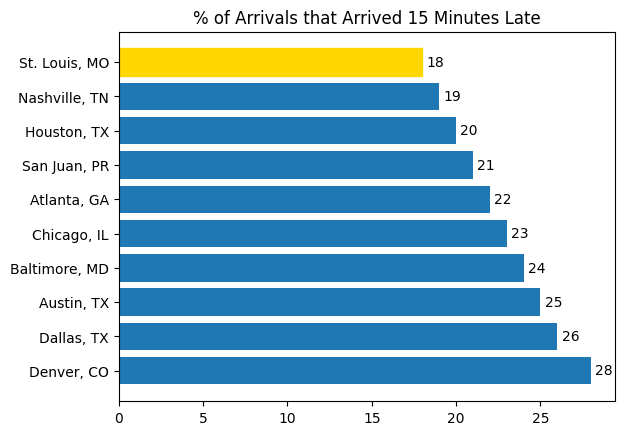


             Arrival Flights By OriginCityName:

                Arrivals  Mean Mins. Late  Median Mins. Late
OriginCityName                                              
Nashville, TN       2070               11                  0
San Juan, PR        1960               12                  0
St. Louis, MO       1815               13                  0
Chicago, IL         2988               14                  0
Atlanta, GA         1630               14                  0
Houston, TX         2160               15                  0
Austin, TX          1822               16                  0
Baltimore, MD       3650               16                  0
Dallas, TX          2629               17                  0
Denver, CO          1943               18                  0

                Flights  % 15 Minutes Late  % Cancelled
OriginCityName                                         
St. Louis, MO      1847               18.0          2.0
Nashville, TN      2108               19.0       

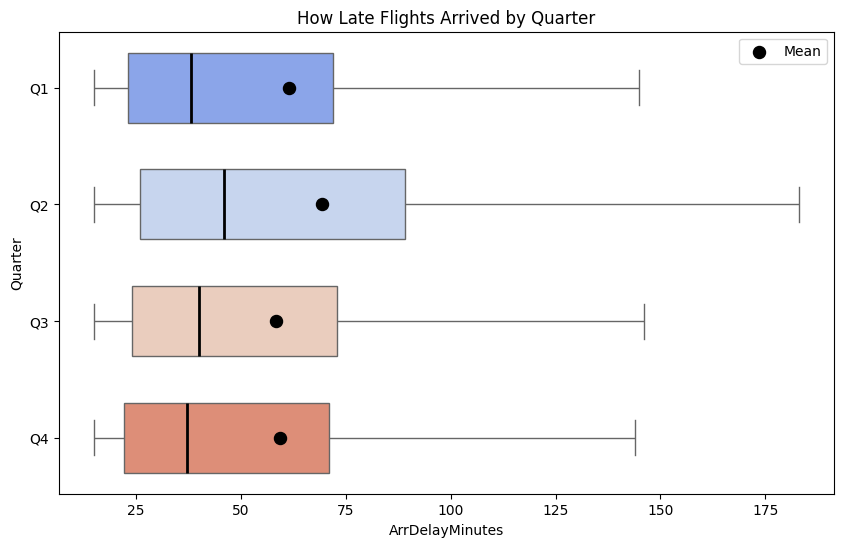


             Arrival Flights By Quarter:

         Arrivals  Mean Mins. Late  Median Mins. Late
Quarter                                              
Q3           2477               58                 40
Q4           1469               59                 37
Q1           2878               61                 38
Q2           2928               69                 46




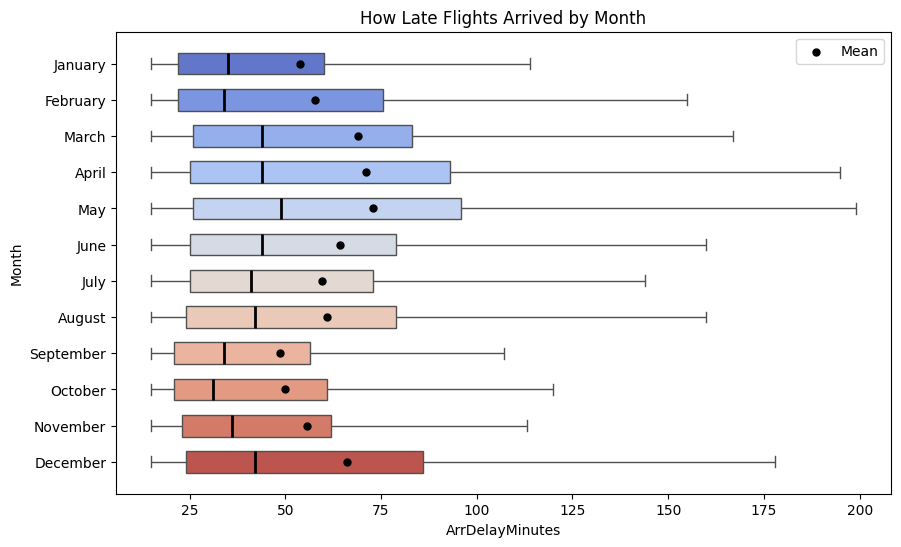


             Arrival Flights By Month:

           Arrivals  Mean Mins. Late  Median Mins. Late
Month                                                  
September       391               49                 34
October         389               50                 31
January        1057               54                 35
November        336               56                 36
February        551               58                 34
July           1263               59                 41
August          823               61                 42
June           1059               64                 44
December        744               66                 42
March          1270               69                 44
April           719               71                 44
May            1150               73                 49




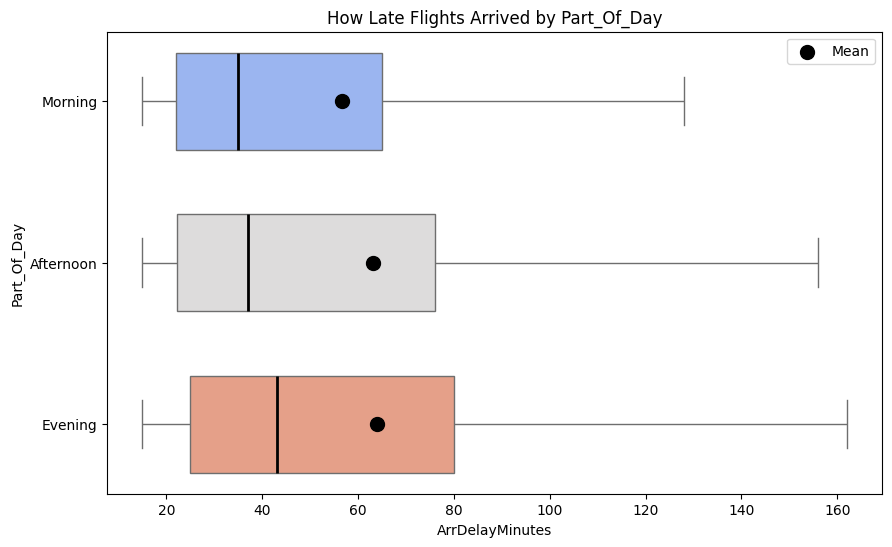


             Arrival Flights By Part_Of_Day:

             Arrivals  Mean Mins. Late  Median Mins. Late
Part_Of_Day                                              
Morning          1497               57                 35
Afternoon        2146               63                 37
Evening          6109               64                 43




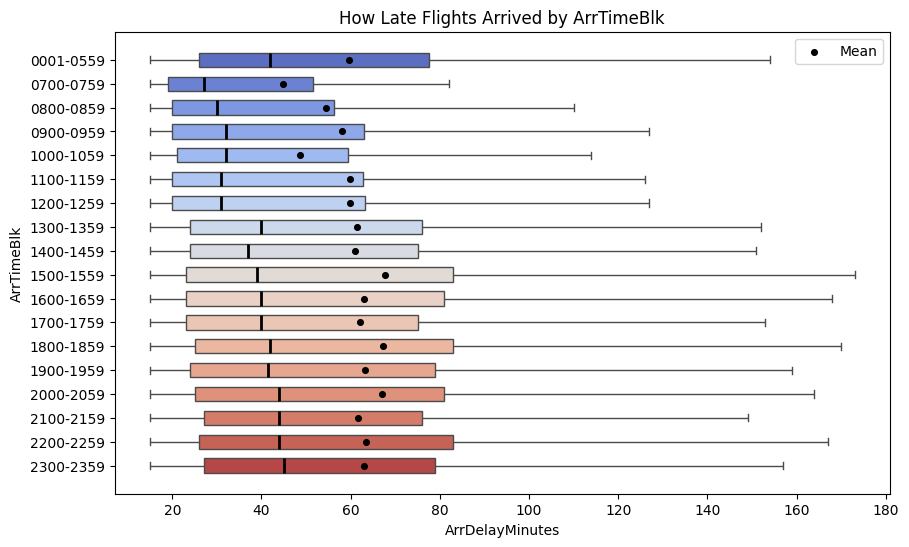


             Arrival Flights By ArrTimeBlk:

            Arrivals  Mean Mins. Late  Median Mins. Late
ArrTimeBlk                                              
0700-0759         47               45                 27
1000-1059        227               49                 32
0800-0859        182               54                 30
0900-0959        256               58                 32
0001-0559        499               60                 42
1100-1159        286               60                 31
1200-1259        302               60                 31
1300-1359        347               61                 40
1400-1459        435               61                 37
1700-1759        705               62                 40
2100-2159        909               62                 44
1600-1659        505               63                 40
1900-1959        958               63                 42
2200-2259        777               63                 44
2300-2359        886               63     

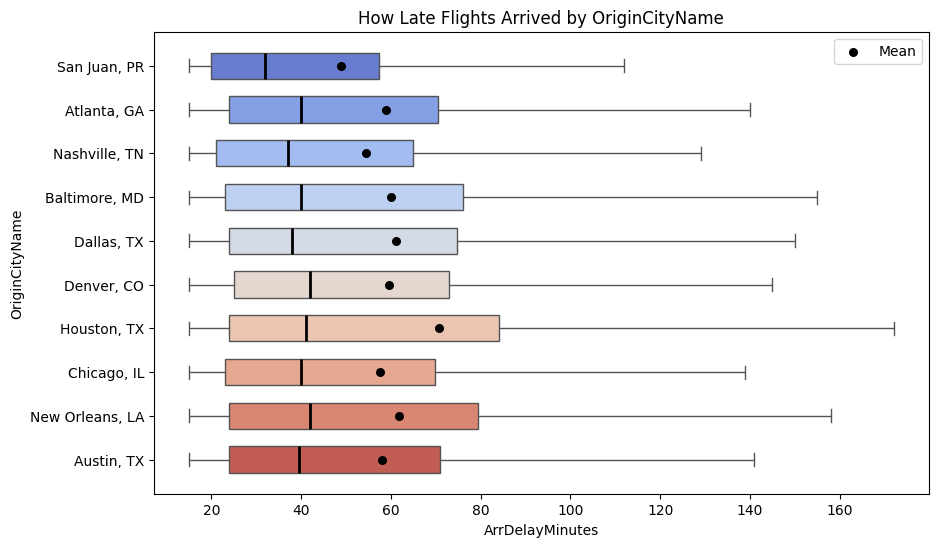


             Arrival Flights By OriginCityName:

                 Arrivals  Mean Mins. Late  Median Mins. Late
OriginCityName                                               
San Juan, PR          412               49                 32
Nashville, TN         390               54                 37
Chicago, IL           674               58                 40
Austin, TX            464               58                 40
Atlanta, GA           354               59                 40
Baltimore, MD         893               60                 40
Denver, CO            537               60                 42
Dallas, TX            694               61                 38
New Orleans, LA       339               62                 42
Houston, TX           439               71                 41



                          Spirit:

% of Outliers for Delay Minutes is  16
The median is 0 minutes arrived after scheduled time.
On average, flights arrive 19 minutes late.



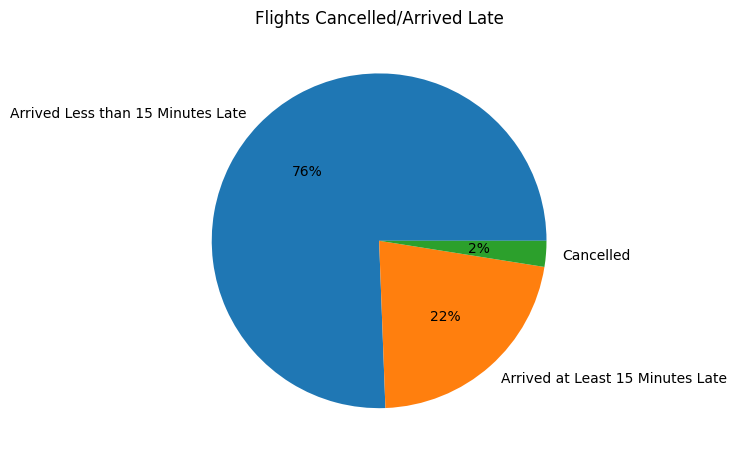


                                   Flights     %
Arrived Less than 15 Minutes Late    17349  75.6
Arrived at Least 15 Minutes Late      5019  21.9
Cancelled                              566   2.5



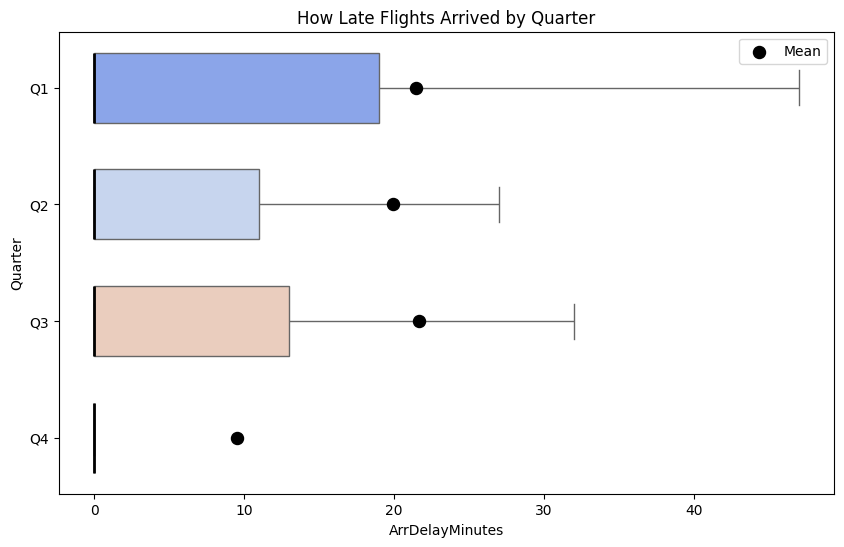

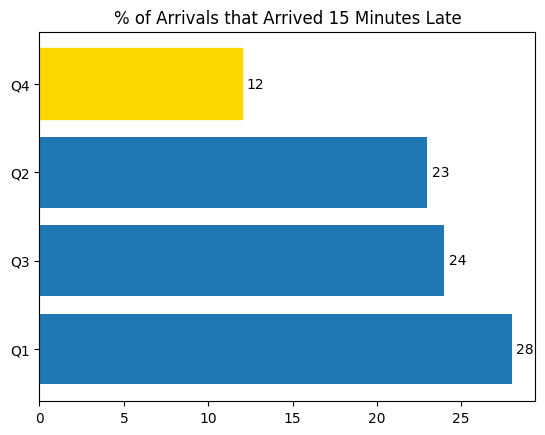


             Arrival Flights By Quarter:

         Arrivals  Mean Mins. Late  Median Mins. Late
Quarter                                              
Q4           4491                9                  0
Q2           6266               20                  0
Q1           6706               21                  0
Q3           4905               22                  0

         Flights  % 15 Minutes Late  % Cancelled
Quarter                                         
Q4          4631               12.0          3.0
Q2          6399               22.0          2.0
Q3          5092               23.0          4.0
Q1          6812               27.0          2.0



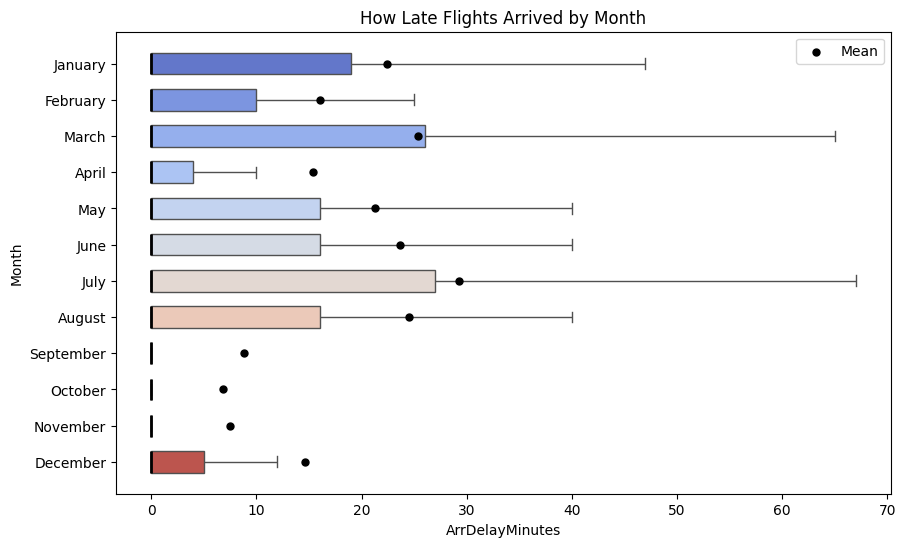

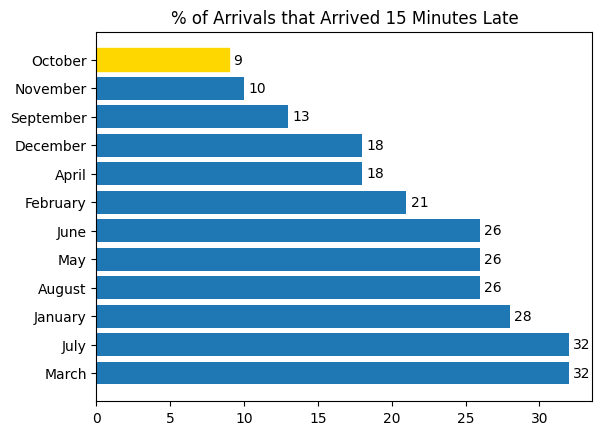


             Arrival Flights By Month:

           Arrivals  Mean Mins. Late  Median Mins. Late
Month                                                  
October        1487                7                  0
November       1598                7                  0
September      1426                9                  0
April          2198               15                  0
December       1406               15                  0
February       2126               16                  0
May            2151               21                  0
January        2136               22                  0
June           1917               24                  0
August         1741               24                  0
March          2444               25                  0
July           1738               29                  0

           Flights  % 15 Minutes Late  % Cancelled
Month                                             
October       1612                8.0          8.0
November      1607   

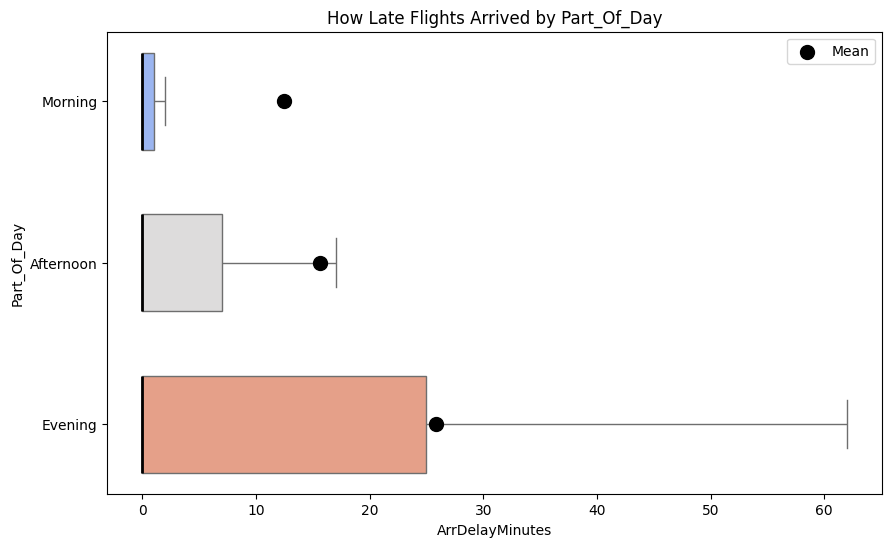

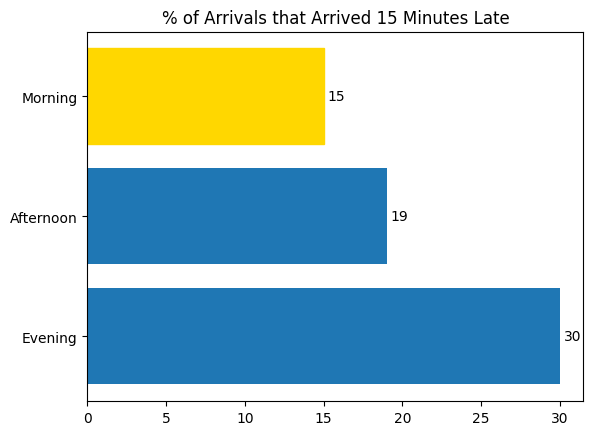


             Arrival Flights By Part_Of_Day:

             Arrivals  Mean Mins. Late  Median Mins. Late
Part_Of_Day                                              
Morning          7783               13                  0
Afternoon        5492               16                  0
Evening          9093               26                  0

             Flights  % 15 Minutes Late  % Cancelled
Part_Of_Day                                         
Morning         7945               15.0          2.0
Afternoon       5608               19.0          2.0
Evening         9381               29.0          3.0



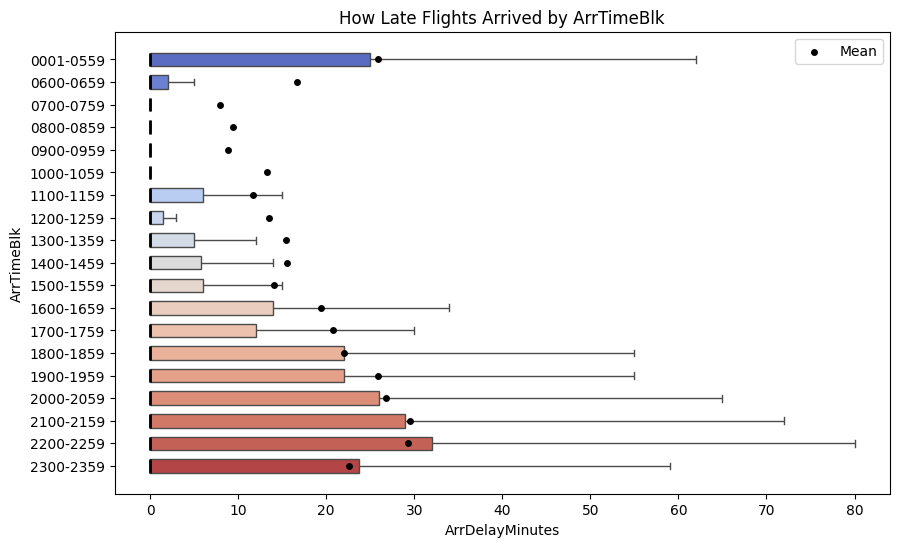

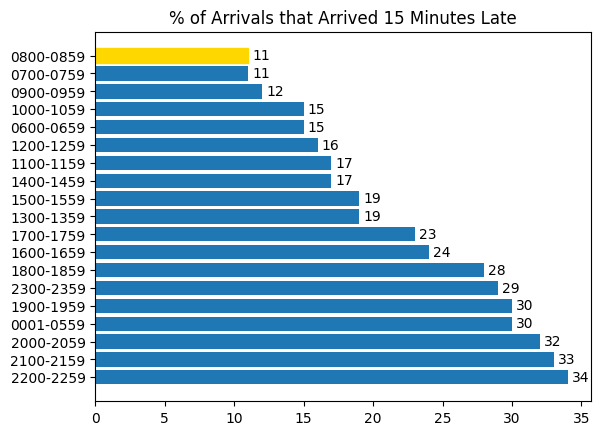


             Arrival Flights By ArrTimeBlk:

            Arrivals  Mean Mins. Late  Median Mins. Late
ArrTimeBlk                                              
0700-0759       1108                8                  0
0800-0859       1998                9                  0
0900-0959       2017                9                  0
1100-1159        461               12                  0
1000-1059        710               13                  0
1200-1259        703               14                  0
1500-1559       1197               14                  0
1300-1359       1319               15                  0
1400-1459       1290               16                  0
0600-0659        177               17                  0
1600-1659        983               19                  0
1700-1759        959               21                  0
1800-1859        950               22                  0
2300-2359       1418               23                  0
1900-1959       1364               26     

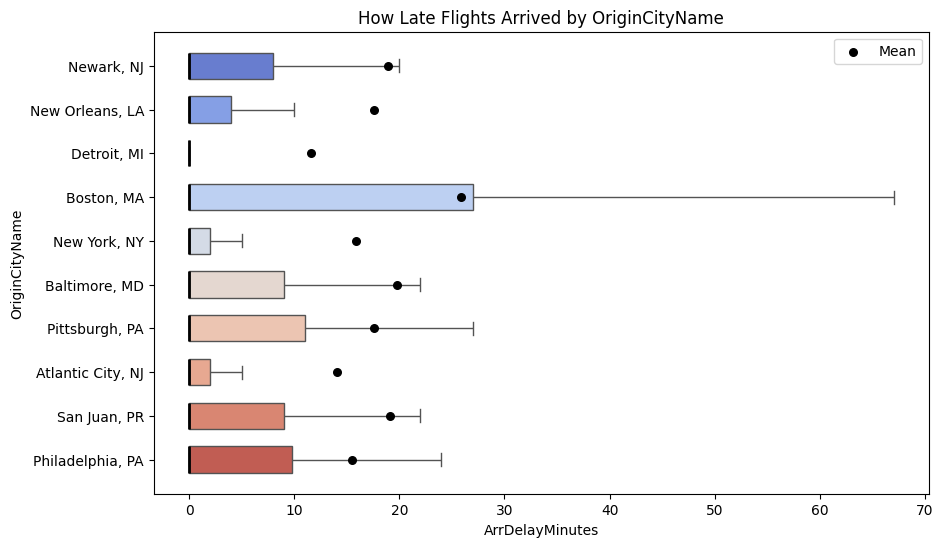

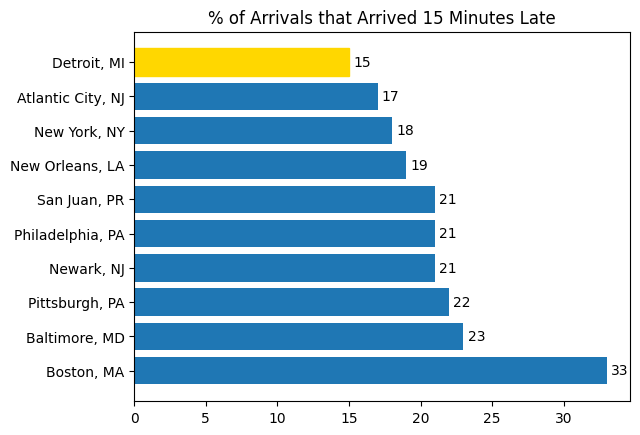


             Arrival Flights By OriginCityName:

                   Arrivals  Mean Mins. Late  Median Mins. Late
OriginCityName                                                 
Detroit, MI            1261               12                  0
Atlantic City, NJ       918               14                  0
Philadelphia, PA        866               15                  0
New York, NY            872               16                  0
New Orleans, LA         837               18                  0
Pittsburgh, PA          875               18                  0
Newark, NJ             1363               19                  0
San Juan, PR           1067               19                  0
Baltimore, MD          1034               20                  0
Boston, MA             1027               26                  0

                   Flights  % 15 Minutes Late  % Cancelled
OriginCityName                                            
Detroit, MI           1280               15.0          1.0
Atla

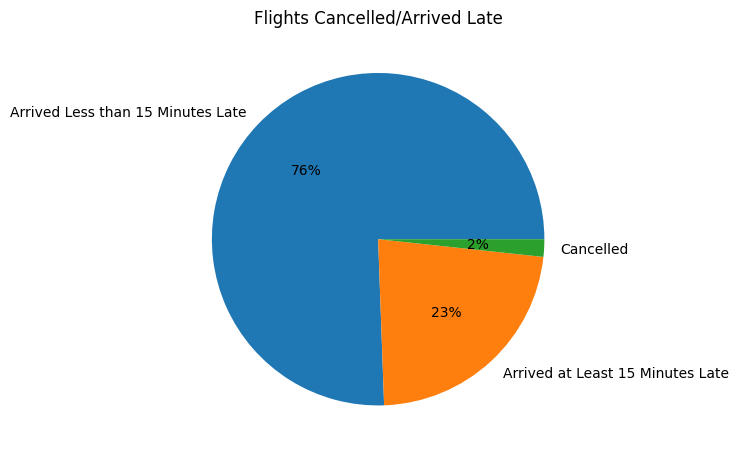


                                   Flights     %
Arrived Less than 15 Minutes Late    16443  75.5
Arrived at Least 15 Minutes Late      4947  22.7
Cancelled                              377   1.7



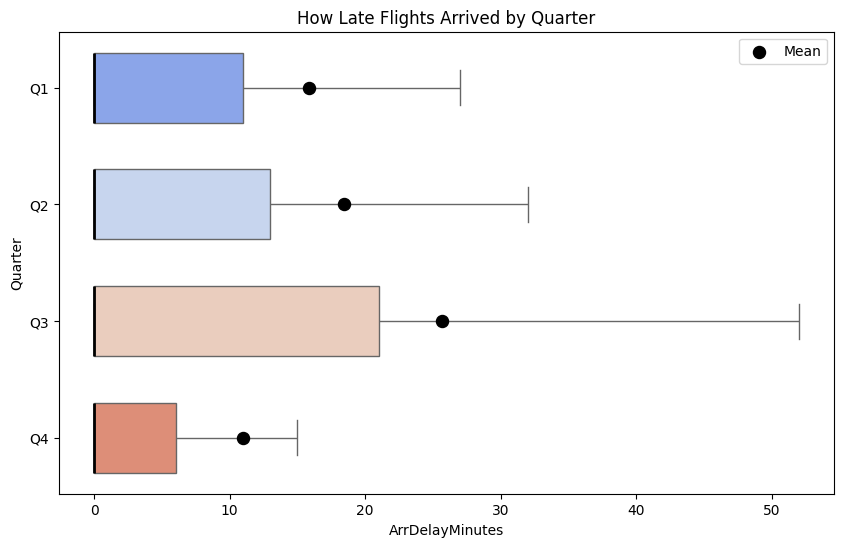

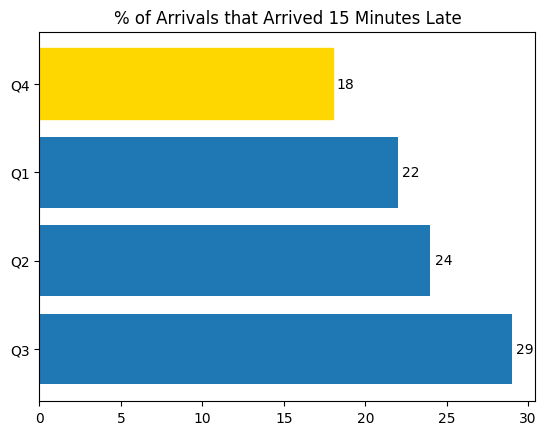


             Arrival Flights By Quarter:

         Arrivals  Mean Mins. Late  Median Mins. Late
Quarter                                              
Q4           5323               11                  0
Q1           5566               16                  0
Q2           5550               18                  0
Q3           4951               26                  0

         Flights  % 15 Minutes Late  % Cancelled
Quarter                                         
Q4          5442               17.0          2.0
Q1          5589               22.0          0.0
Q2          5593               24.0          1.0
Q3          5143               28.0          4.0



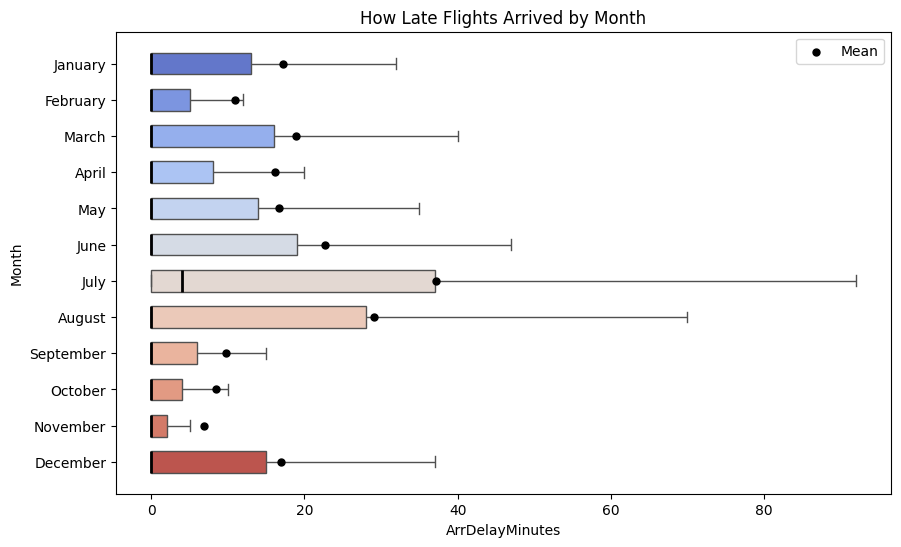

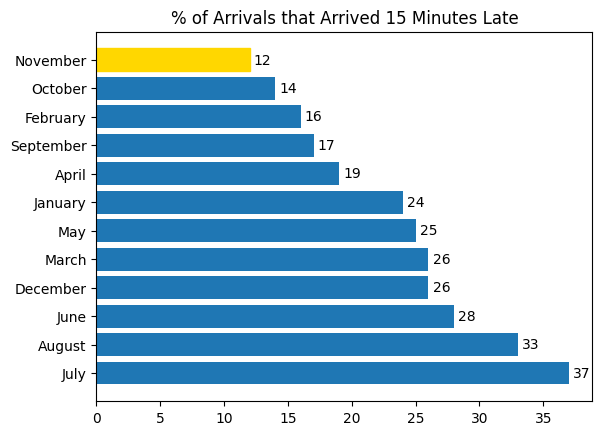


             Arrival Flights By Month:

           Arrivals  Mean Mins. Late  Median Mins. Late
Month                                                  
November       1741                7                  0
October        1650                8                  0
September      1594               10                  0
February       1731               11                  0
April          1915               16                  0
May            1858               17                  0
December       1932               17                  0
January        1864               17                  0
March          1971               19                  0
June           1777               23                  0
August         1660               29                  0
July           1697               37                  4

           Flights  % 15 Minutes Late  % Cancelled
Month                                             
November      1742               12.0          0.0
October       1766   

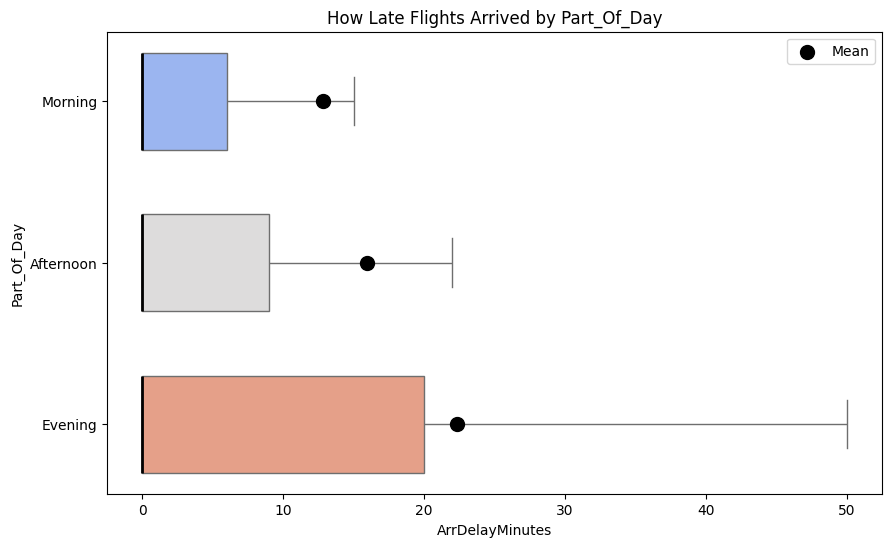

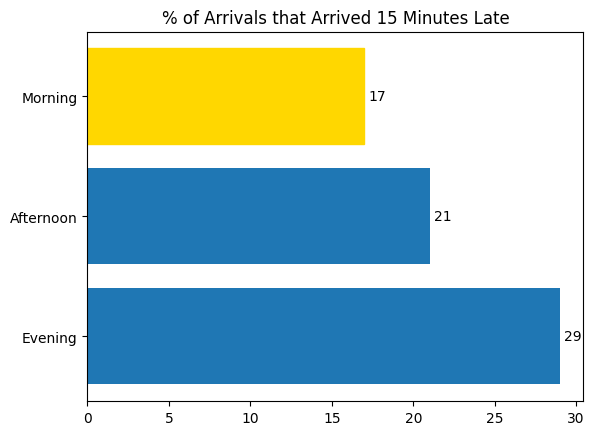


             Arrival Flights By Part_Of_Day:

             Arrivals  Mean Mins. Late  Median Mins. Late
Part_Of_Day                                              
Morning          6666               13                  0
Afternoon        6026               16                  0
Evening          8698               22                  0

             Flights  % 15 Minutes Late  % Cancelled
Part_Of_Day                                         
Morning         6774               17.0          2.0
Afternoon       6116               21.0          1.0
Evening         8877               28.0          2.0



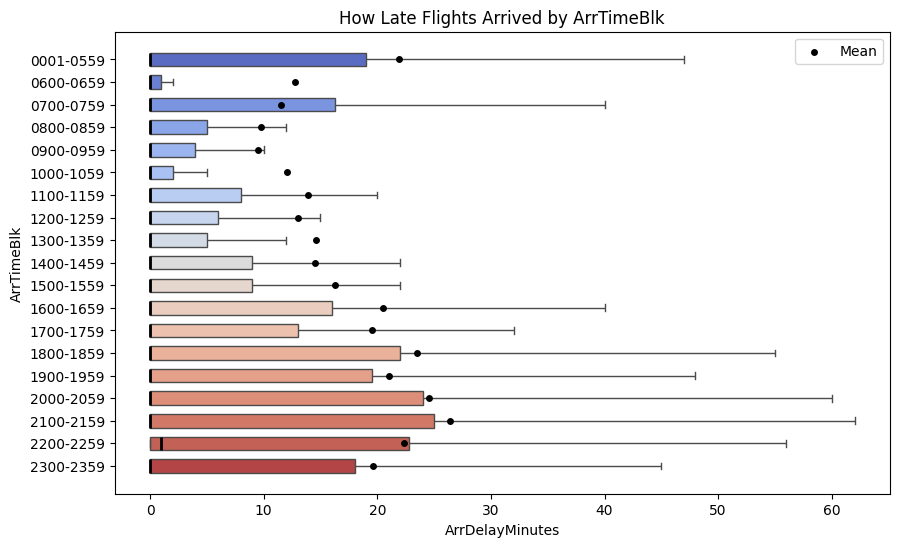

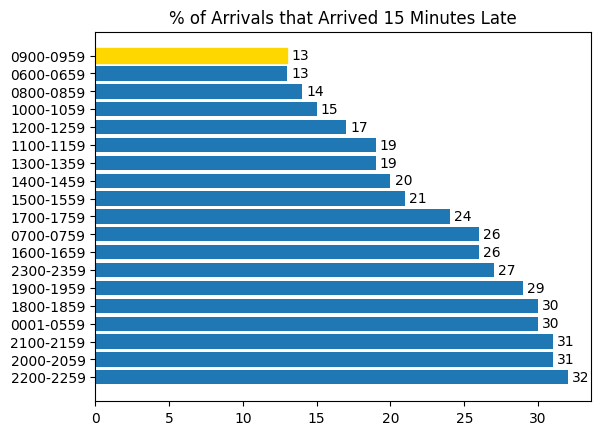


             Arrival Flights By ArrTimeBlk:

            Arrivals  Mean Mins. Late  Median Mins. Late
ArrTimeBlk                                              
0800-0859        919               10                  0
0900-0959       1256               10                  0
1000-1059       2031               12                  0
0700-0759        244               12                  0
1200-1259       1007               13                  0
0600-0659        109               13                  0
1100-1159       1298               14                  0
1300-1359        732               15                  0
1400-1459       1671               15                  0
1500-1559       1317               16                  0
1700-1759       1333               20                  0
2300-2359       1433               20                  0
1900-1959        691               21                  0
1600-1659       1299               21                  0
2200-2259       1086               22     

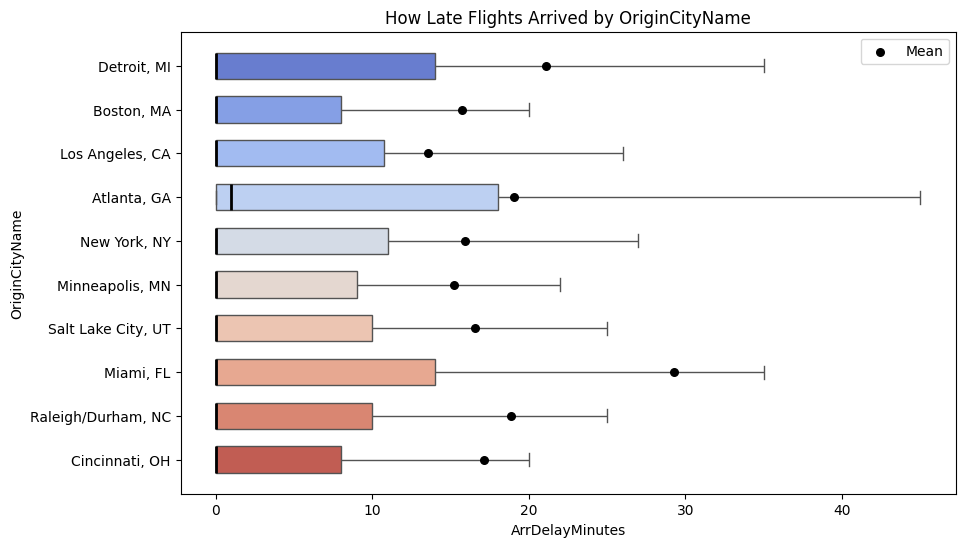

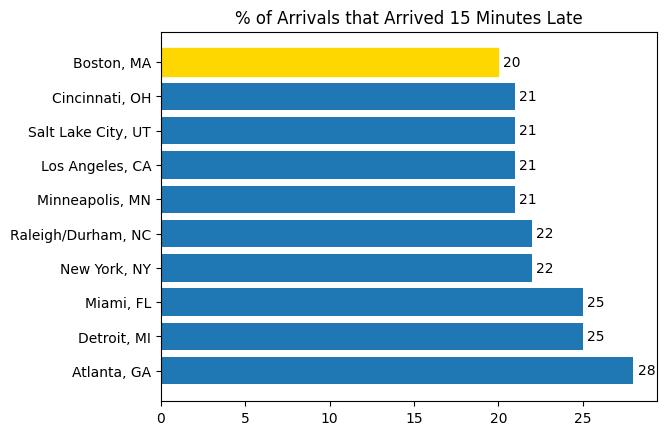


             Arrival Flights By OriginCityName:

                    Arrivals  Mean Mins. Late  Median Mins. Late
OriginCityName                                                  
Los Angeles, CA         1278               14                  0
Minneapolis, MN         1832               15                  0
Boston, MA              1181               16                  0
New York, NY            3910               16                  0
Salt Lake City, UT      1401               17                  0
Cincinnati, OH           704               17                  0
Raleigh/Durham, NC       939               19                  0
Atlanta, GA             5394               19                  1
Detroit, MI             2026               21                  0
Miami, FL                931               29                  0

                    Flights  % 15 Minutes Late  % Cancelled
OriginCityName                                             
Boston, MA             1204               19.0   

In [21]:
Airport_delays_by_Airline(ORL_Arr, 'ArrDelayMinutes', 'ArrDel15', 'ArrTimeBlk', 'OriginCityName', 'Arrivals')